# Coverage Guided Fuzzer

## SOEN 7481- Assignment 2

## Contributors

+ Prashanthi Ramesh - 40080517
+ Gagandeep Singh   - 40080644
+ Raghav Kaushal    - 40075268

### Smarter way to create fuzzed input for python program

#### Steps to create the fuzzer

1. We maintain a population (i.e., a list of seeds) that we use for mutation. Each seed in the population will be an input that provide additional coverage information.
2. We will take a seed from the population and fuzz the seed to test the program. If the population is empty, we mutate an initial seed that we provide manually.
3. We take the seed from the population semi-randomly, but the seeds that provided more additional coverage have a higher chance of being selected.
4. If the new input increased the coverage, we add this new input to the population as a new seed. We assign a score to the seed (i.e., how much coverage it improved).
5. We repeat and go back to Step 2 until we execute the fuzzer 100 times (i.e., your pre-defined number of trials).

#### Testing the fuzzer

+  We run our fuzzer on 3 Python programs
    - Differentiate network using Subnet
    - Credit Card Validation
    - RSA Encryption
    
+ Evaluate the programs on different fuzzing approaches:
    - Pure Randomly Fuzzing Approach
    - Semi Randomly Fuzzing Approach
    - Mutation Fuzzing Approach
    - Coverage Guided Fuzzing Approach- smarter way to create fuzzed input

+ We discuss and compare each fuzzing approach in terms of coverage.
+ We discuss how the coverage changes for the inputs that we tried.
+ We also record any bug found in our program.

## References

1. https://github.com/geekcomputers/Python


# Differentiate Network using Subnet

#### Description: 

+ This program calculates the network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet from the given IP address and subnet mask.

#### Input: The program takes 2 inputs- 

+ String- IP Address
+ String- Subnet mask

#### Output: 

+ Prints the calculated network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet.
+ If the given IP Address or Subnet mask is invalid, the program will end. 

#### Metrics:

+ SLOC- 69
+ Comments- 34
+ McCabe- 19

In [2]:
import random
import sys
def subnet_calc(ip_address, subnet_mask):

        #Checking IP address validity
    while True:

            #Checking octets            
        a = ip_address.split('.')

        if (len(a) == 4) and (1 <= int(a[0]) <= 223) and (int(a[0]) != 127) and (int(a[0]) != 169 or int(a[1]) != 254) and (0 <= int(a[1]) <= 255 and 0 <= int(a[2]) <= 255 and 0 <= int(a[3]) <= 255):
            break

        else:
            raise ValueError("Invalid IP Address")
            

    masks = [255, 254, 252, 248, 240, 224, 192, 128, 0]

        #Checking Subnet Mask validity
    while True:

            #Checking octets            
        b = subnet_mask.split('.')

        if (len(b) == 4) and (int(b[0]) == 255) and (int(b[1]) in masks) and (int(b[2]) in masks) and (int(b[3]) in masks) and (int(b[0]) >= int(b[1]) >= int(b[2]) >= int(b[3])):
            break

        else:
            raise ValueError("Invalid subnet Mask")

	############# Application #1 - Part #2 #############

        #Algorithm for subnet identification, based on IP and Subnet Mask

        #Convert mask to binary string
    mask_octets_padded = []
    mask_octets_decimal = subnet_mask.split(".")
        #print mask_octets_decimal

    for octet_index in range(0, len(mask_octets_decimal)):

            #print bin(int(mask_octets_decimal[octet_index]))

        binary_octet = bin(int(mask_octets_decimal[octet_index])).split("b")[1]
            #print binary_octet

        if len(binary_octet) == 8:
            mask_octets_padded.append(binary_octet)

        elif len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            mask_octets_padded.append(binary_octet_padded)

        #print mask_octets_padded

    decimal_mask = "".join(mask_octets_padded)
        #print decimal_mask   #Example: for 255.255.255.0 => 11111111111111111111111100000000

        #Counting host bits in the mask and calculating number of hosts/subnet
    no_of_zeros = decimal_mask.count("0")
    no_of_ones = 32 - no_of_zeros
    no_of_hosts = abs(2 ** no_of_zeros - 2) #return positive value for mask /32

        #print no_of_zeros
        #print no_of_ones
        #print no_of_hosts

        #Obtaining wildcard mask
    wildcard_octets = []
    for w_octet in mask_octets_decimal:
        wild_octet = 255 - int(w_octet)
        wildcard_octets.append(str(wild_octet))

        #print wildcard_octets

    wildcard_mask = ".".join(wildcard_octets)
        #print wildcard_mask

        ############# Application #1 - Part #3 #############

        #Convert IP to binary string
    ip_octets_padded = []
    ip_octets_decimal = ip_address.split(".")

    for octet_index in range(0, len(ip_octets_decimal)):

        binary_octet = bin(int(ip_octets_decimal[octet_index])).split("b")[1]

        if len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            ip_octets_padded.append(binary_octet_padded)

        else:
            ip_octets_padded.append(binary_octet)

        #print ip_octets_padded

    binary_ip = "".join(ip_octets_padded)

        #print binary_ip   #Example: for 192.168.2.100 => 11000000101010000000001001100100

        #Obtain the network address and broadcast address from the binary strings obtained above

    network_address_binary = binary_ip[:(no_of_ones)] + "0" * no_of_zeros
        #print network_address_binary

    broadcast_address_binary = binary_ip[:(no_of_ones)] + "1" * no_of_zeros
        #print broadcast_address_binary

    net_ip_octets = []
    for octet in range(0, len(network_address_binary), 8):
        net_ip_octet = network_address_binary[octet:octet+8]
        net_ip_octets.append(net_ip_octet)

        #print net_ip_octets

    net_ip_address = []
    for each_octet in net_ip_octets:
        net_ip_address.append(str(int(each_octet, 2)))

        #print net_ip_address

    network_address = ".".join(net_ip_address)
        #print network_address

    bst_ip_octets = []
    for octet in range(0, len(broadcast_address_binary), 8):
        bst_ip_octet = broadcast_address_binary[octet:octet+8]
        bst_ip_octets.append(bst_ip_octet)

        #print bst_ip_octets

    bst_ip_address = []
    for each_octet in bst_ip_octets:
        bst_ip_address.append(str(int(each_octet, 2)))

        #print bst_ip_address

    broadcast_address = ".".join(bst_ip_address)
        #print broadcast_address

        #Results for selected IP/mask
    print ("\n")
    print("Network address is: %s" % network_address)
    print("Broadcast address is: %s" % broadcast_address)
    print("Number of valid hosts per subnet: %s" % no_of_hosts)
    print("Wildcard mask: %s" % wildcard_mask)
    print("Mask bits: %s" % no_of_ones)
    
    return True



In [3]:
#Calling the function
subnet_calc("1.1.1.1", "255.255.255.0")



Network address is: 1.1.1.0
Broadcast address is: 1.1.1.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


True

In [4]:
def is_valid_ip_subnet(ip_address, subnet_mask):
    try:
        result = subnet_calc(ip_address, subnet_mask)
        return True
    except ValueError:
        return False

## Random Fuzzer for Subnet Calculator

## Concept

+ IP version 4 has 32 bits. It is divided into 4 octets, where each octet consists of 8 bits. To make life easier for humans, these bits are converted into decimals. The bits can either be 0 or 1. So in an octet, it can start with 00000000 or 11111111 which when converted into decimals can be 0 or 255 respectively. The subnet mask helps us to identify the network of an IP. The subnet mask or the IP address cannot exceed 255 in one octet. IP version 4 has 5 classes and based on the classes, it's subnet mask is decided. This particular way of giving subnet mask is called FLSM (Fixed length subnet mask). 

    - Class A- 255.0.0.0
    - Class B- 255.255.0.0
    - Class C- 255.255.255.0

+ We also have VLSM (Variable length subnet mask). It was introduced to reduce the wasteage of IP. The decimal numbers 128, 192, 224, 240, 248, 252 and 254 are also valid if and only if it's previous octet is 255 and it's next octets/octet is 0. Thus the total number of inputs is 256^4 since it is 32 bits, which is approximately 4.9 Billion and the valid input is just 28. 

+ When we use random fuzzing method, we should have higher computation power to try 4.9 Billion trials and system will give output only for 28 trials. 
    
## Random Fuzzer Approach 1

+ When it comes to randomization, in our 1st approach we are going to randomize numbers in all 4 octets. We are planning to 1000 trials. In this case, the chance of getting a valid subnet mask is extremely low. 

## Random Fuzzer Approach 2

+ We are going to do 1000 trials. So, instead of randomizing all the 4 octets we are going to first fix the 3rd and 4th octet as 0 and we are going to randomize only the 1st and 2nd octet. Thus, we will get atleast one desired output in 256 runs which is the maximum. 
+ Similarly we do it for the 2nd, 3rd and 4th octet. By this method, we can atleast have 1 desired output.

In [48]:
#1 Pure Randomly fuzzing Approach for IP address and Subnet mask

# generate random value in the range of 0 to 255

import random

def pure_random_ip_fuzz(int_start=0, int_range=1000):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

In [49]:
pure_random_ip_fuzz()

'719.596.779.816'

In [7]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = pure_random_ip_fuzz()
    input_subnet= pure_random_ip_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 646.692.197.366
input Subet Mask is 422.129.648.949

input IP Address is 646.381.438.430
input Subet Mask is 588.339.669.541

input IP Address is 247.261.202.655
input Subet Mask is 97.589.355.811

input IP Address is 17.878.901.896
input Subet Mask is 928.153.835.734

input IP Address is 232.198.36.395
input Subet Mask is 212.644.557.590

input IP Address is 975.32.418.293
input Subet Mask is 716.812.549.293

input IP Address is 867.652.226.87
input Subet Mask is 921.541.156.92

input IP Address is 939.523.62.834
input Subet Mask is 652.290.900.737

input IP Address is 881.738.862.36
input Subet Mask is 730.588.287.982

input IP Address is 482.349.992.502
input Subet Mask is 147.958.790.709

input IP Address is 113.13.540.484
input Subet Mask is 672.856.811.481

input IP Address is 749.312.744.626
input Subet Mask is 796.235.7.345

input IP Address is 672.796.47.514
input Subet Mask is 452.32.63.442

input IP Address is 313.407.255.739
input Subet Mask is 451.635.5

input IP Address is 618.680.800.830
input Subet Mask is 30.342.330.98

input IP Address is 186.260.356.760
input Subet Mask is 424.932.803.885

input IP Address is 364.49.507.63
input Subet Mask is 200.884.824.891

input IP Address is 597.760.474.745
input Subet Mask is 802.656.897.498

input IP Address is 506.755.58.989
input Subet Mask is 528.542.959.284

input IP Address is 699.400.818.597
input Subet Mask is 485.464.43.553

input IP Address is 944.996.610.159
input Subet Mask is 330.112.619.150

input IP Address is 457.630.938.814
input Subet Mask is 601.559.331.988

input IP Address is 966.501.348.655
input Subet Mask is 523.331.964.231

input IP Address is 467.563.473.820
input Subet Mask is 332.787.263.447

input IP Address is 753.262.107.464
input Subet Mask is 289.791.435.234

input IP Address is 452.414.235.499
input Subet Mask is 494.735.570.816

input IP Address is 162.100.53.888
input Subet Mask is 570.813.742.963

input IP Address is 838.437.233.122
input Subet Mask is 34

input Subet Mask is 460.217.780.36

input IP Address is 468.468.534.393
input Subet Mask is 5.893.831.170

input IP Address is 473.253.690.369
input Subet Mask is 237.318.342.281

input IP Address is 706.702.577.51
input Subet Mask is 10.212.205.921

input IP Address is 895.310.544.102
input Subet Mask is 25.686.223.300

input IP Address is 791.29.867.738
input Subet Mask is 130.767.668.21

input IP Address is 627.635.819.502
input Subet Mask is 914.112.890.755

input IP Address is 388.158.741.270
input Subet Mask is 281.350.150.783

input IP Address is 254.757.559.326
input Subet Mask is 401.532.765.311

input IP Address is 574.942.636.168
input Subet Mask is 130.61.94.481

input IP Address is 751.156.748.388
input Subet Mask is 223.160.933.366

input IP Address is 254.352.106.560
input Subet Mask is 5.89.254.267

input IP Address is 578.784.89.341
input Subet Mask is 674.40.910.138

input IP Address is 464.644.133.115
input Subet Mask is 49.846.414.769

input IP Address is 386.533.41

input IP Address is 482.704.381.675
input Subet Mask is 600.939.296.707

input IP Address is 169.663.992.945
input Subet Mask is 551.212.169.885

input IP Address is 36.108.13.556
input Subet Mask is 283.714.32.633

input IP Address is 912.987.698.857
input Subet Mask is 145.946.238.17

input IP Address is 252.326.992.582
input Subet Mask is 377.466.790.78

input IP Address is 531.672.395.144
input Subet Mask is 249.177.643.594

input IP Address is 307.745.266.841
input Subet Mask is 660.876.431.279

input IP Address is 421.164.80.457
input Subet Mask is 352.738.28.692

input IP Address is 212.486.617.920
input Subet Mask is 613.688.899.761

input IP Address is 701.916.716.800
input Subet Mask is 190.691.176.174

input IP Address is 796.609.382.935
input Subet Mask is 718.398.478.261

input IP Address is 384.267.946.181
input Subet Mask is 408.14.415.613

input IP Address is 841.511.25.271
input Subet Mask is 897.838.831.124

input IP Address is 190.618.310.881
input Subet Mask is 384.

0.0

### Result- IP will be valid while subnet mask is invalid

+ So in the next random approach, we will restructure the subnet mask fuzz algorithm

In [8]:
#2 Semi Randomly fuzzing approach for Subnet mask

# generate random value in the range of 0 to 255

def semi_random_ip_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

def semi_random_subnet_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,2):
        ip+=str(random.randrange(int_start, int_start+int_range))
        ip+="."
    ip+="0.0"
    return ip

In [9]:
semi_random_subnet_fuzz()


'218.168.0.0'

In [10]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = semi_random_ip_fuzz()
    input_subnet= semi_random_subnet_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 195.58.125.183
input Subet Mask is 238.19.0.0

input IP Address is 239.51.8.152
input Subet Mask is 199.93.0.0

input IP Address is 175.107.94.158
input Subet Mask is 191.92.0.0

input IP Address is 25.243.211.232
input Subet Mask is 228.144.0.0

input IP Address is 121.167.78.163
input Subet Mask is 87.230.0.0

input IP Address is 94.182.41.194
input Subet Mask is 94.83.0.0

input IP Address is 0.230.243.47
input Subet Mask is 1.218.0.0

input IP Address is 177.102.144.50
input Subet Mask is 4.27.0.0

input IP Address is 201.87.100.202
input Subet Mask is 40.228.0.0

input IP Address is 123.58.101.121
input Subet Mask is 234.85.0.0

input IP Address is 37.166.29.165
input Subet Mask is 142.100.0.0

input IP Address is 11.113.24.230
input Subet Mask is 85.42.0.0

input IP Address is 132.58.135.13
input Subet Mask is 218.145.0.0

input IP Address is 85.252.247.45
input Subet Mask is 4.41.0.0

input IP Address is 115.15.124.221
input Subet Mask is 22.163.0.0

input IP

input IP Address is 206.107.237.211
input Subet Mask is 109.226.0.0

input IP Address is 79.224.180.97
input Subet Mask is 207.233.0.0

input IP Address is 147.175.91.177
input Subet Mask is 14.147.0.0

input IP Address is 40.23.179.91
input Subet Mask is 248.84.0.0

input IP Address is 94.170.225.169
input Subet Mask is 196.37.0.0

input IP Address is 155.201.237.220
input Subet Mask is 152.23.0.0

input IP Address is 67.216.95.99
input Subet Mask is 17.61.0.0

input IP Address is 215.16.96.173
input Subet Mask is 160.20.0.0

input IP Address is 171.198.86.107
input Subet Mask is 54.190.0.0

input IP Address is 64.26.40.126
input Subet Mask is 13.59.0.0

input IP Address is 90.136.62.76
input Subet Mask is 144.45.0.0

input IP Address is 70.112.78.169
input Subet Mask is 8.3.0.0

input IP Address is 202.22.166.51
input Subet Mask is 227.185.0.0

input IP Address is 112.235.80.95
input Subet Mask is 211.172.0.0

input IP Address is 173.187.125.252
input Subet Mask is 11.92.0.0

input I

input IP Address is 63.36.73.91
input Subet Mask is 38.23.0.0

input IP Address is 40.183.206.137
input Subet Mask is 217.164.0.0

input IP Address is 253.242.194.4
input Subet Mask is 36.248.0.0

input IP Address is 126.49.207.207
input Subet Mask is 179.39.0.0

input IP Address is 217.36.42.175
input Subet Mask is 117.243.0.0

input IP Address is 195.85.74.57
input Subet Mask is 67.214.0.0

input IP Address is 108.197.8.209
input Subet Mask is 39.20.0.0

input IP Address is 164.243.59.210
input Subet Mask is 18.5.0.0

input IP Address is 91.162.125.165
input Subet Mask is 67.5.0.0

input IP Address is 32.86.56.134
input Subet Mask is 190.197.0.0

input IP Address is 195.177.154.121
input Subet Mask is 248.73.0.0

input IP Address is 164.207.75.79
input Subet Mask is 75.225.0.0

input IP Address is 191.135.57.246
input Subet Mask is 100.143.0.0

input IP Address is 244.249.249.168
input Subet Mask is 137.239.0.0

input IP Address is 61.70.163.140
input Subet Mask is 72.244.0.0

input 

input IP Address is 181.164.70.78
input Subet Mask is 224.202.0.0

input IP Address is 28.138.86.221
input Subet Mask is 149.215.0.0

input IP Address is 12.25.26.131
input Subet Mask is 78.116.0.0

input IP Address is 113.76.243.209
input Subet Mask is 142.92.0.0

input IP Address is 34.151.127.45
input Subet Mask is 239.105.0.0

input IP Address is 201.255.225.169
input Subet Mask is 82.22.0.0

input IP Address is 7.250.12.152
input Subet Mask is 195.200.0.0

input IP Address is 30.144.171.117
input Subet Mask is 191.61.0.0

input IP Address is 44.237.102.204
input Subet Mask is 191.103.0.0

input IP Address is 127.8.201.75
input Subet Mask is 128.147.0.0

input IP Address is 81.35.234.224
input Subet Mask is 137.40.0.0

input IP Address is 45.178.57.194
input Subet Mask is 187.116.0.0

input IP Address is 138.121.221.61
input Subet Mask is 213.217.0.0

input IP Address is 143.29.27.118
input Subet Mask is 8.218.0.0

input IP Address is 125.88.42.239
input Subet Mask is 77.204.0.0

i

0.0

+ pure random fuzzer- ip address might be valid but subnet mask will be invalid for the 1000 trials. Even if we increase the trials 10 times, it will not make any difference.
+ semi random fuzzer- ip address will be valid all the time and we are going to set the 3rd and 4th octet to 0 and randomize 1st and 2nd octet between 0 to 255. With 1000 trials, the probability of getting a valid subnet mask is very low but we can get . If we increase the trials to 10000, we have a better chance of finding a valid subnet mask. 

## Mutation Fuzzer for Subnet Calculator

In [11]:
# mutator fuzzing approach for IP and Subnet

class Network_Fuzzer:
    def ip_add(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        octets[octet]=octets[octet][:pos] + random_integer + octets[octet][pos:]
        return ".".join(octets)
    
    def ip_remove(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #choose a random position
        pos= random.randint(0,len(octets[octet])-1)
        # remove value at pos
        octets[octet]=octets[octet][:pos] + octets[octet][pos+1:]
        return ".".join(octets)
    
    def ip_flip(s):
        octets= s.split(".")
        # choose a random octet
        octet = random.randint(0, len(octets) - 1)
        #convert to binary
        binary_octet='{0:08b}'.format(int(octets[octet]))
        #flip a random bit
        pos=random.randint(0,len(binary_octet)-1)
        flipped_bit=str(1- int(binary_octet[pos]))
        binary_octet=binary_octet[:pos] + flipped_bit + binary_octet[pos + 1:]
        octets[octet]= int(binary_octet,2)
        return ".".join(map(str, octets))
        
    def fuzz_ip(s):
        mutators = [Network_Fuzzer.ip_add, Network_Fuzzer.ip_remove, Network_Fuzzer.ip_flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

        

In [12]:
# Network_Fuzzer.ip_add("127.0.0.1")
# Network_Fuzzer.ip_remove("127.0.0.1")
Network_Fuzzer.ip_flip("127.0.0.1")


'125.0.0.1'

In [13]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = Network_Fuzzer.fuzz_ip("182.168.100.124")
    input_subnet= Network_Fuzzer.fuzz_ip("255.255.0.0")
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet+ "\n")
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 182.136.100.124
input Subet Mask is 255.255.0.

input IP Address is 1382.168.100.124
input Subet Mask is 255.2355.0.0

input IP Address is 182.168.10.124
input Subet Mask is 255.127.0.0

input IP Address is 182.168.00.124
input Subet Mask is 255.255.40.0

input IP Address is 182.1658.100.124
input Subet Mask is 5255.255.0.0

input IP Address is 182.168.100.1264
input Subet Mask is 255.255.0.80

input IP Address is 182.168.100.7124
input Subet Mask is 255.255.0.

input IP Address is 182.168.101.124
input Subet Mask is 255.8255.0.0

input IP Address is 182.168.101.124
input Subet Mask is 255.255.00.0



Network address is: 182.168.0.0
Broadcast address is: 182.168.255.255
Number of valid hosts per subnet: 65534
Wildcard mask: 0.0.255.255
Mask bits: 16
input IP Address is 182.168.102.124
input Subet Mask is 255.255.16.0

input IP Address is 182.168.100.126
input Subet Mask is 255.255.0.64

input IP Address is 182.8168.100.124
input Subet Mask is 255.255..0

input IP Ad

input IP Address is 182.168.10.124
input Subet Mask is 255.25.0.0

input IP Address is 182.169.100.124
input Subet Mask is 255.239.0.0

input IP Address is 182.168.00.124
input Subet Mask is 255.255.32.0

input IP Address is 182.168.100.24
input Subet Mask is 255.2755.0.0

input IP Address is 182.168.100.12
input Subet Mask is 255.255.20.0

input IP Address is 4182.168.100.124
input Subet Mask is 255.255.8.0

input IP Address is 182.168.100.116
input Subet Mask is 255.255.1.0

input IP Address is 12.168.100.124
input Subet Mask is 255.255.0.

input IP Address is 182.1568.100.124
input Subet Mask is 255.255..0

input IP Address is 182.168.100.252
input Subet Mask is 255.25.0.0

input IP Address is 183.168.100.124
input Subet Mask is 55.255.0.0

input IP Address is 182.2168.100.124
input Subet Mask is 255.255..0

input IP Address is 182.160.100.124
input Subet Mask is 254.255.0.0

input IP Address is 182.18.100.124
input Subet Mask is 255.255.0.16

input IP Address is 182.168.100.24
inpu

input IP Address is 182.168.4100.124
input Subet Mask is 255.255.50.0

input IP Address is 182.168.100.1824
input Subet Mask is 2655.255.0.0

input IP Address is 182.168.100.1724
input Subet Mask is 255.255..0

input IP Address is 246.168.100.124
input Subet Mask is 2155.255.0.0

input IP Address is 182.168.100.252
input Subet Mask is 255.255..0

input IP Address is 182.168.100.1294
input Subet Mask is 255.255..0

input IP Address is 182.136.100.124
input Subet Mask is 255.55.0.0

input IP Address is 182.169.100.124
input Subet Mask is 255.191.0.0

input IP Address is 182.168.10.124
input Subet Mask is 255.255.0.

input IP Address is 182.168.100.116
input Subet Mask is 255.255.0.30

input IP Address is 182.168.100.24
input Subet Mask is 255.255.80.0

input IP Address is 182.168.100.24
input Subet Mask is 191.255.0.0

input IP Address is 182.168.100.4124
input Subet Mask is 253.255.0.0

input IP Address is 182.168.100.2124
input Subet Mask is 127.255.0.0

input IP Address is 182.168.100

input Subet Mask is 2555.255.0.0

input IP Address is 182.168.100.120
input Subet Mask is 255.25.0.0

input IP Address is 182.168.100.24
input Subet Mask is 255.255..0

input IP Address is 1582.168.100.124
input Subet Mask is 255.55.0.0

input IP Address is 182.68.100.124
input Subet Mask is 9255.255.0.0

input IP Address is 182.170.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.40.100.124
input Subet Mask is 255.255.0.30

input IP Address is 182.16.100.124
input Subet Mask is 223.255.0.0

input IP Address is 182.168.100.14
input Subet Mask is 55.255.0.0

input IP Address is 82.168.100.124
input Subet Mask is 255.255..0

input IP Address is 12.168.100.124
input Subet Mask is 255.25.0.0

input IP Address is 182.1968.100.124
input Subet Mask is 2555.255.0.0

input IP Address is 182.168.100.14
input Subet Mask is 255.255..0

input IP Address is 12.168.100.124
input Subet Mask is 255.255.2.0

input IP Address is 183.168.100.124
input Subet Mask is 255.25.0.0

input IP Addr

0.033

## Smart Coverage Guided Fuzzer for Subnet Calculator

In [14]:
from fuzzingbook.Coverage import Coverage

input_ip = Network_Fuzzer.fuzz_ip("192.168.32.44")
input_subnet= Network_Fuzzer.fuzz_ip("255.255.255.0")

with Coverage() as cov:
    is_valid_ip_subnet(input_ip, input_subnet)
    
[c for c in cov.coverage()]

[('subnet_calc', 9),
 ('subnet_calc', 6),
 ('subnet_calc', 18),
 ('subnet_calc', 30),
 ('__exit__', 237),
 ('subnet_calc', 26),
 ('is_valid_ip_subnet', 6),
 ('subnet_calc', 12),
 ('is_valid_ip_subnet', 5),
 ('subnet_calc', 24),
 ('subnet_calc', 21),
 ('is_valid_ip_subnet', 3),
 ('is_valid_ip_subnet', 2),
 ('subnet_calc', 11)]

In [15]:
def calculate_cumulative_coverage_2_input(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp["ip"],inp["subnet"])
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [16]:
# calculate coverage for a input

def calculate_coverage_2_input(input_population, function):
    all_coverage = set()
    with Coverage() as cov:
        try:
            function(input_population["ip"],input_population["subnet"])
        except:
            # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
            pass
        # set union
    all_coverage |= cov.coverage()
    return len(all_coverage)

In [17]:
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.128")}
calculate_coverage_2_input(seed, is_valid_ip_subnet)

14

In [18]:
trials = 1000

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {'ip':Network_Fuzzer.fuzz_ip("182.168.100.124"), "subnet": Network_Fuzzer.fuzz_ip("255.255.255.0")}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_2_input(seed, is_valid_ip_subnet)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            seed={'ip':Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(new_pop[rand_pop]['input']['subnet'])} 
        else:
            seed={'ip':Network_Fuzzer.fuzz_ip(population[0]['input']['ip']), "subnet": Network_Fuzzer.fuzz_ip(population[0]['input']['subnet'])} 
print(population)
cumulative_coverage
                



Network address is: 182.6.100.0
Broadcast address is: 182.6.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 182.6.100.0
Broadcast address is: 182.6.101.255
Number of valid hosts per subnet: 510
Wildcard mask: 0.0.1.255
Mask bits: 23


Network address is: 182.6.0.0
Broadcast address is: 182.6.0.127
Number of valid hosts per subnet: 126
Wildcard mask: 0.0.0.127
Mask bits: 25


Network address is: 182.6.100.0
Broadcast address is: 182.6.100.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


Network address is: 182.6.100.0
Broadcast address is: 182.6.100.127
Number of valid hosts per subnet: 126
Wildcard mask: 0.0.0.127
Mask bits: 25


Network address is: 182.38.100.0
Broadcast address is: 182.38.100.127
Number of valid hosts per subnet: 126
Wildcard mask: 0.0.0.127
Mask bits: 25


Network address is: 182.70.100.0
Broadcast address is: 182.70.100.255
Number of valid hosts per subnet: 254
Wildcard m

[14,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 9,
 9,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 9,
 9,
 9,
 14,
 14,
 9,
 9,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 9,
 14,
 9,
 14,
 14,
 9,
 9,
 14,
 9,
 9,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 9,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 9,
 14,
 9,
 95,
 9,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 14,
 14,
 14,
 9,
 13,
 9,
 9,
 14,
 14,
 14,
 9,
 14,
 9,
 14,
 9,
 14,
 9,
 8,
 14,
 9,
 14,
 13,
 14,
 9,
 92,
 14,
 9,
 14,
 14,
 9,
 14,
 89,
 14,
 8,
 9,
 9,
 14,
 14,
 9,
 8,
 14,
 9,
 9,
 92,
 14,
 14,
 14,
 14,
 14,
 9,
 14,
 9,
 9,
 8,
 89,
 9,
 13,


Text(0, 0.5, 'lines covered')

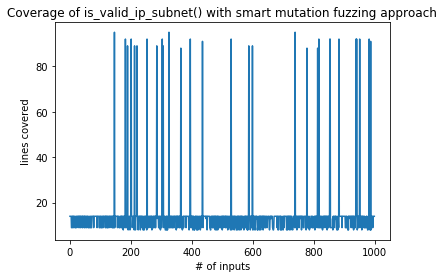

In [19]:
# Plot for pure random approach

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with smart mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')


# Credit Card Validator

In [240]:
# luhn algorithm


class CreditCard:
    def __init__(self, card_no):
        self.card_no = card_no

    @property
    def company(self):
        comp = ""
        if str(self.card_no).startswith('4'):
            comp = 'Visa Card'
        elif str(self.card_no).startswith(('50', '67', '58', '63',)):
            comp = 'Maestro Card'
        elif str(self.card_no).startswith('5'):
            comp = 'Master Card'
        elif str(self.card_no).startswith('37'):
            comp = 'American Express Card'
        elif str(self.card_no).startswith('62'):
            comp = 'Unionpay Card'
        elif str(self.card_no).startswith('6'):
            comp = 'Discover Card'
        elif str(self.card_no).startswith('35'):
            comp = 'JCB Card'
        elif str(self.card_no).startswith('7'):
            comp = 'Gasoline Card'
        return comp

    def first_check(self):
        card_number= [int(i) for i in str(self.card_no)]     # added this line of code to handle len(int) exception
        #if 13 <= len(self.card_no) <= 19:
        if 13 <= len(card_number) <= 19:
            message = "First check : Valid in terms of length."

        else:
            message = "First check : Check Card number once again it must be of 13 or 16 digits long."
        return message

    def validate(self):
        # double every second digit from right to left
        sum_ = 0
        card_number= [int(i) for i in str(self.card_no)]
        #crd_no = self.card_no[::-1]
        crd_no = card_number[::-1]
        for i in range(len(crd_no)):
            if i % 2 == 1:
                double_it = int(crd_no[i]) * 2

                if len(str(double_it)) == 2:
                    sum_ += sum([eval(i) for i in str(double_it)])

                else:
                    sum_ += double_it

            else:
                sum_ += int(crd_no[i])

        if sum_ % 10 == 0:
            response = "Valid Card"
        else:
            response = 'Invalid Card'

        return response

    @property
    def checksum(self):
        card_number= [int(i) for i in str(self.card_no)]
        return '#CHECKSUM# : ' + str(card_number[-1])

    @classmethod
    def set_card(cls, card_to_check):
        return cls(card_to_check)


def credit_card_validator(card_number):
    card = CreditCard.set_card(card_number)
    if not card.company:
        return False
    print('Company: ',card.company)
    print('Card : ', card.card_no)
    print(card.first_check())
    print(card.checksum)
    print(card.validate())
    return True


# 79927398713
# 4388576018402626
# 379354508162306


In [241]:
credit_card_validator(379354508162306)

Company:  American Express Card
Card :  379354508162306
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card


True

In [242]:
credit_card_validator(1234)

False

### Errors Encountered:

1. The input provided for the credit_card_validator() is 1234 and the first input from random fuzzer, which encounters an exception at line 23 as the input value does not validate true to any condition provided and comp value is None. Hence, the exception is thrown saying that string and none type cannot be concatenated. We modify the program accordingly.

###### Exception not handled for the input 1234 and trace is given below

TypeError                                 Traceback (most recent call last)
<ipython-input-3-b5199e87e50f> in <module>
----> 1 credit_card_validator(1234)

<ipython-input-2-6ba12240553f> in credit_card_validator(card_number)
     71 def credit_card_validator(card_number):
     72     card = CreditCard.set_card(card_number)
---> 73     print(card.company)
     74     print('Card : ', card.card_no)
     75     print(card.first_check())

<ipython-input-2-6ba12240553f> in company(self)
     26             comp = 'Gasoline Card'
     27 
---> 28         return 'Company : ' + comp
     29 
     30     def first_check(self):

TypeError: can only concatenate str (not "NoneType") to str

------------------------------------------------------------------------------------------------------------------------------

2. The input provided for the credit_card_validator() is 79927398713, which encounters an exception at line 32 and 44 because the program is trying to call a method on an int type of a variable. This would work if it would have called len() function on a list type of a variable. We modify the program accordingly

###### Exception not handled for len(int) and trace is given below

TypeError                                 Traceback (most recent call last)
<ipython-input-21-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-20-d6f2ff88e21e> in credit_card_validator(card_number)
     76     print(card.company)
     77     print('Card : ', card.card_no)
---> 78     print(card.first_check())
     79     print(card.checksum)
     80     print(card.validate())

<ipython-input-20-d6f2ff88e21e> in first_check(self)
     30     def first_check(self):
     31         #card_number= [int(i) for i in str(self.card_no)]
---> 32         if 13 <= len(self.card_no) <= 19:
     33             message = "First check : Valid in terms of length."
     34 

TypeError: object of type 'int' has no len()

-----------------------------------------------------------------------------------------------------------------------------

3. The input provided for the credit_card_validator() is 79927398713, which encounters an exception at line 68 as the program tries to subscript a list and not an integer. We modify the program accordingly. 

###### Exception not handled for 'int' object is not subscriptable

TypeError                                 Traceback (most recent call last)
<ipython-input-28-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-27-b93e4421e5cc> in credit_card_validator(card_number)
     78     print('Card : ', card.card_no)
     79     print(card.first_check())
---> 80     print(card.checksum)
     81     print(card.validate())
     82 

<ipython-input-27-b93e4421e5cc> in checksum(self)
     66     def checksum(self):
     67         #card_number= [int(i) for i in str(self.card_no)]
---> 68         return '#CHECKSUM# : ' + str(self.card_no[-1])
     69 
     70     @classmethod

TypeError: 'int' object is not subscriptable


TypeError                                 Traceback (most recent call last)
<ipython-input-32-3c8761c89add> in <module>
----> 1 credit_card_validator(79927398713)

<ipython-input-31-468b39fc569f> in credit_card_validator(card_number)
     79     print(card.first_check())
     80     print(card.checksum)
---> 81     print(card.validate())
     82 
     83 # 79927398713

<ipython-input-31-468b39fc569f> in validate(self)
     42         sum_ = 0
     43       #  card_number= [int(i) for i in str(self.card_no)]
---> 44         crd_no = self.card_no[::-1]
     45         for i in range(len(crd_no)):
     46             if i % 2 == 1:

TypeError: 'int' object is not subscriptable


## Random Fuzzer for Credit Card Validator

## Concept

+ 
    
## Random Fuzzer Approach 1

+ 


In [249]:
#1 Pure Randomly fuzzing Approach for Credit Card Number

# generate random value in the range of 0 to 1000000000000000

def pure_random_credit_card_fuzz(int_start=0, int_range=100000000000000000000):
    credit_card=""
    credit_card=str(random.randint(int_start, int_range))    
    return credit_card


In [250]:
pure_random_credit_card_fuzz()

'5621475016384050833'

In [251]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_credit_card_number = pure_random_credit_card_fuzz()
    print ("Input Credit Card Number is " + input_credit_card_number)
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number) 

print(valid_inputs)
len(valid_inputs) / trials

Input Credit Card Number is 51436658143785546782
Company:  Master Card
Card :  51436658143785546782
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 63580554278589507017
Company:  Maestro Card
Card :  63580554278589507017
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 5612320609958629008
Company:  Master Card
Card :  5612320609958629008
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 21407231397624726421
Input Credit Card Number is 40214053612853672746
Company:  Visa Card
Card :  40214053612853672746
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 15795076775131732359
Input Credit Card Number is 42848784720080319697
Company:  Visa Card
Card :  42848784720080319697
First check : Check 

Invalid Card
Input Credit Card Number is 22828012100003250675
Input Credit Card Number is 68296882007310634544
Company:  Discover Card
Card :  68296882007310634544
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 3275228207412862836
Input Credit Card Number is 57335306239603442989
Company:  Master Card
Card :  57335306239603442989
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 9
Invalid Card
Input Credit Card Number is 42820227573230448128
Company:  Visa Card
Card :  42820227573230448128
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 73887661185346736694
Company:  Gasoline Card
Card :  73887661185346736694
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 68449735801166207987
Company:  D

Company:  Visa Card
Card :  49077434759478556879
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 9
Valid Card
Input Credit Card Number is 30089810588948923722
Input Credit Card Number is 33075251652624954587
Input Credit Card Number is 80734407983091131049
Input Credit Card Number is 52635275921334017827
Company:  Master Card
Card :  52635275921334017827
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 49056392461005579144
Company:  Visa Card
Card :  49056392461005579144
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 4
Valid Card
Input Credit Card Number is 45668457538277494547
Company:  Visa Card
Card :  45668457538277494547
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 80377166322241680491
Input Credit Card Number is 2492999

Company:  Gasoline Card
Card :  71307052232735860412
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Valid Card
Input Credit Card Number is 85912489787022366806
Input Credit Card Number is 63673969447336913735
Company:  Maestro Card
Card :  63673969447336913735
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 5
Invalid Card
Input Credit Card Number is 17726327045232041971
Input Credit Card Number is 48608714782476689382
Company:  Visa Card
Card :  48608714782476689382
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 48088467384441130356
Company:  Visa Card
Card :  48088467384441130356
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 97772183679392743577
Input Credit Card Number is 72490963821744723697
Company:  Gasoline Card
Card

#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 22372131488434227188
Input Credit Card Number is 55002765079886817151
Company:  Master Card
Card :  55002765079886817151
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 1
Invalid Card
Input Credit Card Number is 434699121833419280
Company:  Visa Card
Card :  434699121833419280
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 88528936672231935988
Input Credit Card Number is 67758483593337809136
Company:  Maestro Card
Card :  67758483593337809136
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 77318106074869804843
Company:  Gasoline Card
Card :  77318106074869804843
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 3
Invalid Card
Input Credit Card Number is 68777294201014624054
Company:  Discover Card
Card :  6877729

First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 30415540286099869613
Input Credit Card Number is 20736708006442073486
Input Credit Card Number is 1628323481652223136
Input Credit Card Number is 14348327501948562917
Input Credit Card Number is 94736447267122640557
Input Credit Card Number is 88308951563976445078
Input Credit Card Number is 38252111732257298269
Input Credit Card Number is 39941612345286400144
Input Credit Card Number is 78702136089948489482
Company:  Gasoline Card
Card :  78702136089948489482
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 68973902942050016306
Company:  Discover Card
Card :  68973902942050016306
First check : Check Card number once again it must be of 13 or 16 digits long.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 15437513005873766714
Input Credit Card Number is 2969159

0.497

## Mutation Fuzzer for Credit Card Validator

In [255]:
class Credit_Card_Fuzzer:
    def add(s):
        #choose a random position
        pos= random.randint(0,len(s)-1)
        random_integer = str(random.randrange(0, 10)) # changed the char to integer from 0 to 255
        s=s[:pos] + random_integer + s[pos:]
        return int(s)
    
    def remove(s):
        #choose a random position
        pos= random.randint(0,len(s)-1)
        # remove value at pos
        s=s[:pos] + s[pos+1:]
        return s
    
    def flip(s):
        #convert to binary
        binary='{0:08b}'.format(int(s))
        #flip a random bit
        pos=random.randint(0,len(binary)-1)
        flipped_bit=str(1- int(binary[pos]))
        binary=binary[:pos] + flipped_bit + binary[pos + 1:]
        s= int(binary,2)
        return s
        
    def fuzz_credit_card(s):
        mutators = [Credit_Card_Fuzzer.add, Credit_Card_Fuzzer.remove, Credit_Card_Fuzzer.flip]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)

In [259]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_credit_card_number = Credit_Card_Fuzzer.fuzz_credit_card("4388576018402626")
    print("Input Credit Card Number is "+str(input_credit_card_number)+ "\n")
    if credit_card_validator(input_credit_card_number):
        valid_inputs.append(input_credit_card_number) 

print(valid_inputs)
len(valid_inputs) / trials

Input Credit Card Number is 4458944762580290

Company:  Visa Card
Card :  4458944762580290
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 43885760181402626

Company:  Visa Card
Card :  43885760181402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601802626

Company:  Visa Card
Card :  438857601802626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4458944762580290

Company:  Visa Card
Card :  4458944762580290
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 4388575481531714

Company:  Visa Card
Card :  4388575481531714
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438857601840262

Company:  Visa Card
Card :  438857601840262
First check : Valid in terms of length.
#CHECKSUM# : 2
Valid Card
Input Credit Card Number is 438576018402626

Compa

Company:  Visa Card
Card :  4388576018402658
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 4388576018402627

Company:  Visa Card
Card :  4388576018402627
First check : Valid in terms of length.
#CHECKSUM# : 7
Invalid Card
Input Credit Card Number is 4388576085511490

Company:  Visa Card
Card :  4388576085511490
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 438876018402626

Company:  Visa Card
Card :  438876018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760198402626

Company:  Visa Card
Card :  43885760198402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388593198271810

Company:  Visa Card
Card :  4388593198271810
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 438856018402626

Company:  Visa Card
Card :  438856018402626
Fir


Company:  Visa Card
Card :  43885760184702626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018402562

Company:  Visa Card
Card :  4388576018402562
First check : Valid in terms of length.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 4423760390491458

Company:  Visa Card
Card :  4423760390491458
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 438857608402626

Company:  Visa Card
Card :  438857608402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885476018402626

Company:  Visa Card
Card :  43885476018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018403138

Company:  Visa Card
Card :  4388576018403138
F

Company:  Visa Card
Card :  43885760118402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 44388576018402626

Company:  Visa Card
Card :  44388576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760118402626

Company:  Visa Card
Card :  43885760118402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 43588576018402626

Company:  Visa Card
Card :  43588576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760178402626

Company:  Visa Card
Card :  43885760178402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626


Company:  Visa Card
Card :  4388575749967170
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 43885760184072626

Company:  Visa Card
Card :  43885760184072626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 4388576018402754

Company:  Visa Card
Card :  4388576018402754
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 4388576018402624

Company:  Visa Card
Card :  4388576018402624
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 43885760184002626

Company:  Visa Card
Card :  43885760184002626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43878576018402626

Company:  Visa Card
Card :  43878576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 4384177971891522

Company:  Visa Card
Card :  4384177971891522

First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760148402626

Company:  Visa Card
Card :  43885760148402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857608402626

Company:  Visa Card
Card :  438857608402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018419010

Company:  Visa Card
Card :  4388576018419010
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 438857618402626

Company:  Visa Card
Card :  438857618402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4247838530047298

Company:  Visa Card
Card :  4247838530047298
First check : Valid in terms of length.
#CHECKSUM# : 8
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM#

Card :  43885760184902626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601840262

Company:  Visa Card
Card :  438857601840262
First check : Valid in terms of length.
#CHECKSUM# : 2
Valid Card
Input Credit Card Number is 388576018402626

Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438876018402626

Company:  Visa Card
Card :  438876018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388593198271810

Company:  Visa Card
Card :  4388593198271810
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 4389125774216514

Company:  Visa Card
Card :  4389125774216514
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 4388575984848194

Company:  Visa Card
Card :  

Company:  Visa Card
Card :  43887576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601840626

Company:  Visa Card
Card :  438857601840626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857608402626

Company:  Visa Card
Card :  438857608402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760418402626

Company:  Visa Card
Card :  43885760418402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576018533698

Company:  Visa Card
Card :  4388576018533698
First check : Valid in terms of length.
#CHECKSUM# : 8
Valid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43868576018402626

Company:  Visa Card
Card :  43868576018402626
Firs

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601840226

Company:  Visa Card
Card :  438857601840226
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760184026256

Company:  Visa Card
Card :  43885760184026256
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 488576018402626

Company:  Visa Card
Card :  488576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4386376995147074

Company:  Visa Card
Card :  4386376995147074
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438857018402626

Company:  Visa Card
Card :  438857018402626
First ch

Card :  4388576018401602
First check : Valid in terms of length.
#CHECKSUM# : 2
Invalid Card
Input Credit Card Number is 4388576085511490

Company:  Visa Card
Card :  4388576085511490
First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 4388610378140994

Company:  Visa Card
Card :  4388610378140994
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438576018402626

Company:  Visa Card
Card :  438576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601802626

Company:  Visa Card
Card :  438857601802626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885760168402626

Company:  Visa Card
Card :  43885760168402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4370983832358210

Company:  Visa Card
Card :  4370983832358210
First check : Valid in 

First check : Valid in terms of length.
#CHECKSUM# : 0
Invalid Card
Input Credit Card Number is 40388576018402626

Company:  Visa Card
Card :  40388576018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 438857601402626

Company:  Visa Card
Card :  438857601402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Valid Card
Input Credit Card Number is 43885760218402626

Company:  Visa Card
Card :  43885760218402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 43885761018402626

Company:  Visa Card
Card :  43885761018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card
Input Credit Card Number is 4388576016305474

Company:  Visa Card
Card :  4388576016305474
First check : Valid in terms of length.
#CHECKSUM# : 4
Invalid Card
Input Credit Card Number is 438857601840266

Company:  Visa Card
Card :  438857601840266
First check : Valid in terms of length.
#CHECK

0.951

In [312]:
from fuzzingbook.Coverage import Coverage

input_credit_card_number = Credit_Card_Fuzzer.fuzz_credit_card("4388576018402626")

with Coverage() as cov:
    credit_card_validator(input_credit_card_number)
    
[c for c in cov.coverage()]

Company:  Visa Card
Card :  43885762018402626
First check : Valid in terms of length.
#CHECKSUM# : 6
Invalid Card


[('validate', 45),
 ('first_check', 30),
 ('first_check', 37),
 ('_event_pipe', 105),
 ('checksum', 68),
 ('validate', 58),
 ('send', 390),
 ('validate', 49),
 ('schedule', 205),
 ('first_check', 33),
 ('company', 11),
 ('is_alive', 1104),
 ('write', 400),
 ('_schedule_flush', 329),
 ('validate', 53),
 ('__exit__', 237),
 ('validate', 44),
 ('credit_card_validator', 83),
 ('<listcomp>', 42),
 ('_is_master_process', 310),
 ('is_alive', 1101),
 ('<listcomp>', 30),
 ('_wait_for_tstate_lock', 1058),
 ('_schedule_flush', 332),
 ('first_check', 32),
 ('_schedule_flush', 327),
 ('is_set', 509),
 ('validate', 61),
 ('send', 395),
 ('_schedule_flush', 328),
 ('credit_card_validator', 77),
 ('<listcomp>', 50),
 ('credit_card_validator', 80),
 ('credit_card_validator', 82),
 ('schedule', 203),
 ('validate', 41),
 ('write', 403),
 ('is_alive', 1100),
 ('<module>', 1),
 ('company', 27),
 ('validate', 56),
 ('<listcomp>', 67),
 ('company', 12),
 ('validate', 47),
 ('write', 385),
 ('_wait_for_tstate

In [261]:
def calculate_cumulative_coverage_1_input(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp)
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [263]:
def calculate_coverage_1_input(input_population, function):
    all_coverage = set()
    with Coverage() as cov:
        try:
            function(input_population)
        except:
            # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
            pass
        # set union
    all_coverage |= cov.coverage()
    return len(all_coverage)

In [271]:
seed = {"43885760184026264"}
calculate_coverage_1_input(seed, credit_card_validator)

16

In [313]:
trials = 1000

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {"43885760184026264"}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_1_input(seed, credit_card_validator)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            y=''.join(new_pop[rand_pop]['input'])
            seed={Credit_Card_Fuzzer.fuzz_credit_card(str(y))} 
        else:
            y=''.join(population[0]['input'])
            seed={Credit_Card_Fuzzer.fuzz_credit_card(str(y))} 
print(population)
cumulative_coverage

[{'input': {'43885760184026264'}, 'coverage': 16}]


[16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,


Text(0, 0.5, 'lines covered')

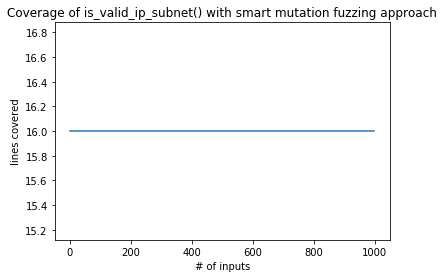

In [283]:
# Plot for pure random approach

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of credit_card_validator() with smart mutation fuzzing approach')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

# RSA algorithm

In [300]:

import random
max_PrimLength = 1000000000000

'''
calculates the modular inverse from e and phi
'''
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

'''
calculates the gcd of two ints
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
checks if a number is a prime
'''
def is_prime(num):
    if num == 2:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

def generateRandomPrim():
    while(1):
        ranPrime = random.randint(0,max_PrimLength)
        if is_prime(ranPrime):
            return ranPrime

def generate_keyPairs():
    p = generateRandomPrim()
    q = generateRandomPrim()
    
    n = p*q
    print("n ",n)
    '''phi(n) = phi(p)*phi(q)'''
    phi = (p-1) * (q-1) 
    print("phi ",phi)
    
    '''choose e coprime to n and 1 > e > phi'''    
    e = random.randint(1, phi)
    g = gcd(e,phi)
    while g != 1:
        e = random.randint(1, phi)
        g = gcd(e, phi)
        
    print("e=",e," ","phi=",phi)
    '''d[1] = modular inverse of e and phi'''
    d = egcd(e, phi)[1]
    
    '''make sure d is positive'''
    d = d % phi
    if(d < 0):
        d += phi
        
    return ((e,n),(d,n))
        
def decrypt(ctext,private_key):
    try:
        key,n = private_key
        text = [chr(pow(char,key,n)) for char in ctext]
        return "".join(text)
    except TypeError as e:
        print(e)

def encrypt(text,public_key):
    key,n = public_key
    ctext = [pow(ord(char),key,n) for char in text]
    return ctext

def rsa(message):
    public_key,private_key = generate_keyPairs() 
    print("Public: ",public_key)
    print("Private: ",private_key)
    
    ctext = encrypt(message,public_key)
    print("encrypted  =",ctext)
    plaintext = decrypt(ctext, private_key)
    print("decrypted =",plaintext)
    
    if message==plaintext:
        return True
    return False

In [301]:
rsa("heya")

n  714215626571867788566061
phi  714215626570164734109952
e= 282799897771533881109155   phi= 714215626570164734109952
Public:  (282799897771533881109155, 714215626571867788566061)
Private:  (701803775965818371327243, 714215626571867788566061)
encrypted  = [341788421278351638181372, 35052475626584668576279, 443448113284264795160809, 101449682030548597461969]
decrypted = heya


True

In [303]:
def pure_random_rsa_fuzz(min_length=10, max_length=1000,
                 char_start=32, char_range=32):    
    string_length = random.randrange(min_length, max_length + 1)
    out = ""
    for i in range(0, string_length):
        out += chr(random.randrange(char_start, char_start + char_range))
    return out

In [304]:
pure_random_rsa_fuzz()

'>/%)?$% (#+!"5,$)03->+>197\'36,28<!) ,&<7<(&)616*%;.-99(5+6#&4=7;7,*63(?>.&,$5";)4?86>=7 ;:! 6#9/<93<&5#"8" ".5\'6+2.:+$.%>?>?&:'

In [306]:
valid_inputs = set()
trials = 100

for i in range(trials):
    inp = pure_random_rsa_fuzz()
    #print ("input is " + inp)
    if rsa(inp):
        valid_inputs.add(inp) 

len(valid_inputs) / trials

n  31252493750171927588221
phi  31252493749685100979392
e= 8479075714447938367465   phi= 31252493749685100979392
Public:  (8479075714447938367465, 31252493750171927588221)
Private:  (3309077445110322555673, 31252493750171927588221)
encrypted  = [24411419849199080226493, 6976081794828928688873, 1681802516202078844434, 6042572916327220017771, 3134634099835581878917, 2300479066357953546547, 13364433012240991664850, 5551697487513236694301, 14856351119689822475357, 22412047024658054167239, 2802086272022468148567, 1681802516202078844434, 13364433012240991664850, 21813204844132128756356, 9469291840249828083558, 27521149210958724311285, 22412047024658054167239, 3134634099835581878917, 14384475994027583471230, 14384475994027583471230, 21813204844132128756356, 21203205198732000031559, 24411419849199080226493, 2802086272022468148567, 8877731834662004589889, 14384475994027583471230, 27016964033123751865869, 1283585889584653770646, 5383616473182490356080, 1681802516202078844434, 1681802516202078844

n  377667072480778077187793
phi  377667072479515422572340
e= 231455591638664963518007   phi= 377667072479515422572340
Public:  (231455591638664963518007, 377667072480778077187793)
Private:  (231669911093698070293583, 377667072480778077187793)
encrypted  = [266803551179340679815708, 283230133352562747781752, 194838921063523379059197, 367298360994320114185943, 357399727719311397349393, 357399727719311397349393, 13804155871894416012152, 79579877594433736840691, 367298360994320114185943, 189592530847866067522617, 279290841085208417297689, 283230133352562747781752, 263459959014675024518472, 356074652419074068960686, 276328223579524354496084, 342435356218390579881198, 75228224160203309210294, 13804155871894416012152, 72155004737007386948216, 357399727719311397349393, 356074652419074068960686, 262756766177611541991542, 274419483165497004303353, 91973571436155242969456, 189592530847866067522617, 283230133352562747781752, 214026444077654654644794, 175447488198542703666144, 236393831518104240938

decrypted = 29,8!!/:8=<90'$"?/(!'4.#=9+71',#) /<37+-";#,/$#/':* 650(6<662-7:3>>1/0*;779=.%"1;-6$;05?75'." 71;9!51+" 70>?6 ; 85(!/+21*<)#&.7(#*0$'1#=$:!+6- 0>84(%'!/6%<'8;(,.5>+1",?& ?+8=68(2/)0%#+6!7458=>0,+=$&4":? <)34'*66%(4 3"7$//:41,#?$+#769<%%25#3;-$=46#24,8+(><<=0)#&)3>;4(;,80',<?3" '&#.27>03,4#&4#-+)=?2.867.+755<79%?!+8,$19(:;8#+5(4+! 2.7 +?9<46*'9$<1 :.56':?9;/<"31'?1;#>-5$7<3,+ '>/+;)!&/&1(394*-'/562/.('<08";<&=<2""39;.>&%/#0)$4.!3;)7& 2/.3/4-8#-?<9.0;) !9<%;##!4%47"%"48?8=:,%-=9>?",/%+?94?3+#'42$-&988+0*(7.'>$+#+?6?;?.>#44,,"*#0=-+5 6<-7=,---=*7? '/!55=44-?*$--7&3'/-$!?06'&8><?12!(0 &'?$: -477/2-7=5<85%;52$#="'!.49& :-' "!><+/7-,?1=;?4+ ,/2?)641 *09#.2%-"!?1.3>"0550,-./">!<5>>/7?><%$8+04#01'>7)1(;3;6!9))+0:-'93:>28.1-57:+8#"*> 3.:2%&-.4>=,7>/8=#;,,-=97>/  -"**#8!!5%4$$$:78 =/?*?7.#8,  ,<04<(;6+'.&+5>=3?4 '<22<!#%-8 "11/1!. 8/2>("
n  607377214005456258900149
phi  607377214003884311358336
e= 521056040002140519576799   phi= 607377214003884311358336
Public:  (52105604000214051957

n  64604803026930813738571
phi  64604803026114301624200
e= 35242689161141005823833   phi= 64604803026114301624200
Public:  (35242689161141005823833, 64604803026930813738571)
Private:  (16188482048257197271897, 64604803026930813738571)
encrypted  = [963372369885985497935, 379283585160055393885, 31933723427471193838603, 2911279318018285935170, 17673067809753749597655, 28939433778398393000410, 2911279318018285935170, 379283585160055393885, 22081829334029970462030, 17673067809753749597655, 59112958759351474695469, 44976241530022310410899, 58944048569595429908462, 8266759790314467053915, 30517404592705754129791, 59024021648774984016854, 45438322671136782153598, 44976241530022310410899, 8266759790314467053915, 58944048569595429908462, 16281750651109189089211, 42940631328498099981899, 20497834280532601935476, 31059507173984222184791, 20497834280532601935476, 30517404592705754129791, 52183220555287640511848, 53168788521632571287306, 8266759790314467053915, 7574383921686125891770, 4543832267113

n  499917151692015936841117
phi  499917151690591840703680
e= 161833837589194613452917   phi= 499917151690591840703680
Public:  (161833837589194613452917, 499917151692015936841117)
Private:  (415839498339013908158173, 499917151692015936841117)
encrypted  = [99878286516317449386101, 361539015913026781450201, 462048527899107300169159, 286808426020687966362322, 161239947453520839710431, 138607770498272534656332, 323152911775052829547010, 54200232173249782738221, 37615890766350531551931, 153926682972677927334552, 323363110898945675029483, 406748451817457853841391, 52735394169168767532373, 406748451817457853841391, 441511336249599727449149, 451020975023209935914847, 30332635814128448251101, 361539015913026781450201, 66594877716331660428153, 153926682972677927334552, 204295556379474940477452, 161239947453520839710431, 441511336249599727449149, 159396833157503020409548, 66594877716331660428153, 323152911775052829547010, 99878286516317449386101, 153926682972677927334552, 13860777049827253465633

decrypted = :16.&-<0%;?",")*91#;>&)(#<:;- %7<? 5-3=:'50<? '!0>-,<0,28*0,;;4/5:-="1$7&/6,9:6!=>-5<5)6 5+-",7<5+4-4)6%7(/#891: $$0* /380#""),;<)%5()2*?6:&&.8.8':/9%13 1+.#=/7./-)1(-792'26 "/3(6;)#>$#7:'4-7 ,*(*5"05&/0761%%8<&'(97<5?;4+; =%87'!1 (0=5=?%,6#1++0!-*2)(>$8-$ 15% .!4/,07#:5:8'( +!04 0!  *4/&>4:8:*:9/&9"("0?"6&$5-"'8-6725(>>+( -=% (8:%& =3>?*#9 ;409>).'"* $*&"6?*'8'=&61*%(4.;)<(&:99:3&9%!'"6!8=0>*$7%?>7**36 /'93?82"*0,#)1-:'<>++:>8;/21?30</$0'6)=++8;$$6 :4$50!($==*><'9%<9=#></:8$$60=-4'4(086,9.'"6,;0%">?+#?$(0,/7--2(.6(+!.?7(+'0-*&6+4 =;>?(#<0'%&.%7)1(0>==&0<1-$153"#<; 36>)>0;#7&+?$#;2!=2"556,0<9=55(.>-4&:*;9< )>,!*5;>-(%? )&!6" =!*)"7-(*<4.0/%!2+/<,&#-++*!)2$2:,3>-%>652%2)"(*/4?(<11':9 >0$3=.7.>(8!* (9$,#'7;16?,(>*%(&>7$5&#$=='+8!?=6/4=:(%</-92<<5 0>? (0%92:8?:2!+6&((9/4,$=:?5, 60!;<149
n  88765952983993277355863
phi  88765952983110717627600
e= 37041358954373460869681   phi= 88765952983110717627600
Public:  (37041358954373460869681, 88765952983993277355863)
Private:  (49477932

n  300556136261052971498051
phi  300556136259882213468672
e= 179741974472190145538615   phi= 300556136259882213468672
Public:  (179741974472190145538615, 300556136261052971498051)
Private:  (59635434276685456378247, 300556136261052971498051)
encrypted  = [37671335565784455208050, 35870158433711891172466, 74966498653220077198340, 217831927010947199397126, 119185982795122538407853, 261169417694688527510126, 18649188688702894712880, 89584220668959283016110, 9248965346887331885069, 205297054423511106069468, 182635914466457106238938, 175669564064974504987409, 145625191880913191141861, 36743018938829210939780, 217831927010947199397126, 98086795780278348449455, 205297054423511106069468, 35870158433711891172466, 35870158433711891172466, 251867709391107329073758, 36743018938829210939780, 3314155902695461970547, 68477754296440040227630, 35870158433711891172466, 175669564064974504987409, 145625191880913191141861, 145625191880913191141861, 124279386288830559376700, 175669564064974504987409, 733175

n  529183473709764212620829
phi  529183473708236317068384
e= 188224165685142168088681   phi= 529183473708236317068384
Public:  (188224165685142168088681, 529183473709764212620829)
Private:  (338780403833020102693657, 529183473709764212620829)
encrypted  = [418163078019908249306684, 86168110044975036808912, 88221574046407846627605, 409005746346317079034573, 418163078019908249306684, 506733057863766810592358, 224327495996958577311623, 362580581769423493460118, 528036429851056223899270, 235753355178243069460027, 98584311945249523254186, 278268291111923230162220, 409005746346317079034573, 503177723632195906790755, 286811599686137780870228, 99321259921789214436259, 159923359577512571532943, 86168110044975036808912, 475494957491974870351494, 498475887331160617467369, 498475887331160617467369, 528036429851056223899270, 271657834356769961706879, 88221574046407846627605, 362580581769423493460118, 390472087491345024959409, 235753355178243069460027, 505120520002342470870594, 475494957491974870351

decrypted = !-( !89)"<#= :$%?-.11">()3<0.16 $-75&8,/!:"!('1,685;32'9=-4"+6.81>4/?:,/78*3"7$2'6:8;;3>%65!*>!<9-:7>)-%./>%6<1=50)1!*</./3(&($#!345#5:',-17" /91$;4.*&<:8<15=),',53-1;#;*88<)8#6$"-?:/.!2''";$#96"8(5'1+12%/$&;82.4/1-<$=3(#/9(;-'*4'(27>*9%?-$82?- %:<(;38#:.1?3&$8?82285)#,#-#+83%&#=5631(=$;>22+7&'-27#-.,&5$6"0. ?"?6(-3+-<;2>==)-) &8+!4:+4/62:-410#"'2?0,$':=1.$4$4; "77#=+"8+'(>45":%;>53#7##5,)4# *5>,<!%9).??"$ /?*)$%; -) "($15".&(; ?$/ 1&&39/ 1=,+9"0(4$5#! :97:2$%&9%<750/=!*/7!#<,%)0<4+60%)/=,2<'41-'7()>&#6?>:2"16<?*$>%.687>)$/-%#-- :5)+#;63 ".3;,=6%:699 :7%>7)-=   +8%<)?)+'+->:"3))/423$4/)"$;&#>62(%.&20"/3;$.&97>7!=  '."3)("'4*;+&".%9$.5<9*13+.61?4/4 14"9)$::-3#.8-6.+<3,0.7"<-63)'>6(>'7>0 67 ->0:"'?+2("#;=#8$)%5&6<,"-<;$<9'&8</922,1/(;)&,>/',!0'?4 6/:=01(96",98(,6;' %"/27= 1(>?;2:0;64*1/4)3932(#3=;0.#-;8);=#%/99 +.$+/>94/$.&)! .*,!-&?;0<8%9)"';.*6.;')":831:;;=<!833;2.+ 7 .56<;8$58*,2>'-&900-1=>5>8'699 6"<47)6/ -)8/,7' )0<9-%)2$?7&3'635*"0>43;<" 6&+6/*-8,<&/9&!62'%?)*$, &(#: 1 

n  41741486734438193832167
phi  41741486734027371024336
e= 5990018512577797533383   phi= 41741486734027371024336
Public:  (5990018512577797533383, 41741486734438193832167)
Private:  (13082734066350803184263, 41741486734438193832167)
encrypted  = [41197137854678511376678, 22583414207147433741460, 2160494850294410693842, 2525814613815662473707, 2318864623335724967216, 15563710731411909128956, 2525814613815662473707, 31512601925044704982147, 32198204040514852826830, 24475968790086314727939, 27562668453132143390758, 41197137854678511376678, 22583414207147433741460, 27562668453132143390758, 2160494850294410693842, 41641811087762597131236, 11811338348976687596745, 2318864623335724967216, 6422212200054560498900, 32198204040514852826830, 7001873483186569784952, 31512601925044704982147, 34026668542720277101100, 34026668542720277101100, 2160494850294410693842, 2525814613815662473707, 2525814613815662473707, 34026668542720277101100, 11811338348976687596745, 34026668542720277101100, 38320797542449

n  115365411845808579564037
phi  115365411845113064018956
e= 13158570129225549541477   phi= 115365411845113064018956
Public:  (13158570129225549541477, 115365411845808579564037)
Private:  (5420217566928262115013, 115365411845808579564037)
encrypted  = [8112061149652550513318, 84310719997322201561034, 63222004460815726554428, 8112061149652550513318, 96728227024643732687433, 8109457191006252718292, 8112061149652550513318, 66114538364817429038290, 75071527900026139376269, 92363137693618771469224, 63222004460815726554428, 88123290552198847638305, 57943918114576604683138, 105947408082999767122765, 57943918114576604683138, 80002245727590005033181, 63630646892937217268039, 63630646892937217268039, 8109457191006252718292, 75071527900026139376269, 33699731424577957583286, 15699526793619805202879, 8109457191006252718292, 75071527900026139376269, 75071527900026139376269, 75840230286980723605366, 98045928404551414659307, 63630646892937217268039, 96728227024643732687433, 72754779515902256724952, 57

decrypted = '46'28'> #60:&:/558 ,)8  +!52=:..3:=615-<81++%7:;,7?2)./0" /-'89.5?<2!=5/*352 :!*621->%7,9  46$.$*14?43,4+-#=3>#/'2(:-,5=+9.;78 8"%:%)8;5?-,,34('<!2&%8=%.:9#>2%441>"<0>&,?67(3!=(")6=065;/>76+0.4) %/",43.$46&;<' 0113(+<;2& 3,>2?6".9;,=%253*2=<.>+73(/;&%!/=,9->!)623>8(""+,$0%+40-;6=+5804.+$47<:!+&/?:2<46? =%)+"<*.*#>>3#.&4"58(9:7 >)#.)>=21#):.$&;>:+ 8*%6>2?*?,'-9%94!(*#)?++(<=<!,>!$%,&;08)-!>>)*5..*;-"!:#(-: $=81)$ (9,5$>;6  47=)(5=8=:(0?0::"+#* -:8-.'(1*<,4"(;=(=-':(?;=+14<9/*648"3.=5" $4?;8$"(=*2% >96 0:#*77>3/,$#+08+.!'36<(,1 $(% 2 1>0!)2.2,:+40,( ?'22220>=;)5><<):?$0-* "*89*<,*!/%>'*;9:$#*2<"=&4#4'<=$>4%79$!&#5*-/$*.9?:$#<&11&$%./7"("5&%><'"7*#;1%,-/1"8"&<%.,4+<&$24?8$0/ %$1&:7).<5-)":=,1(>-+448*"!+! ?"*/7/>'>5%-+#,3?=41-"'. 541%+059203<9"(2 ";!30&4!=++7-!+!""13(,16%* 9;>-=6=9$&>&#)/: "0"'0;58<85! $4><8  '"*.9<67%'#/:;%$)+;#:)&4$"1047)5$1#01*#:.<.<50.<)%,1$6$ 80<%
n  7923494130387549200831
phi  7923494129941887166464
e= 2373102735086892625883   phi= 7923494129941887166464

n  78186734051785222712297
phi  78186734051126130611076
e= 18400995094912254224969   phi= 78186734051126130611076
Public:  (18400995094912254224969, 78186734051785222712297)
Private:  (1219966033022841879149, 78186734051785222712297)
encrypted  = [76055934487881436151612, 23025935606645468008591, 76055934487881436151612, 64738570286832218803291, 50797622930148135389252, 63695700827608685222415, 23025935606645468008591, 17302974198917276854943, 59086413757254740672433, 29321198939984008051048, 63695700827608685222415, 56381868121569342025486, 65669693887417070743075, 17302974198917276854943, 77783900640203108181855, 29321198939984008051048, 16785010797627467042122, 31552010251370214483197, 16785010797627467042122, 56381868121569342025486, 9095554306237949497440, 54792894857839311658224, 38260074392864444695374, 37061931516589362751501, 11249038836598787860981, 64738570286832218803291, 70988527690700287715357, 50797622930148135389252, 37061931516589362751501, 53251463403012028075083, 103

n  542373663152081872643629
phi  542373663150603622149084
e= 432550504591923893325275   phi= 542373663150603622149084
Public:  (432550504591923893325275, 542373663152081872643629)
Private:  (39154690648473769541255, 542373663152081872643629)
encrypted  = [44061041469253652985133, 393276585754554954348332, 271866459512085102175813, 254632226554738896212452, 280103927026283718935376, 280103927026283718935376, 475758436514063365461843, 379329160276378087683056, 254632226554738896212452, 348176285064123329422221, 379329160276378087683056, 132419599530237264952494, 530061492362040731436533, 97344891614378984757949, 412409863313956441205676, 424659271960250168531830, 460880262566124873639860, 86355704051151377307314, 424897130635440969861968, 280103927026283718935376, 352980831227082330733758, 383094422109986202179745, 337255644244642790830850, 239456841570578373602451, 98616912853490697199783, 451847205182209578211163, 358208839230420662595644, 530061492362040731436533, 44061041469253652985

decrypted = <#619!05:(87./ &")(#97'0;)22947377)8$325-#5998,2,?&?):319)50;(=3>18 0 '?,29-9-,#3().2%=0?1&+4,-!!)5,,/>#//"9%=<8<1&90?,:<40>920=>,:##916,.%<1$<9<!--"">5 4':8=8)#6 "=3/-#8"-=( ,'3*0"/==>4)01)%"-(=/$%).=1$0218)!7:))7/84'.#+;;<!0"5*73*<5">.=#(4#.74 ,<3) );#65&):/;#-/+4$7&4>.&&%)3*=7)4:68.9*/84"30/.$8)94-$/"51>=7?015819$243/#69(-<!?*.0)(&2%:-?54:?2+=*>,+1+3&;0&>#+ :;'3#%*.,<)7!1-:.$8%,$,>(36>/0/;::,?9;:4 $$:?!62=+.4&$;:*";2)*%5(165"7&!('8;8;)$?;$',!+9,95;+!42:5;..6=<3,)"5/:6!8&%;&5+"6,+4)/2+/ 864?0<-(,$<6>'&6%6&(//()'(0&2 >=!*=#.!<=&)?1(=22?>#?-15&!$!' :$>3;8#;97*"4'&2<8,<6;"192)";55-1).0/;3<.!#941/#4$52>'.9!#/&7?9'.##!=9: 5'6# +*',.'53<(+.++$1=$91&1%0<2'8=380=+=7)+,';<%56=#:,2=/8"2-#4>3<46$&)"><1,>#"'.$-:82>'8:?7 +7<,?0&$&<<)30((<<.5&)(&??*49&1=9/764+%776+&%:.%<>/9#714"4<*"90 1%-0;1#-?0?)0-!>>;1  !5$%> ?-!4=>47$4;$065$=<!.2 7&!6*$?7?+:%14 ?<7960<-0'08<746-6#3$/>; &-,1(;>40$-6.=%97&!>--*!,(*/--(#2#*'>3>?3*)8"22"=+4;4(73"-58$)=0"0'/&=/9 ;5241;/"9<3?4.48"
n  261713456133431211055

n  305962765500786603790183
phi  305962765499615497477128
e= 290674221164494048652903   phi= 305962765499615497477128
Public:  (290674221164494048652903, 305962765500786603790183)
Private:  (239900887863863365363415, 305962765500786603790183)
encrypted  = [266836045812280813041304, 213883192459833865348298, 251618078121666526958971, 128716899859035417462998, 60038051811751764619849, 126248215423728922148113, 126248215423728922148113, 74997950616743466400813, 164248261142658656118949, 292024788758105980702218, 131087810904043043716126, 93468906294685304964218, 246499471819966142331033, 167728608179066745804353, 164248261142658656118949, 204026416496058205244745, 130367426238890279926895, 47385378471959379403665, 108044629513552674078458, 11165071149890986114467, 108157583373393967880054, 79665497993124163033137, 130367426238890279926895, 128716899859035417462998, 7103451988893485701208, 133383253796672863424452, 292127667172365503478385, 167728608179066745804353, 10804462951355267407845

n  155297895069894294447253
phi  155297895069011730882880
e= 95246827132502860653837   phi= 155297895069011730882880
Public:  (95246827132502860653837, 155297895069894294447253)
Private:  (133402894545161646568773, 155297895069894294447253)
encrypted  = [121884696503725462134499, 133436362708512031148080, 9893024270520663800846, 133436362708512031148080, 133436362708512031148080, 60757798705952131842109, 74339024429782669623417, 133436362708512031148080, 148016708147180907405168, 60757798705952131842109, 99025891066950915583816, 2088015954411372191742, 60757798705952131842109, 148016708147180907405168, 148425416389475424386471, 2088015954411372191742, 110129363325941811008993, 103614724016769560768948, 148425416389475424386471, 110564686707791275003065, 48763958395610806628811, 48763958395610806628811, 9893024270520663800846, 13076477222353679555578, 28195079276429960589672, 148425416389475424386471, 20665933901916308287391, 28195079276429960589672, 32377923124418680881526, 10361472401

n  505299074359190610346637
phi  505299074357698701578496
e= 436025687563587692597507   phi= 505299074357698701578496
Public:  (436025687563587692597507, 505299074359190610346637)
Private:  (96381134865774484660907, 505299074359190610346637)
encrypted  = [3610806562388226670168, 258371714629961891117852, 308113723610810333304005, 242791229966870216164035, 115447966082517503978246, 294368690956775485827672, 292065936840867908498897, 55177289052825220773424, 294368690956775485827672, 287826414698284668293566, 289381362287743248632749, 298827765276555982826237, 287826414698284668293566, 420458809831270035382351, 324248573210338178935492, 270842952773095315675951, 3610806562388226670168, 158525741675866476874881, 300409734952645121591393, 90752497843261776795153, 397013146747010691500424, 172268632888493120020365, 55177289052825220773424, 90752497843261776795153, 298827765276555982826237, 298827765276555982826237, 292065936840867908498897, 338710991653620329269232, 397013146747010691500424

n  165497191618327294698529
phi  165497191617371482715184
e= 71936800578577277247349   phi= 165497191617371482715184
Public:  (71936800578577277247349, 165497191618327294698529)
Private:  (134386916278192190960941, 165497191618327294698529)
encrypted  = [111995449671092731671152, 73703436130037292523157, 111995449671092731671152, 27030988938215952902371, 123083861613341410035324, 15862278454417643222432, 153568781189914815803545, 27030988938215952902371, 84946237911452974326605, 33709440827678290550700, 88928918555830871169694, 126157781385296195183221, 27030988938215952902371, 144781523832822924961316, 126157781385296195183221, 104690809216320230692207, 72996387336437651203160, 73703436130037292523157, 2429039822685465074466, 88928918555830871169694, 144781523832822924961316, 158001650704388030489399, 72996387336437651203160, 119718851545134597270328, 126157781385296195183221, 2429039822685465074466, 42767858059553879916999, 111995449671092731671152, 73703436130037292523157, 140559043

n  264039668727003991574381
phi  264039668725796851774332
e= 137299279221747134944177   phi= 264039668725796851774332
Public:  (137299279221747134944177, 264039668727003991574381)
Private:  (29045521183792998186637, 264039668727003991574381)
encrypted  = [220422920125628946301288, 199575923252786558083441, 180919582878466701201920, 10363509353325094754137, 218353803835572018416224, 216583052967602342433678, 114743359499264397233974, 90661223224312062945691, 198979503657800656362100, 79928468929604478650703, 218353803835572018416224, 205889775587519413744592, 37217100394040451752871, 239219507777875882589626, 220422920125628946301288, 205194143797968163824360, 218353803835572018416224, 235386928440625015979345, 37217100394040451752871, 235386928440625015979345, 235386928440625015979345, 56045922718664919097239, 239219507777875882589626, 116382397668858335189753, 104386483604441107998635, 37068431826914393220140, 71499509364373145910319, 48777352920292199548437, 218353803835572018416224,

n  552675836425074728506619
phi  552675836423587672007160
e= 256041462475068795872857   phi= 552675836423587672007160
Public:  (256041462475068795872857, 552675836425074728506619)
Private:  (32040455944834430434753, 552675836425074728506619)
encrypted  = [328981078625619649179914, 257723900378434895687415, 379252339930331268000023, 426624195655210743930811, 40500525155328812948764, 293826080631746418645520, 434527995657816601233390, 175379064752370475299651, 175379064752370475299651, 434527995657816601233390, 293826080631746418645520, 203338961837884745581230, 194249269477106161601561, 245472503892524324372520, 518625231437543879890230, 221611648597091263216125, 52061719028207835483760, 118478410540575010939779, 518625231437543879890230, 449041871972735734956472, 211827946282461811849219, 211827946282461811849219, 379252339930331268000023, 437243713887991120657847, 437243713887991120657847, 436300968394018734821464, 254113859357622953997475, 392200456022871683913312, 405005251553288129

n  370099873335603039520361
phi  370099873334344825496532
e= 269248809255252762467843   phi= 370099873334344825496532
Public:  (269248809255252762467843, 370099873335603039520361)
Private:  (211874388670499793932639, 370099873335603039520361)
encrypted  = [318011249026615644129033, 239826542167961311060473, 186499552975815180841242, 161202239341825472525135, 65776924867864108586682, 289173435261074076077399, 60883979010082994019503, 230555682348548179980642, 230555682348548179980642, 288852987657932139297733, 34180823431351606962011, 99763684144609791599756, 34180823431351606962011, 167429976350509920024996, 93218125457138952954584, 230555682348548179980642, 292773484942730063158518, 125474631597929001539501, 233775271091181321048568, 186499552975815180841242, 45045658524689182382471, 355959876599458628220325, 289173435261074076077399, 65776924867864108586682, 167429976350509920024996, 263102421939711678030421, 230555682348548179980642, 269966488596769656704205, 17895895092851993263359

n  60327124347813808931333
phi  60327124347131738022540
e= 22279219367033118142717   phi= 60327124347131738022540
Public:  (22279219367033118142717, 60327124347813808931333)
Private:  (32480622381126864269953, 60327124347813808931333)
encrypted  = [34535254172141479078950, 18822742774106383636309, 33301496755766439998617, 9712530135571140848910, 8944173296165376946762, 41052532114927192079237, 52675970025357059097168, 56382865893802241090535, 44420552289134810358500, 56382865893802241090535, 18822742774106383636309, 4988845578740464798638, 53933586429602292696070, 52285465599588273396260, 59767474018711716530856, 40027411641055444141656, 34535254172141479078950, 58643427708610849429359, 5825562264428465012529, 52285465599588273396260, 27128431517614434904383, 38706790863715651710887, 40967427166634306119531, 9712530135571140848910, 27117888943901560473521, 52675970025357059097168, 24452941278543832482939, 33301496755766439998617, 18822742774106383636309, 27128431517614434904383, 539566

n  232244304556576221323509
phi  232244304555535755106816
e= 108123257225636704133129   phi= 232244304555535755106816
Public:  (108123257225636704133129, 232244304556576221323509)
Private:  (72455307166770737214009, 232244304556576221323509)
encrypted  = [151076136213129629478146, 89230248914305895266104, 188037134794753919391039, 188037134794753919391039, 112211397472349244777678, 69696926695982709651509, 222100521027849770156993, 82379305698329932148208, 70957842048918574609461, 214426894644973707599249, 67209571812155834257495, 112211397472349244777678, 32768490546894548358165, 32768490546894548358165, 1176120674734541265483, 85051351043853885475482, 132225566101323375560576, 32768490546894548358165, 89230248914305895266104, 85051351043853885475482, 154941466405311897400802, 194808008451603600772871, 212449553640151838881060, 90345336593457587720761, 154941466405311897400802, 212449553640151838881060, 45030958192645571862924, 112211397472349244777678, 112211397472349244777678, 90345

n  517207532881129368282157
phi  517207532879661903427356
e= 143441718773629090176209   phi= 517207532879661903427356
Public:  (143441718773629090176209, 517207532881129368282157)
Private:  (427821982097038373355845, 517207532881129368282157)
encrypted  = [266970521194010100203398, 330403181866744038109711, 273950606800075182570795, 513410494624624496944574, 88477563868830507722984, 273950606800075182570795, 419995957996145922601467, 143308335457436935948117, 34159955707598631674293, 509892389763219012728244, 330403181866744038109711, 266970521194010100203398, 406753700903565185390268, 406753700903565185390268, 466349523911487444217941, 143308335457436935948117, 143308335457436935948117, 322994421555608773477253, 316485523227177145417869, 34159955707598631674293, 138917975118627325550974, 224484854765644707060137, 224484854765644707060137, 36232904296688954575894, 157241040395917828089001, 224484854765644707060137, 330403181866744038109711, 174853591210218831016151, 4199959579961459226

n  92941483008407756978351
phi  92941483007759479970400
e= 60822047539774922456423   phi= 92941483007759479970400
Public:  (60822047539774922456423, 92941483008407756978351)
Private:  (34942720407177414060887, 92941483008407756978351)
encrypted  = [65457784121507134696004, 7130590445169463162858, 30376772376707625421767, 77776060676483950046027, 65457784121507134696004, 69047805392442784984240, 30376772376707625421767, 16227392365313117689725, 77776060676483950046027, 67524607073690036372427, 66630094029414353168211, 66630094029414353168211, 19365751997386027426928, 46590161665801749271834, 3912541367429015761207, 77776060676483950046027, 91977388261254860630872, 7130590445169463162858, 809586461634539181795, 30376772376707625421767, 18438572111807090538096, 30376772376707625421767, 7130590445169463162858, 61338283282950315537884, 69110925154943375625359, 62785140517577788677942, 69110925154943375625359, 29427259309864477687709, 67524607073690036372427, 7130590445169463162858, 46590161

n  518058072126694212551227
phi  518058072125220779535600
e= 486208349504268564321637   phi= 518058072125220779535600
Public:  (486208349504268564321637, 518058072126694212551227)
Private:  (42028242674305623140173, 518058072126694212551227)
encrypted  = [313866452746997974331754, 79671519057967717134664, 500182859677715016726804, 184525475621578672320294, 273805455356808950931753, 484908835299205376854774, 79671519057967717134664, 181986983665396463005487, 295709251908607894031872, 484908835299205376854774, 241988426971466935527435, 334527722643114296433297, 313866452746997974331754, 137460885651273095013464, 313866452746997974331754, 181986983665396463005487, 295709251908607894031872, 359024605884793808619628, 79671519057967717134664, 337451443505217124512624, 273805455356808950931753, 359024605884793808619628, 105545937811534853498939, 359522867023020115669813, 181986983665396463005487, 241988426971466935527435, 166718388262344374901106, 313866452746997974331754, 7967151905796771713

n  64219648200535290206123
phi  64219648199791994117208
e= 42463835860254126519527   phi= 64219648199791994117208
Public:  (42463835860254126519527, 64219648200535290206123)
Private:  (54274090448677297272335, 64219648200535290206123)
encrypted  = [22064751645520857287494, 27497590208469419450595, 14512275378098829108239, 22146351311002058851904, 33287982335247784814266, 25057704573624580854107, 22064751645520857287494, 45362654780498321979163, 19967884775995347096699, 25057704573624580854107, 42480489250860228849444, 13997014875120323019438, 28689378893188738876616, 16326923321278393816709, 28219268691313499509924, 13997014875120323019438, 3357247644491579105268, 50431807370691684465016, 13997014875120323019438, 57225530250492482067264, 45362654780498321979163, 48994318232017476597577, 22146351311002058851904, 41548112119226805451017, 52244588037967625370399, 33287982335247784814266, 15266234398285390520434, 54468631358058015621646, 3357247644491579105268, 22064751645520857287494, 543

n  204468220604841468091849
phi  204468220603707213514900
e= 138412732727398330001657   phi= 204468220603707213514900
Public:  (138412732727398330001657, 204468220604841468091849)
Private:  (79404312083854459479293, 204468220604841468091849)
encrypted  = [134088693062429399895132, 113234299305263444134715, 180615087921859576819525, 94349062217477222427270, 92344557029559767057542, 204079007246539974838232, 79927105882463957183291, 196450689373285597628256, 94349062217477222427270, 199916515874604343206970, 79927105882463957183291, 79927105882463957183291, 94349062217477222427270, 180615087921859576819525, 130770997101518010368287, 155980216451747056132025, 180615087921859576819525, 180615087921859576819525, 53521526794495479101723, 115293383313945060146398, 199916515874604343206970, 199916515874604343206970, 115293383313945060146398, 115293383313945060146398, 115293383313945060146398, 78790790309972276445097, 104027858855124541197547, 33941151121443745665313, 130770997101518010368287, 

n  175615922052190397415839
phi  175615922051096247797760
e= 18242689015908642114617   phi= 175615922051096247797760
Public:  (18242689015908642114617, 175615922052190397415839)
Private:  (174567367186139085054473, 175615922052190397415839)
encrypted  = [105719652585518514095738, 4094508190351778489936, 48455805704154106763151, 134769268700705681285370, 175379519894759781761108, 134769268700705681285370, 133564014141383994585366, 124892971404628017495501, 46081868901962817516906, 4094508190351778489936, 105984106108813701277704, 32723612707720905759831, 4094508190351778489936, 161084400748885497693197, 37940655493217425979997, 40556527938893359696051, 40556527938893359696051, 69385570798376498697918, 37940655493217425979997, 37625829876160258912998, 161084400748885497693197, 105719652585518514095738, 42829938283612859821923, 84988899004215201068481, 105719652585518514095738, 4094508190351778489936, 65393346109306879887924, 105984106108813701277704, 27737913010430991451955, 720315425529

n  240034764622007774544899
phi  240034764621027806914536
e= 26509416748124000530759   phi= 240034764621027806914536
Public:  (26509416748124000530759, 240034764622007774544899)
Private:  (54637813325531927204887, 240034764622007774544899)
encrypted  = [103305299412077735195327, 93274158177821570699399, 144724386292096579788915, 121530416375940431538724, 176762088972451420525857, 97662129491422256013867, 12767510960398492273043, 176762088972451420525857, 93274158177821570699399, 211394442921727179405988, 132222311661495781448063, 44314518755199893690490, 162459090233487234198666, 221128603973619908153958, 144724386292096579788915, 121530416375940431538724, 19179590915038826139013, 172642413849622597467822, 44314518755199893690490, 201064990515481594582743, 55978134619146759071040, 221128603973619908153958, 136048756434571917656527, 136048756434571917656527, 159799448171952627220816, 55978134619146759071040, 221128603973619908153958, 55978134619146759071040, 58186044978687401496755, 110

n  76238334011644509225811
phi  76238334011003330107152
e= 36102366791785624614367   phi= 76238334011003330107152
Public:  (36102366791785624614367, 76238334011644509225811)
Private:  (62116841314566755222623, 76238334011644509225811)
encrypted  = [76197357729863607472651, 18388540087372766604508, 74386823081751231798277, 75814532857619721717509, 40565962827478629306677, 964452449636351696130, 8665490404717450086195, 964452449636351696130, 27565750121784484621571, 40565962827478629306677, 59433527579250318121159, 53191912049379568295803, 25408588815675702898860, 56307294789509164484230, 56307294789509164484230, 8665490404717450086195, 53105850490097481430571, 53497544707217198380252, 72394947048607254301453, 18388540087372766604508, 21486252543283860146746, 74425036948257343922377, 28219659156531063537653, 42329141175207721504816, 8665490404717450086195, 8665490404717450086195, 18388540087372766604508, 49331486377931075817030, 53191912049379568295803, 74386823081751231798277, 960094060

n  235511707274601852560429
phi  235511707273528447257600
e= 141425130754278367777213   phi= 235511707273528447257600
Public:  (141425130754278367777213, 235511707274601852560429)
Private:  (6712743018529734710677, 235511707274601852560429)
encrypted  = [95742035369514888724305, 192638641793694851630747, 201388734517639697265703, 196749525337793994381816, 49923594097137939914195, 138080972723842403582269, 196749525337793994381816, 146455676472874232959282, 87140597305789977809559, 146455676472874232959282, 80892504466054125418260, 13616392991420661265157, 138080972723842403582269, 192638641793694851630747, 147609517814708276331209, 158140222787208737302505, 82077568029021253243197, 95742035369514888724305, 136812649013832913336432, 111053817802861747584559, 120497067137696361641502, 139267735497262862435490, 147609517814708276331209, 228859286804656823998518, 49923594097137939914195, 111053817802861747584559, 49923594097137939914195, 105132578158752529457437, 120203998744429376036416]


n  72712493467275312848083
phi  72712493466713354371248
e= 5140428103575517914521   phi= 72712493466713354371248
Public:  (5140428103575517914521, 72712493467275312848083)
Private:  (16414525321288547110217, 72712493467275312848083)
encrypted  = [70889740775351856148522, 5720819206320083011968, 3509552930383276936034, 60128507171717003836111, 46658286089300439289450, 46658286089300439289450, 29631582785953205662488, 6435463305159187771225, 33299490010406698460003, 46964689149311303500634, 70611737076282768491786, 60128507171717003836111, 5720819206320083011968, 57477981574408023245947, 40961372243338678199948, 28726364411598612788755, 71142079277322953744548, 71142079277322953744548, 11170918007236598437939, 46658286089300439289450, 3509552930383276936034, 17377395059788688971003, 4441937598658768914672, 3509552930383276936034, 71142079277322953744548, 44689893558594322047143, 44689893558594322047143, 5720819206320083011968, 70889740775351856148522, 44689893558594322047143, 11170918007

n  4700669258136630078347
phi  4700669257725613651416
e= 4567994004671818020235   phi= 4700669257725613651416
Public:  (4567994004671818020235, 4700669258136630078347)
Private:  (639301220568440330491, 4700669258136630078347)
encrypted  = [864194704518861027790, 2365998405463885425623, 4528574528969079264065, 1493747363052171643603, 2365998405463885425623, 2329017940513211665918, 1055968357126532808205, 4169201475999896046532, 2329017940513211665918, 2365998405463885425623, 4040325090828360824773, 53004606831351065399, 4169201475999896046532, 3716887948541008632792, 4528574528969079264065, 4252822705193251557061, 1055968357126532808205, 2439702894736121501126, 4587372496978684410433, 1493747363052171643603, 3541889355145463636523, 4040325090828360824773, 2365998405463885425623, 4487324022759978503998, 2688080355476661358304, 53004606831351065399, 4611653191902303467495, 4487324022759978503998, 2688080355476661358304, 1017845997838484711249, 2365998405463885425623, 243970289473612150112

n  485798315276893036462157
phi  485798315275489755072096
e= 66542830010211644337871   phi= 485798315275489755072096
Public:  (66542830010211644337871, 485798315276893036462157)
Private:  (167972911934375828139247, 485798315276893036462157)
encrypted  = [26121095956312040314766, 216826295113362929416327, 15101936169954337764139, 259921309717934111755604, 226183191922298034550095, 27870641296826779976874, 437100384300273178699397, 15101936169954337764139, 404736196888894551025846, 259921309717934111755604, 105993868876632173810552, 291398798452275684490893, 377024177106770908898331, 27870641296826779976874, 15101936169954337764139, 311378654494166022669085, 26121095956312040314766, 27390791567349604521079, 307585948383816699686875, 259921309717934111755604, 398837057426094175752098, 16408475304468415218259, 404736196888894551025846, 162612723654659078604813, 226183191922298034550095, 27390791567349604521079, 477561406603484980876161, 307585948383816699686875, 404736196888894551025846, 3

n  58548753794241194557817
phi  58548753793548011549940
e= 20164910637835602789191   phi= 58548753793548011549940
Public:  (20164910637835602789191, 58548753794241194557817)
Private:  (20771472443473405102031, 58548753794241194557817)
encrypted  = [49210680725533067954881, 24730798280776321188905, 56808972559772614885218, 4018676781899596862920, 5463480684754088732030, 46487323930109582365380, 5463480684754088732030, 34130515504540654271380, 39144448218905633783003, 32348528496457636185453, 34130515504540654271380, 53837887131348108121587, 4018676781899596862920, 32348528496457636185453, 8827551581167871506, 52693032615087790876404, 36704963813768043808680, 32348528496457636185453, 5463480684754088732030, 41290496495142334557709, 8827551581167871506, 41290496495142334557709, 53837887131348108121587, 39144448218905633783003, 8827551581167871506, 41290496495142334557709, 39441111162523610378267, 958496620334482665559, 34130515504540654271380, 43907377056848164214378, 56808972559772614885

n  298817292553585417311061
phi  298817292552395311058572
e= 224083884428515408310589   phi= 298817292552395311058572
Public:  (224083884428515408310589, 298817292553585417311061)
Private:  (196186409773093126855569, 298817292553585417311061)
encrypted  = [191256156436863146474561, 161543549577707663491364, 117953085521623407535089, 133217927134064697004087, 289799467621772073756152, 243536838805280471448393, 56189515831193943243672, 161543549577707663491364, 95848095825471215124978, 110768363744047735355310, 54782733712174245727266, 161230457892635138672868, 141814948302248087395160, 161543549577707663491364, 161230457892635138672868, 133217927134064697004087, 161543549577707663491364, 95848095825471215124978, 161543549577707663491364, 205002157809425456169276, 275957954004340646094017, 255090976556486099691951, 141814948302248087395160, 119276649463574622402971, 263060629889823436814848, 70000528307386246964865, 258286781357750208744533, 119276649463574622402971, 29750424480780563412

n  337010703192528404508187
phi  337010703191360182466440
e= 178863882429926096137591   phi= 337010703191360182466440
Public:  (178863882429926096137591, 337010703192528404508187)
Private:  (13703122239926315724351, 337010703192528404508187)
encrypted  = [182549040969879480901144, 299844299907372764819708, 275243315626897173505002, 189449011471976397485453, 87001508247301703390092, 233940538770482383803885, 275243315626897173505002, 326095688805677799260473, 274171584529175294954533, 284271195558815847442731, 31060257406917329283088, 49546083082114183950099, 289920828266168386943735, 289920828266168386943735, 87001508247301703390092, 274171584529175294954533, 232065224598189105349233, 233940538770482383803885, 294263117035896633325392, 326095688805677799260473, 326864553182253472300970, 284271195558815847442731, 49546083082114183950099, 87001508247301703390092, 233940538770482383803885, 158415157767169822014751, 279793972538348977473034, 158415157767169822014751, 3268645531822534723009

n  83211152278675637273489
phi  83211152277939582192420
e= 71196591793270916223779   phi= 83211152277939582192420
Public:  (71196591793270916223779, 83211152278675637273489)
Private:  (66745130742120227683379, 83211152278675637273489)
encrypted  = [76480317113437971797718, 16467058321781899934788, 12728612571490632883228, 51465647904894131866963, 82435903067806484945764, 26405576369390670331281, 69809645136458559073946, 79580187562716730306489, 20389411762603277950736, 42437999766799976592357, 16273002925629107546042, 66749034119024424968578, 16273002925629107546042, 16273002925629107546042, 30797677156130476807294, 11854415104212148380188, 79580187562716730306489, 33322562254054282068153, 54141675339755284885729, 76480317113437971797718, 20389411762603277950736, 75947156514761806360850, 34303107379276231362504, 75735355713155923303753, 76480317113437971797718, 13185568999749394360330, 32520904374025101957547, 16273002925629107546042, 26405576369390670331281, 48441076463633149434823, 1

n  10693089817162907135117
phi  10693089816887022843936
e= 2764523461398764896295   phi= 10693089816887022843936
Public:  (2764523461398764896295, 10693089817162907135117)
Private:  (7293946122510939656087, 10693089817162907135117)
encrypted  = [9575410132055943086052, 6666967224279842536702, 4205760877669773835704, 678370713972531583571, 6666967224279842536702, 3954086068583687013466, 8493241227957064890191, 678370713972531583571, 9437600935070875249124, 955362353330201853582, 7984121690408007435890, 6245584935617964174398, 10441580489266692849699, 3810749447119803815702, 10441580489266692849699, 4205760877669773835704, 6666967224279842536702, 5628888526157477441122, 3247464215459847315904, 5628888526157477441122, 2609901805129494040487, 6543652752346936770634, 8919254687318320852091, 3810749447119803815702, 2609901805129494040487, 4355508190860272651584, 8840402435928453569063, 9500382414991450921618, 10688999390481394266916, 7984121690408007435890, 6245584935617964174398, 3508510383

n  627996760626274402461187
phi  627996760624675661247000
e= 386383593754195368743149   phi= 627996760624675661247000
Public:  (386383593754195368743149, 627996760626274402461187)
Private:  (192024896781473329281349, 627996760626274402461187)
encrypted  = [314415887413521330963980, 303564160376020912958252, 425160927307852411229490, 425160927307852411229490, 82984665416116928200212, 418885023249285914995428, 189222864526479991683160, 129256873720078978707403, 566518309943686637408959, 531583554405792563768730, 571355059216494685947594, 276185884249398523221848, 391157352444606784608825, 82984665416116928200212, 285695090744403307174225, 531583554405792563768730, 531583554405792563768730, 7468142101637901635614, 565554367500624889589131, 523658566462051754298867, 82984665416116928200212, 391157352444606784608825, 252714924986249740688948, 620829746071999555322065, 341680287749426543891239, 391157352444606784608825, 71193543836372512411075, 356372799169400716050767, 449196837702681501517

n  203762198997913019427511
phi  203762198997001884097152
e= 31853912161096473867091   phi= 203762198997001884097152
Public:  (31853912161096473867091, 203762198997913019427511)
Private:  (167995218253191237629659, 203762198997913019427511)
encrypted  = [62781577058063808145999, 86277253146308936564010, 200056595305783593599824, 200056595305783593599824, 58835189587770348338626, 18723437929855409716876, 201096540296507018950095, 18723437929855409716876, 23696370721683125264164, 201096540296507018950095, 18723437929855409716876, 105107206501811867586949, 201096540296507018950095, 82240435234833090286034, 51851163241026551567, 143359902615433876331025, 19630008809945983695437, 156851688024760996157850, 188690760183293995800907, 64828400507098395000135, 143359902615433876331025, 99317395052923954152438, 64828400507098395000135, 94462189601556016795654, 165202608943652545292907, 18723437929855409716876, 106040873971536339495058, 58835189587770348338626, 158051188598710426805005, 7530423647

n  444168032003938923659981
phi  444168032002599692896992
e= 347582880594183947055217   phi= 444168032002599692896992
Public:  (347582880594183947055217, 444168032003938923659981)
Private:  (242978882936550283190353, 444168032003938923659981)
encrypted  = [209775185170302489722260, 184670020787450739854717, 354263226321290252015198, 211410697795334971871620, 354263226321290252015198, 41096293123762509529708, 209775185170302489722260, 211410697795334971871620, 144187826807966890185638, 89035120858400243771323, 346700699676111646142578, 93818528593627476036356, 426440928852023325159160, 215898422010807643171941, 89035120858400243771323, 80893543275291204659517, 206030139945930918730537, 89035120858400243771323, 209775185170302489722260, 278186355047772142903949, 41096293123762509529708, 211410697795334971871620, 297803403510603895680604, 41096293123762509529708, 356619944068996819942855, 144187826807966890185638, 317115268051111644329005, 209775185170302489722260, 11307569105400919713240

n  109667371633504600995089
phi  109667371632620185549824
e= 22925516849815420393627   phi= 109667371632620185549824
Public:  (22925516849815420393627, 109667371633504600995089)
Private:  (16877415894331124656531, 109667371633504600995089)
encrypted  = [25277894668550151661215, 67671639753457744625215, 13830968849013388233195, 99563363138131999104814, 107270014585879668261763, 4437026564393795604859, 99563363138131999104814, 17768516046355047494544, 72047270867420947300625, 64846101319962148638873, 67671639753457744625215, 71412329585547505361088, 64846101319962148638873, 107270014585879668261763, 29205798909287705284794, 17768516046355047494544, 99563363138131999104814, 10015652535709669457337, 107270014585879668261763, 16257194217817782748947, 67671639753457744625215, 71412329585547505361088, 71522937088190846048551, 83131230101770391831558, 107270014585879668261763, 32959949875718055662240, 4437026564393795604859, 96976702778321976916290, 65868122648715918786668, 1001565253570966945

n  76503727714161227840887
phi  76503727713143648142936
e= 1588840170963652387925   phi= 76503727713143648142936
Public:  (1588840170963652387925, 76503727714161227840887)
Private:  (53904533237970856216181, 76503727714161227840887)
encrypted  = [20891195466721270458772, 30218387412105032223060, 748352594284140181502, 748352594284140181502, 63924432844247679335847, 9134142276608564899688, 29906454763908314348198, 64790458486771090239650, 33540909021748347639727, 50214140869893908795732, 22999118979580013161571, 71101130586104787972371, 50214140869893908795732, 63924432844247679335847, 47527670036413551693288, 10780619419163138332743, 59574751030778822526025, 33540909021748347639727, 748352594284140181502, 72618762726968143957696, 748352594284140181502, 1408990956068247031910, 20891195466721270458772, 45418268918823302498100, 9489822302003433571690, 64790458486771090239650, 15827682658123558508292, 20891195466721270458772, 13590860984596760493586, 72618762726968143957696, 51850029381304

n  28780487832357563781769
phi  28780487831683965246100
e= 2844807698391564316149   phi= 28780487831683965246100
Public:  (2844807698391564316149, 28780487832357563781769)
Private:  (13436709478019214541149, 28780487832357563781769)
encrypted  = [12901680313489864876139, 4420506905862722778922, 22152073745058307102570, 26892061924676091576207, 28479800240073923885547, 23657375356485071142117, 26985709269685371591451, 17098602828291463705867, 22152073745058307102570, 4420506905862722778922, 12901680313489864876139, 19552667681057639616966, 24719022775365231189936, 2864101217763593319860, 2351973759678428875904, 15865864269777679442527, 22152073745058307102570, 19552667681057639616966, 4793056063795214522743, 7068365384334601704679, 4793056063795214522743, 22893239695907113817272, 28479800240073923885547, 22893239695907113817272, 2864101217763593319860, 22152073745058307102570, 23910735471024542016156, 6471992706144961260426, 2836967654327086289487, 24388202930107517741602, 2864101217763

n  348071444388653282134451
phi  348071444387400640758432
e= 36844900098248659560197   phi= 348071444387400640758432
Public:  (36844900098248659560197, 348071444388653282134451)
Private:  (113479866297418077971405, 348071444388653282134451)
encrypted  = [252702636811984580878505, 4414820954978040618213, 191128122521613067635697, 191128122521613067635697, 123238446568761903272732, 31680604647502821674007, 68160408505147394345330, 160175779432742866167782, 81603787898974161142934, 160175779432742866167782, 61722465161171203617513, 124036975880937896052769, 160175779432742866167782, 87972879024943665587939, 87972879024943665587939, 146949402281622560408959, 321989356701540022615807, 160175779432742866167782, 252702636811984580878505, 340910225836172279674005, 172838179772837760685152, 146949402281622560408959, 90007025922032830466759, 123238446568761903272732, 90007025922032830466759, 4414820954978040618213, 248189778323764995278787, 252702636811984580878505, 243192763813193424320790, 223

n  621155629673661027608717
phi  621155629672046749300956
e= 337662679654587545858065   phi= 621155629672046749300956
Public:  (337662679654587545858065, 621155629673661027608717)
Private:  (416994958667513429450617, 621155629673661027608717)
encrypted  = [482788343180100506070344, 413880883819968372702852, 288975952267147021762654, 549053422311172398102730, 73069996524438453960640, 482788343180100506070344, 592349751410287284751353, 134222187853653735044392, 522613305176502939469191, 413880883819968372702852, 585037211952798025254342, 592210918375449964829898, 58141929001527405521464, 313729209089977294207634, 535342018399151451997330, 550066328545531074881223, 253531991831979229145150, 543763074630166267991116, 535342018399151451997330, 289001860164654704946249, 522613305176502939469191, 543763074630166267991116, 592349751410287284751353, 330851369078849944524799, 17705901201548431350616, 330851369078849944524799, 17705901201548431350616, 535342018399151451997330, 5067791919872344021

n  482061543887947767233057
phi  482061543886540280940420
e= 32137708608960166487789   phi= 482061543886540280940420
Public:  (32137708608960166487789, 482061543887947767233057)
Private:  (145544953803510545081189, 482061543887947767233057)
encrypted  = [392280421750585439468, 38726339336139373285596, 109023126227173282013787, 142406034354275933031290, 354899599604307436539276, 451434016181907257635628, 142406034354275933031290, 254059054511256111067880, 463539919029052422255638, 224212339566155619121511, 323520817534763482812179, 308834826336593174085274, 279196705921005442051591, 285637497430928536193648, 224212339566155619121511, 323520817534763482812179, 331525349705985289339044, 323762967364340363540797, 323520817534763482812179, 224212339566155619121511, 283845488771411984548126, 270921970134778685810925, 270921970134778685810925, 200895953874340179716584, 109023126227173282013787, 297827090289055268922451, 392280421750585439468, 354899599604307436539276, 63481930293394760788627,

decrypted = =-!:4.:>(5*/ ,5*$1*5233&!8=46 >%0,$,02*>5=!2#!"7!1((4-?;8/-.=606.#+"#52-%470$3-%66)+./5(5,0, :#&'7<<57#4>577,61+!8615,+%8%&,&=/1!*%!58;+#!*)0=6.>>>"+3"/.9+,6!-.28.2+$)5/32'$9<(>5-<7,12'=?==1+*?5$ --<:*?!;/ 949=>9/;/:<>:<?(?5855;?/!67$24:>*%*9)2'1 ">6#8& &.+%4=<50<<34=>!$28:,9#4,4<=190-<;/#=,(:,=#<"(&&?22)-0'63*#,/"53$:;%1#("5( 5$23'2+!;"2"41'64/5=&00#*2+!"9"0/?7+)#&/!" 3%(;1$$2+7-+2>55- $  :=4%$+">!651,$3.6.774'&-??9?=,3-$+!.-#'+:: *>9%17 307=8.6%!83<.?>31(:&93.81$ </=;?54'/(-76""'$<351,<7!-;6$)::3$-3"&;%-42-."9  $9'2;9+%&;".=4)5='!$0#*$&<79&*$*/%37+*0>9(+070?9*(?,!/?3?4,,&>)&!;:;,*
n  213657515101503199208479
phi  213657515100492108114960
e= 12480663329762873836873   phi= 213657515100492108114960
Public:  (12480663329762873836873, 213657515101503199208479)
Private:  (7548442712981989381897, 213657515101503199208479)
encrypted  = [174635783086807829935054, 38373580135105880079242, 44269963238015411259349, 188544432606294729351204, 17836347005989289871698, 195764025319939802

decrypted = :9?5 0'.!#!27-8&.-!>4%?,&8*&'+'!)&,;/+ 8,1>/6% ;.2003*2$.&331<,,666>#$4291:<-'<25*4=64#$=4$ (/!,-2>-8,0/#%.$1 "8..>06'+"9+"7) ,?6<1 +860#)49&"3+">#/5>.-$1, %.2 :-%#-&'=1,+"1.$$?69%'#><'1/?#86/1.4#$%> >"%-"'0%!*4&;$7 ?+..--?95)8'60?65>-88,#+<,(*8:9=4!4"=00,:&"</5-=#'850&33/:**/&,"3).0&-2 <$1-'>.72!+ #/ $=%?(4</6-216&2(5&"$16#91=#0>,%1)&<!/3#42="/../1&2"'"<!?'5#=";8,52=&$'")1#=+!)2'$)+5&%>%6*&5=+#'&7'5+$"64-1-?" 6-9'.-;!  2)3#!->97,=#.;/"44"#2:10?7445"(;(??3),-8.29'7)/7<3>), 0,4:3;?*.8$-;7;(/&:&6'3.'-=$;=9,??7,)(2 &5>,+./+-"+:2"(<5>+(49...*110"!"34$&/;5<%.#"2.5()1:/=1#1/ *4!<"=/3=$,3#!
n  78570013966581026581259
phi  78570013965666972558216
e= 64660862836891486629125   phi= 78570013965666972558216
Public:  (64660862836891486629125, 78570013966581026581259)
Private:  (72485089757012545687157, 78570013966581026581259)
encrypted  = [57334902096227515165507, 35171513179188303226399, 19184532534275340882821, 2491364490605416867096, 28440835208616866191442, 74351801518657351085611,

n  2835624903699253208549
phi  2835624903392001224460
e= 2102000070584496618601   phi= 2835624903392001224460
Public:  (2102000070584496618601, 2835624903699253208549)
Private:  (2715887208131050799581, 2835624903699253208549)
encrypted  = [674690979703687658805, 1320154170288550926865, 2059809474727789193992, 2468971031829378294443, 1859148505397745322177, 1247234827989947857950, 1859148505397745322177, 394883370716516435022, 2059809474727789193992, 1572921480481184577706, 222934783847948097041, 1859148505397745322177, 1149551627493422007394, 1023899342028491607620, 2797694987611362268171, 2705806313783036614895, 2326683621869966998273, 2207982230195499433517, 718098065332304249518, 394883370716516435022, 222934783847948097041, 772047464693962100991, 1247234827989947857950, 497553761727927526229, 1023899342028491607620, 718098065332304249518, 222934783847948097041, 1247234827989947857950, 772047464693962100991, 2207982230195499433517, 176583072378574867166, 222934783847948097041, 2131

n  408810048838460483715187
phi  408810048837085598644656
e= 386757139271888548558205   phi= 408810048837085598644656
Public:  (386757139271888548558205, 408810048838460483715187)
Private:  (144304724519418518088821, 408810048838460483715187)
encrypted  = [16050582782405138456265, 165082780238365963809484, 235508243169998751349435, 239530566488242550478444, 298789488105007333462301, 165082780238365963809484, 325836920140034848748393, 84247505859224049734187, 328077358884922575242174, 12389905130829458631130, 276099117405593319695566, 196894433031462921853452, 84247505859224049734187, 84247505859224049734187, 16050582782405138456265, 274783904054926982517485, 84247505859224049734187, 235508243169998751349435, 56124887320550051644527, 67545952838032777803767, 379419646183213604258759, 12389905130829458631130, 235508243169998751349435, 165082780238365963809484, 379419646183213604258759, 313505306850923985279001, 366792294448798078672639, 74872976992839709292977, 254000669612368960386299, 

n  301886072107814920339711
phi  301886072106674285581272
e= 204515977825939693183223   phi= 301886072106674285581272
Public:  (204515977825939693183223, 301886072107814920339711)
Private:  (63743485681914729954167, 301886072107814920339711)
encrypted  = [55736156945905270910596, 50316574617548274078477, 271030268902344523979416, 297435319250439007233082, 297435319250439007233082, 186042635355438475679809, 71219792064868170009185, 50316574617548274078477, 184567852617957701403380, 297435319250439007233082, 243991775168930590134568, 55736156945905270910596, 90118859543874871706677, 294098974306250143033149, 294098974306250143033149, 68094337679012410748132, 55736156945905270910596, 77435668826463672603704, 182667702476793324210720, 184567852617957701403380, 90118859543874871706677, 55736156945905270910596, 186042635355438475679809, 11938994577799107361597, 133550862763058494577172, 268809362166523777772021, 294098974306250143033149, 141436167521530780138987, 77435668826463672603704, 133

decrypted = ,?-5516?&5%,0""+,4 &0,1'<*"#4<82510$5/'%3$26><8+03/>86(218$8*61;*1+311%"8!()-#?':"=;)1&6+%3*//52,=>; .4;':'!761-2&#).49< :&!-!$(&4=<:6**$<?(485&>-0!'%9*=>%)*"6!)0<&55(*#!+9(2;(9/?1/*/>*+ 486'#&?-!,<"8&."7;='"7$$&&;)0;376(1734#1=.6'5;15#=81/5"1="-3?%''<#";?922!;#'1+62795".+)0-(-?=-?3*'#> 8$!$+)..#": .'.4#:: 5#";</;%31=-02!$5 9;#8%(:=>=!"$90:>+-:169"-,!15#335-"5;(5=?-'&2<;!&?;;3=18?1=-#">(;1%&++/03,0/3!?'>8:#+)&)6<</"69?8// >+0?3662=%5(81+,<>2(0%536+!3'7,</(916=*703(*&?<!9%.#57!/-05 >3&5$>:>&!*>=/(2.=""+/.<:8=--5$)8 &286-)71-203.5?!!8?5.><+-+18! 9#2*3 $/!(8*8,6'';0 2?*3,=+3) 1.:)/-'%*<'6&?72/=+='15*%-+=7$1$!&/2'=;$#,01* 4>'/.:.#,+ $>79',2*'+'/5&:*40% <<?#:"(28)*?7#-6?$+:3->:2+43=;226 3=,0,+"7;.5,?+$(#;;59>04 01"(,*1*0>/45)2<4"%6>80"/''$'!-&5%%608/&150)%48(/5++0*<32,50="/>+5&'",7#>5>;4'#%?4;3-$3*8+9,?=/2=:1,,-/:2!6$+$
n  23625319906180790159837
phi  23625319905808880241180
e= 287432749615635340891   phi= 23625319905808880241180
Public:  (287432749615635340891, 2362531990618079

n  29888414147704381065007
phi  29888414147217364194096
e= 10682117867456505572209   phi= 29888414147217364194096
Public:  (10682117867456505572209, 29888414147704381065007)
Private:  (13107156258624352410721, 29888414147704381065007)
encrypted  = [7455973279847682748662, 24750249528459931994002, 24750249528459931994002, 20427928021362301052503, 25945440592246889567012, 28152768981733517903925, 7030095984177252711793, 23913713875458479396707, 24574841646658467637030, 23913713875458479396707, 24980291112552408433494, 13129763571103945657675, 12140935930350093674357, 20427928021362301052503, 25497818473031899666449, 20427928021362301052503, 14347650717989576849808, 20427928021362301052503, 24574841646658467637030, 20182933902757951130969, 18004800094868520755926, 23913713875458479396707, 15186601064396885280606, 28152768981733517903925, 13129763571103945657675, 20182933902757951130969, 1317028817838904962857, 19072762723714933124338, 18004800094868520755926, 12140935930350093674357, 6818

n  441236196345344948717893
phi  441236196343910056586508
e= 233867090871768251721545   phi= 441236196343910056586508
Public:  (233867090871768251721545, 441236196345344948717893)
Private:  (77718033916318447467461, 441236196345344948717893)
encrypted  = [294710239103985181859295, 110861092048616967913040, 273115622190945800127775, 234933076784959146651869, 114900698756093148592798, 114900698756093148592798, 66460725465849415311542, 234933076784959146651869, 8532535804229757302635, 2990845984722589819607, 410723351887355263487285, 307834862514368499396076, 35330839955352506552324, 66460725465849415311542, 231491121833230606571540, 193556918739151562259634, 384310893981165824246235, 110861092048616967913040, 110861092048616967913040, 349196511306685856155592, 234933076784959146651869, 128122659022916962302441, 114620594755792338686944, 114900698756093148592798, 231491121833230606571540, 128122659022916962302441, 66460725465849415311542, 167447563970530160498093, 231491121833230606571540

n  755204646699035545574437
phi  755204646697280788226400
e= 572701161610136534196119   phi= 755204646697280788226400
Public:  (572701161610136534196119, 755204646699035545574437)
Private:  (420702205139708181244679, 755204646699035545574437)
encrypted  = [426791422814258443848657, 628024164195963252655245, 557494072597279865465661, 445894440381425780099303, 41263164108614100764101, 522788998160753673531490, 425741983295428678006035, 447179201909361038098698, 426791422814258443848657, 447179201909361038098698, 628024164195963252655245, 542371466971654883652789, 267921729573404263045567, 445894440381425780099303, 261035951787912928841815, 542371466971654883652789, 405216105759981132270968, 267921729573404263045567, 575143206884671573476304, 267921729573404263045567, 445894440381425780099303, 41263164108614100764101, 41263164108614100764101, 522788998160753673531490, 41263164108614100764101, 522788998160753673531490, 628024164195963252655245, 669706265641298793000394, 4471792019093610380

n  412302862718505497546149
phi  412302862717188943407840
e= 237838292241813570068281   phi= 412302862717188943407840
Public:  (237838292241813570068281, 412302862718505497546149)
Private:  (315574538219240287396681, 412302862718505497546149)
encrypted  = [286589915011451136318097, 281514058210064964966299, 361694205897880201642553, 202977467919335093123749, 236140177430342512964192, 240665815133318209169134, 129316598107239874607217, 191290429308356147476804, 37923519699345440853870, 361694205897880201642553, 289904784394687765302799, 323799242166460703766484, 323799242166460703766484, 97903531590630856875153, 240665815133318209169134, 315944943102701243720212, 129316598107239874607217, 348777986998567947890728, 129316598107239874607217, 202977467919335093123749, 375354345155317209298794, 26093175009899617229340, 128700991809589879668721, 129316598107239874607217, 334564977505861081658417, 97903531590630856875153, 313262561576119819263808, 286589915011451136318097, 1858803727076103212

decrypted = 452"<,'1+26  9,&'-'"$;!')9#4?,5=(();75:3"&0?#!07+%:5=108/7?($>:1&4#:"&)>=5,-,*;%2?94-??!%&1.3:7,?=*4/+%;>-'<5=8(:%=(0.6<""1=?*,5.26.72%07*-%-?(;>0.2<-<36-:8,'+)=3/";9#+'7=&'*09'-/-!;31?9+)102?,;>#/).0&7.36;2416=>!='.=+ "3/+),90$<2>5)4731.()"-'!,39$:&.>01!/85<7!7!>)' %4<9 ;.6/*1#2#!0!0$<90/457,1.# 5(,#3-%-2?:+*#/21#7;5<,#"7:%,6!&4%<?)'7":-:;>*;'4(/2=?7:"+')9(:1'>630#>%".6!*/ 4/2.17-,8553>5&6")8-9?$3;9'+0#=+>"'13%7<&.?<8>-"/.2'+/6%,491:,#?-70!7:),:  +<$<".)&';?9;-(8::'*);9"5&0/#-8<0=$'.*;2)=&01(.)99:.1?(7>$.?04214>+2";:,&0*5,%"3/;;"4))>,&?5&% 0&.76(($)4:?5:685$01,:;599!09))67,,)-+! -0=5= 9"%'0,>2="/&%1-+*!6)=>6=>("?6 !?&'3*.:65=;:#%<7+?7?28)8$."3#?)-%/.)"73*87'>:8-*93%$%13*&794 7)'3##5015<23*<883>"0%6,:>)00.$(+'9&6!=;.,*:&34>=)'%=? +(48?5;88%/+&=3=?=%"/6!/?;<4>"%*4!-(%.!*+84178&!647=-?%70!%-;:3/ :*)9,=3:8?#<0-)#0#1:=6961%!276?88:/<+"-!(?>/-" 
n  224404859530885081806139
phi  224404859529895256702856
e= 53102166190922478989555   phi= 224404859529895256702856
Public:  (53102166

n  365058214394823539108879
phi  365058214393579662216576
e= 318211954086777510658057   phi= 365058214393579662216576
Public:  (318211954086777510658057, 365058214394823539108879)
Private:  (142825280546222735057593, 365058214394823539108879)
encrypted  = [20140434258138510802281, 314679678031025784661280, 113333496604695944554717, 113333496604695944554717, 205680794393176658455238, 113333496604695944554717, 205680794393176658455238, 298028095851047926435506, 345878200389743980317008, 113333496604695944554717, 88176760660251115339403, 298028095851047926435506, 345878200389743980317008, 125099317205737632850524, 156622999139529786914333, 241724620188408122019810, 34394014228170662996006, 241724620188408122019810, 345878200389743980317008, 298028095851047926435506, 88176760660251115339403, 249045850875440333728242, 345878200389743980317008, 362117910531710001725169, 221850443147181041465064, 178762793918238285166937, 241724620188408122019810, 314679678031025784661280, 3448993128856448440

n  570267222226683038735047
phi  570267222225172402942440
e= 169671151666729846708513   phi= 570267222225172402942440
Public:  (169671151666729846708513, 570267222226683038735047)
Private:  (461809431298639389772777, 570267222226683038735047)
encrypted  = [564045234624881581417758, 468350180174863602919305, 256096519251720996295882, 224645038433793554640843, 9151271925781985149908, 564045234624881581417758, 293903435747139193131638, 468350180174863602919305, 510516633250434641890863, 392371333970258417417903, 431110170271524645907009, 76743050854950044669578, 19500137829585844655690, 293950155001249477498028, 62105888285071876593072, 249995722893823083963719, 293903435747139193131638, 76743050854950044669578, 431110170271524645907009, 448328923466500585463274, 411005568600546122674907, 431110170271524645907009, 510516633250434641890863, 468350180174863602919305, 517699349921825456058009, 498385650561911899193261, 555262144941428315273894, 354572285212852223177624, 451568848502201900893

decrypted = (?6$3(<?&=89%;,4<987'8&?)> #18;/)49/6:3&;:?!-5$)?218(//41>4,?(#?6&?%2)&?<&0)-/1:416652,"+1.,:(=+9"715-,(9/-"5-::-<8$428<1#0$ ,>6(%:)$0#,95,&-+>&/?4?:20!.8-?,>)$( 2>8<<=5<"$8,.'&8!1"+1<==)!,6>2"8-$8&$/70;&9;0;.'/2?30&>>%)-"4 %3=,000$+).:2+!9'".;'#.5-/6+;'24*>"7#!?#8:;&53,.04"&")5577<%2!.&4=/:!>05=;)8,?>,49&)+3.'-.87;3(/<8 4*.%(;$>*9"%<9%"950!:?79,18+3>23"281<<5>.1=;-(+==.,2")=>>=;;".)0 3!)&9?,%<8-$ 1-#(#=#+,>,$/.#/1?? "#4-*7/,&*<!=' 9#>,9"1%6620;=)$/%9"(,,':6)>9<#;7+2+<%?>3?>"2 /0.5-==(;7</=20652571( %62.)24:$?,(:<3=1&42 '3,2+6#-%85!(%+888":<+)/,7";'38.05+'7=) 3(7=*0;8?/-4)$ .(4&$, *8(5155.'&'&)+1*3;(?6(2(',(0<$&:&:*)*)  ?5;67,$%<1?"!91,670  ?4*53:-</246((5$&*%0/,6.-3$%7:?75/9,.4/"49.+-7.0(37>=:31-50&<-=0 3790$,9+(/<&:<('; #88/6)15:&3#$73<80('/<5&21(*=119,?:""0*6?4!0,'$7+.4=."<;?%=4;#:>&80/08$=&29(71<=?:. --7 ?7:  9$  6!%;!/=*".#<>?0 ")0 *::05(,9()(8+3!8?41*<4*'8$>3<>.%;77*(9?<);726!:/2 #/>7,7&+!*"9(#5$3.&9<;86*'5(')':"1!,%:61&)??!2
n  60092060795924728134271
phi  6009206079

n  96215865206357933739877
phi  96215865205737433262400
e= 24626882097533391107323   phi= 96215865205737433262400
Public:  (24626882097533391107323, 96215865206357933739877)
Private:  (13001714847478781033587, 96215865206357933739877)
encrypted  = [53482324469817027803150, 79783177635066843016401, 93901202868740037466604, 57987689939755112950137, 49645343918004884838890, 52961101397728457485541, 11127206641173918716830, 94582746709785413130205, 70886278665211842484694, 32035317833607664954048, 12218414821570744313678, 45552003005982451637505, 93901202868740037466604, 22253707254035697478876, 16192785045759366379614, 46005435687016051245517, 93901202868740037466604, 95043281368583870071284, 53482324469817027803150, 53482324469817027803150, 6472075796200933993995, 22253707254035697478876, 93901202868740037466604, 15597944845419972241970, 22253707254035697478876, 78832538270315758618099, 29107408684307805160845, 11127206641173918716830, 26197651746718658338214, 95043281368583870071284, 79

n  466706902253987597750123
phi  466706902252597531848168
e= 38420379512966398419133   phi= 466706902252597531848168
Public:  (38420379512966398419133, 466706902253987597750123)
Private:  (150446740312483168723861, 466706902253987597750123)
encrypted  = [325188274192749429891491, 327748389654711574462933, 161339075505669568794106, 393756896277925299419091, 314449372889102992923240, 325188274192749429891491, 124668377384268097978686, 413158439115737095507921, 124668377384268097978686, 223561924203577041906742, 456437264779505748851279, 118668280524173966963018, 369728115617307614347588, 252007253585865574862702, 124668377384268097978686, 325188274192749429891491, 227569647427886971288485, 260292557935499740968601, 306909785821706353687709, 260292557935499740968601, 413158439115737095507921, 118668280524173966963018, 294314872766722027841607, 84733414095150466979863, 425540015697391061785687, 315426869315844972536413, 327748389654711574462933, 460157478874826410816549, 355994312404033873

n  779806241467141160383679
phi  779806241465373591613320
e= 679000314183438370694891   phi= 779806241465373591613320
Public:  (679000314183438370694891, 779806241467141160383679)
Private:  (535307779675517166214931, 779806241467141160383679)
encrypted  = [711342850145198010163239, 432005170568893757176834, 778585192252149482537402, 4518489950697118519341, 373854445621775931654673, 40202206962563608900641, 580783042901075387030957, 448161827734132271114282, 261349677847485318653753, 261349677847485318653753, 296454719624046770764196, 283593246373431095777264, 40202206962563608900641, 391376733935437135655210, 373854445621775931654673, 328651924537280960858438, 718008968808858681276930, 672014987444765201088189, 718008968808858681276930, 580783042901075387030957, 328651924537280960858438, 420980731238396299114320, 778585192252149482537402, 478931315601398663733072, 40202206962563608900641, 685055711583435532397275, 637347180161904922898739, 4518489950697118519341, 4518489950697118519341

n  760417464117299997619543
phi  760417464115555592362120
e= 697921771406758534942281   phi= 760417464115555592362120
Public:  (697921771406758534942281, 760417464117299997619543)
Private:  (701642114326246861898001, 760417464117299997619543)
encrypted  = [173168273682455583657182, 173168273682455583657182, 453981576431444143899914, 693518396478319951864248, 562062617067159729827773, 363716293546113769734255, 447542015628299292431124, 638204387234408578250246, 502181084945555774396758, 231186907554125427792859, 731999461902430179063966, 447542015628299292431124, 394647940842318769135126, 82201118781449770352601, 363716293546113769734255, 731999461902430179063966, 363716293546113769734255, 284951724592069126519846, 518832790847239089299814, 88156160262434358867622, 638204387234408578250246, 284951724592069126519846, 222219537392925517945506, 88156160262434358867622, 363716293546113769734255, 327029446125269734206520, 447542015628299292431124, 308827959559845292893524, 341329448694286501

n  462554404736007852974791
phi  462554404734620039976072
e= 209347891928542652541337   phi= 462554404734620039976072
Public:  (209347891928542652541337, 462554404736007852974791)
Private:  (2305500271572913048801, 462554404736007852974791)
encrypted  = [268498280900900008392256, 396532615877981918501763, 83334658045247200037307, 230548759734883505913532, 156811804803830149450539, 341546930195944614909541, 459185536399549208684651, 362183847957738375917287, 217057638164089616688173, 302555320261958451101928, 217057638164089616688173, 455373150060601467165748, 230548759734883505913532, 105458601439750107097428, 396532615877981918501763, 16152227702464282374275, 171660079540493203118366, 302555320261958451101928, 317549951903855926857648, 106669537181769966351658, 392624838953918835608981, 83334658045247200037307, 341546930195944614909541, 13869484350543665542550, 341546930195944614909541, 407606416914950256470565, 195343244786899015602304, 455373150060601467165748, 242400356088680476439

n  425926622805141607064029
phi  425926622803740017357376
e= 367849252459555435349045   phi= 425926622803740017357376
Public:  (367849252459555435349045, 425926622805141607064029)
Private:  (111883661729431519693085, 425926622805141607064029)
encrypted  = [331756125891845147172412, 366044795107004129857775, 191528733474030277947218, 207635360422741238117901, 91623648687077311917185, 116118685753354809406793, 391547043203764873244716, 202457055835273699596056, 391547043203764873244716, 415797772405933338787783, 200695058074873055952961, 53887701426579411198907, 415797772405933338787783, 12852510854755293687410, 370636185330666571609125, 246778010753297823973797, 415797772405933338787783, 91623648687077311917185, 378360397145406358230527, 73154108314568955432527, 259818046831205118728005, 202457055835273699596056, 149104369533592778591516, 313731990445177024102388, 200695058074873055952961, 26301980001177143864111, 12852510854755293687410, 391547043203764873244716, 4157977724059333387877

decrypted = *#<8 %1-1>)/>?=:> $!4-"')&?1>+060<": '>,-;'.6;"1$83/4*9(6":>"?87"%&44+/)'4?$&#=%)8:21',/').%";":8-;);>27/-/>-7/81<??''3/"" 3/?9)*4753>(<25:6$/2:,1!5;3 '8"';;'<+,$*$>*:?%>>;2"5$!54&>2%8.'*0!-,70 $'?2!$+".".<$5($= 1+&5'&(8*9+(1.51)*.33:<-.!2#4:&(2:.=-?7!9*<--5,#,'>"2:1>2:!>/+889?7/)4:"-399$%<2)&2()!/$';=-.=5043)9!?0&4;& 1.(3':>(#094&.)?.5<&:!07 1=,'4 *7%9>"8!>%#"5/281!=1(,59=4>$%$=?,:'+<?.;-;/=!%%79*.'.!;'501*1%2>6;"0+<=?.#2:?%0;2#,04#"19> !;9.8(=>+*7!>83+6546.5!4?5%2*0-9// 631!0=06"3;$;6>+7.?;5817-#6!#,*:/><+:)&;"1:447.9+ $223'0<#"9-=., .$+;)393;+'0?+3&%3$7,71=.;*<:,2$  )0#/3#"069:.?:;80!471+<3);:&2>&%$%4%>>5(18%+-<(91 "8/<?("?;!-7$/'?<,#8;-/0)">3=("))'#949**&%<2"$3:5875(9.(*?9!<*:)568"43'7%8:< -<&9!//+#40.3,(0;9%4+957"6'2? *<< 4.;,3'$;1:0(>'035!")!71 +%=;-/21! !-!#(+0>>"0;5!&(4 6,<$#2;0,,6?9.->/'$&,"::30=1)2179+5'8?=2=0#+; ;4!2994?"!</*:% ??;9#?0894()<1*81 +,>4*8.14=+>08-4+<&
n  173003391472499505634537
phi  173003391471554393844100
e= 25896458758880794294239   phi= 1730033

n  250842335881715338238843
phi  250842335880701499646320
e= 166865827750298723623583   phi= 250842335880701499646320
Public:  (166865827750298723623583, 250842335881715338238843)
Private:  (145881093422107575793967, 250842335881715338238843)
encrypted  = [135123334970763771648492, 198185997353830565720484, 31744428834101680483854, 201021719592979208321698, 113700131141551318016068, 233366174321622539760057, 100461683472454048693780, 100461683472454048693780, 175406757319240689232229, 2637941209804185724006, 93156689530104364884666, 164765462578640325166739, 31744428834101680483854, 41395447708180715921222, 238076456892451388771367, 21547134335975239786364, 144263770153934129994390, 133637050023610504969429, 146715178009896009196527, 147559680209850524957873, 31744428834101680483854, 214419845799773818393273, 144263770153934129994390, 175406757319240689232229, 233366174321622539760057, 66364861037753167084078, 201021719592979208321698, 214419845799773818393273, 141978635929958588492045

n  105424270496666138200361
phi  105424270495974207682500
e= 39191590553305637986397   phi= 105424270495974207682500
Public:  (39191590553305637986397, 105424270496666138200361)
Private:  (58840999282258593276233, 105424270496666138200361)
encrypted  = [89209706484206106779699, 70847011877410355872722, 70847011877410355872722, 56229299205123005667020, 70847011877410355872722, 70847011877410355872722, 74412400917778646947265, 102951523492069478033603, 93570942291863581764613, 74412400917778646947265, 33882808148614552530000, 52575614993762348377851, 47042979979573273903251, 70847011877410355872722, 68219125841586129754118, 49061823951480349092224, 52575614993762348377851, 56936823084608185788283, 93570942291863581764613, 74298163854557674583297, 37950385870410085344048, 103241384736693357265980, 49061823951480349092224, 68219125841586129754118, 75144151551861003256586, 85958110092151532255958, 50215631385517142451724, 33882808148614552530000, 56936823084608185788283, 5186105022199057980

n  126494567976395784945551
phi  126494567975654816670000
e= 21427106494525463253227   phi= 126494567975654816670000
Public:  (21427106494525463253227, 126494567976395784945551)
Private:  (72661143174577490422163, 126494567976395784945551)
encrypted  = [84041760328191632785361, 88383711514564879026488, 96647447241542555263837, 73598312125267607594797, 73598312125267607594797, 72118359442593321436191, 7117290478610186686853, 42890669987963955796373, 108555321485530052087304, 73829704039101479353781, 69408858373193128616461, 88383711514564879026488, 7117290478610186686853, 109720492700734416108614, 39639987708019416388745, 20384969755915356287493, 7039755557403711200192, 104154308363643363333592, 7039755557403711200192, 85149142027940891742890, 39639987708019416388745, 1285895719045885086903, 73598312125267607594797, 20384969755915356287493, 73598312125267607594797, 108555321485530052087304, 1285895719045885086903, 73598312125267607594797, 76275313939772295813323, 7039755557403711200192,

n  307711798655798386929371
phi  307711798654688906310000
e= 208120855705499704050143   phi= 307711798654688906310000
Public:  (208120855705499704050143, 307711798655798386929371)
Private:  (190748382212942672473007, 307711798655798386929371)
encrypted  = [200513267557668718193110, 133049172610746255223718, 220226950931558438703149, 5144563536429948432637, 213442408976731913410521, 280947625429927452636196, 254398655569033077426993, 17323399030653432184682, 24722297761322882216295, 280947625429927452636196, 301873832948129029901415, 232445580705550978384747, 230930625920467104824460, 230233253649127258584631, 50044629285587864450357, 180020356951497212436715, 5144563536429948432637, 137151574087118584417638, 23312339392509156284786, 280947625429927452636196, 85735838846742078513433, 251907683169246428299186, 232445580705550978384747, 228661467430329177142723, 210364458581314335611367, 200513267557668718193110, 299540300694514465648440, 225810454245765785803769, 24722297761322882216295,

n  298140250785947873573531
phi  298140250784808997696872
e= 125555177520399591022897   phi= 298140250784808997696872
Public:  (125555177520399591022897, 298140250785947873573531)
Private:  (114496057400629158454345, 298140250785947873573531)
encrypted  = [129484415632653239464898, 22307228290151633898444, 242204694444450033803490, 288057223914916911543630, 74707632143482592844542, 195079127981065289515982, 288057223914916911543630, 112706933700740747105750, 144975217714054374914152, 241322021688463439543961, 199186859588762141444207, 22307228290151633898444, 288057223914916911543630, 103269720207502476113559, 56561450763153134029573, 91357441880790712025430, 22307228290151633898444, 199186859588762141444207, 91357441880790712025430, 115247565917679650699818, 288057223914916911543630, 56561450763153134029573, 129484415632653239464898, 66088334477177754257092, 288057223914916911543630, 195079127981065289515982, 288057223914916911543630, 258364269825165394667895, 147777880374812138155578

n  134510455638480772775153
phi  134510455637654019142128
e= 129249006588392298307447   phi= 134510455637654019142128
Public:  (129249006588392298307447, 134510455638480772775153)
Private:  (109601675760863971656103, 134510455638480772775153)
encrypted  = [95632957431957300417643, 16186014273099348392869, 2727142622561298167063, 75930089078135071658921, 116782858370183855567115, 117249568049647953911092, 75930089078135071658921, 54185529467881768950117, 16186014273099348392869, 16186014273099348392869, 86045439471440686590710, 95632957431957300417643, 116782858370183855567115, 90547191191233978132640, 90775895176856615018315, 15098252844553119203388, 86045439471440686590710, 110353789495375650895955, 90547191191233978132640, 6466817026522223305626, 5131268243435550750994, 54185529467881768950117, 54185529467881768950117, 46435604169447781715919, 116178892887472141201785, 6466817026522223305626, 90547191191233978132640, 129561783519575980190782, 6466817026522223305626, 11724956804964795

n  403770773799122902538363
phi  403770773797845503906160
e= 95006818427586162132461   phi= 403770773797845503906160
Public:  (95006818427586162132461, 403770773799122902538363)
Private:  (393321428300209707570341, 403770773799122902538363)
encrypted  = [65440676178925521823047, 69551920266956413939470, 293278471950774616746141, 108208720316873675744641, 65440676178925521823047, 20704997373395464708775, 147305345761034546264175, 375290032249048850280224, 108208720316873675744641, 162039321205845239749137, 263859067105011101691839, 314289401370485487960604, 149689276125479630253211, 114589265738367253426142, 242285908038994678984340, 66345129716997967544318, 162039321205845239749137, 263859067105011101691839, 242285908038994678984340, 355672115179799045622213, 123962354423473165150479, 314508546501362455184390, 246921138009031945395181, 314508546501362455184390, 185494338999787747987713, 35847574693874898730476, 108208720316873675744641, 149689276125479630253211, 31428940137048548796060

n  20500148991155204784041
phi  20500148990865287561172
e= 8371853232319862897041   phi= 20500148990865287561172
Public:  (8371853232319862897041, 20500148991155204784041)
Private:  (11071230875300377856545, 20500148991155204784041)
encrypted  = [18996952280296467157197, 18996952280296467157197, 193035413207671338651, 20047516288317393182559, 5942566487558250354118, 6529977511572570157948, 19147015373737978635457, 3141433704891683455346, 13043488985317409263951, 450472871724683837401, 18968321118512733666168, 9252958192509004733011, 20047516288317393182559, 9252958192509004733011, 4955367604940276462238, 19147015373737978635457, 5843978448529314882607, 18546774209145983532238, 19147015373737978635457, 18968321118512733666168, 15784953887905737558722, 5362970537722725807693, 15251237222985279580439, 3141433704891683455346, 20047516288317393182559, 10015822993240469534163, 4932873711835650321023, 5942566487558250354118, 20047516288317393182559, 5942566487558250354118, 4932873711835650321

n  91803237687350608332779
phi  91803237686436049507776
e= 22735674009860059971091   phi= 91803237686436049507776
Public:  (22735674009860059971091, 91803237687350608332779)
Private:  (61109206983513508841563, 91803237687350608332779)
encrypted  = [17311046120521052977511, 65867150414765578421783, 4569087419870071944169, 16595398437680097434168, 42300579444228609085863, 4569087419870071944169, 4569087419870071944169, 12346658402186889671048, 61956686858940549467132, 12346658402186889671048, 1858106883622571247663, 61956686858940549467132, 72130880083547113705973, 76892412294487418665037, 11048666761509628104217, 87286348650937444300562, 76892412294487418665037, 61956686858940549467132, 76892412294487418665037, 19412938542895298691960, 69787284495916554897263, 16595398437680097434168, 80248852073739665633027, 22943023541022685394507, 69787284495916554897263, 47703125137229489826548, 61956686858940549467132, 48545854111428640211404, 80248852073739665633027, 48820162009970625861275, 12346

n  48478151066596764106787
phi  48478151065719024417120
e= 28477707115858450663153   phi= 48478151065719024417120
Public:  (28477707115858450663153, 48478151066596764106787)
Private:  (37217576580345899041777, 48478151066596764106787)
encrypted  = [24208216840022140261278, 245665838579545769415, 20227232263138772888967, 39426535316967891165550, 13637006146199813765883, 46041693926598493791647, 8389241356896076572837, 22625676548987790662761, 5545051162740032121153, 5545051162740032121153, 20227232263138772888967, 22625676548987790662761, 35137369986392605752251, 39851944185291987080984, 45982911130440657721074, 24208216840022140261278, 13637006146199813765883, 15612181186402235893325, 46041693926598493791647, 13637006146199813765883, 37885772167580335779940, 46549997967316723899210, 39851944185291987080984, 33406479917845597173946, 30734075074911040104236, 30734075074911040104236, 43948699583709958016903, 43873736943544315267536, 43948699583709958016903, 245665838579545769415, 33406479

n  905755084336663896903427
phi  905755084334760302615016
e= 862893743735376109253137   phi= 905755084334760302615016
Public:  (862893743735376109253137, 905755084336663896903427)
Private:  (409425771091282833045481, 905755084336663896903427)
encrypted  = [618312026637061440603542, 120367359185277378279128, 107558869541008557875284, 567913599392826939285231, 279916349025267630897861, 315819863413945924913096, 900283549171146260457485, 464007247438192036233241, 464007247438192036233241, 668342180119882866413909, 107558869541008557875284, 214802819012052322007479, 227741316023505674404689, 239120317373130962726601, 304423872621208421646923, 802878873740702985179888, 794336666412267378421731, 111052948993764428518538, 626188237476873601174304, 626188237476873601174304, 794336666412267378421731, 794336666412267378421731, 567913599392826939285231, 144111931233575046518864, 315819863413945924913096, 464007247438192036233241, 618312026637061440603542, 545483571988985086040782, 301361951962982

n  12102976267000758663347
phi  12102976266490155773376
e= 3390869585799336440147   phi= 12102976266490155773376
Public:  (3390869585799336440147, 12102976267000758663347)
Private:  (1002203440988684058011, 12102976267000758663347)
encrypted  = [2602994561541093165548, 2624477779013694024517, 12087527748334161374424, 1317713232682074530725, 1056142582756677852909, 10257947162843373749538, 3685782971898682152065, 1056142582756677852909, 11579852882814716970920, 3685782971898682152065, 6089762717509149549272, 4601338572474043905484, 11665343536542791115784, 5590553277534490458707, 3157018358849142299899, 8802081903116384600927, 6650710107463990488812, 6221429141222136926493, 6650710107463990488812, 3330674400459359357788, 3330674400459359357788, 1317713232682074530725, 2313736556128843431264, 9311704393273636288589, 401754887169608223892, 8546806772684588418673, 10257947162843373749538, 2313736556128843431264, 3157018358849142299899, 8802081903116384600927, 4748521050631618132097, 291424

1.0

In [309]:
class RSA_Fuzzer:
    # the code mutates the input by randomly adding a character
    def add_random_char(s):
        pos = random.randint(0, len(s) - 1)
        random_character = chr(random.randrange(32, 127))
        return s[:pos] + random_character + s[pos:]
    
    def delete_random_char(s):
        if s == "":
            return s
        pos = random.randint(0, len(s) - 1)
        return s[:pos] + s[pos+1:]
    
    def flip_random_character(s):
        """Returns s with a random bit flipped in a random position"""
        if s == "":
            return s

        pos = random.randint(0, len(s) - 1)
        c = s[pos]
        bit = 1 << random.randint(0, 6)
        new_c = chr(ord(c) ^ bit)
        # print("Flipping", bit, "in", repr(c) + ", giving", repr(new_c))
        return s[:pos] + new_c + s[pos + 1:]
        
    def fuzz_rsa(s):
        mutators = [RSA_Fuzzer.add_random_char, RSA_Fuzzer.delete_random_char, RSA_Fuzzer.flip_random_character]
        mutator = mutators[random.randint(0, 2)]
        return mutator(s)


In [310]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_rsa_message = RSA_Fuzzer.fuzz_rsa("Hello World")
    print("Input Message is "+str(input_rsa_message)+ "\n")
    if rsa(input_rsa_message):
        valid_inputs.append(input_rsa_message) 

print(valid_inputs)
len(valid_inputs) / trials


Input Message is HelloS World

n  469621724683082315213833
phi  469621724681655380262148
e= 25124990577562117314161   phi= 469621724681655380262148
Public:  (25124990577562117314161, 469621724683082315213833)
Private:  (275086711230490478425501, 469621724683082315213833)
encrypted  = [269474985878538892780495, 65187074250721736824652, 353144218721496951885411, 353144218721496951885411, 191223882564738989040805, 382978784755701826927342, 23696467200869399167585, 117937074783091347762218, 191223882564738989040805, 10622898848684284794671, 353144218721496951885411, 106564271437993815187515]
decrypted = HelloS World
Input Message is Helo World

n  17889436312114196775511
phi  17889436311830384677024
e= 8224495383211761119685   phi= 17889436311830384677024
Public:  (8224495383211761119685, 17889436312114196775511)
Private:  (6611378630840400284141, 17889436312114196775511)
encrypted  = [6808272876477873116116, 7251261465752600301075, 14453148970320197401405, 6209794441447630300803, 71988616

n  312709712338496681735893
phi  312709712337202014489760
e= 50596831544450017366947   phi= 312709712337202014489760
Public:  (50596831544450017366947, 312709712338496681735893)
Private:  (49377837293692995297323, 312709712338496681735893)
encrypted  = [194318232722080560633618, 66492336963259461360503, 245268130817236300032340, 26874660646514572706779, 134696265690212599804866, 125189073787523428464487, 192756851699896262729623, 134696265690212599804866, 181688081728849886929570, 245268130817236300032340, 121343021376825842068176]
decrypted = Hel|o World
Input Message is Hello WoNrld

n  432512610994016848262119
phi  432512610992679419094744
e= 125825442715413294823237   phi= 432512610992679419094744
Public:  (125825442715413294823237, 432512610994016848262119)
Private:  (170296402211890784434213, 432512610994016848262119)
encrypted  = [413761987634457912705575, 18462051151889867752522, 316250030997468949424148, 316250030997468949424148, 139595763737655521485237, 381678167530321270033

n  349522322645429526564001
phi  349522322644156563148932
e= 157185697118596262275087   phi= 349522322644156563148932
Public:  (157185697118596262275087, 349522322645429526564001)
Private:  (30816532362692989245655, 349522322645429526564001)
encrypted  = [19968146266179221764974, 316477889615903242441854, 316477889615903242441854, 104061350502921157192223, 61761981291591956958519, 181778314328110565345783, 104061350502921157192223, 318989855429871220792354, 316477889615903242441854, 65420680875139100043050]
decrypted = ello World
Input Message is He&llo World

n  240773694601496597958779
phi  240773694600385918403040
e= 44320791624990529932641   phi= 240773694600385918403040
Public:  (44320791624990529932641, 240773694601496597958779)
Private:  (79548568437148951866881, 240773694601496597958779)
encrypted  = [132244706663739774245320, 142169444501462717212742, 159819763556423401309840, 44709469225405158363529, 44709469225405158363529, 97286375161537778338480, 223160883556076507625197, 

n  374714199675414842850583
phi  374714199674082205070560
e= 299189725557671585473699   phi= 374714199674082205070560
Public:  (299189725557671585473699, 374714199675414842850583)
Private:  (265667465867879854958379, 374714199675414842850583)
encrypted  = [15949516227610910755681, 165788370381591018172875, 185925837213274554058013, 185925837213274554058013, 16939185235187026707538, 374407607758224614244419, 69756721362080122868147, 16939185235187026707538, 339422998357208179566709, 185925837213274554058013, 38878026778163777190251]
decrypted = @ello World
Input Message is Hllo World

n  234644711821939413032251
phi  234644711820932107867312
e= 103967056929423786794931   phi= 234644711820932107867312
Public:  (103967056929423786794931, 234644711821939413032251)
Private:  (128473266927513618108203, 234644711821939413032251)
encrypted  = [17792811831320623829481, 169230712375612360992056, 169230712375612360992056, 76160266688744653433553, 215548244871800780626334, 122369447400510789332528

n  492657199033570826314373
phi  492657199032131514933708
e= 390296454737145659789705   phi= 492657199032131514933708
Public:  (390296454737145659789705, 492657199033570826314373)
Private:  (80645988027297240664589, 492657199033570826314373)
encrypted  = [230132903220079936004604, 215674149116622283805387, 462071495926912656138594, 201121037548313482040430, 201121037548313482040430, 438189141553467226164011, 250540480224693781519344, 306431265606905448106251, 438189141553467226164011, 358706208938270727112639, 201121037548313482040430, 447885755722499936580782]
decrypted = @Hello World
Input Message is Hello Wnrld

n  80483821238727233500321
phi  80483821238125809761044
e= 13514668496732090951963   phi= 80483821238125809761044
Public:  (13514668496732090951963, 80483821238727233500321)
Private:  (55464650503689666056679, 80483821238727233500321)
encrypted  = [1737898751779400842150, 26749518376083104614391, 35484705040500249756536, 35484705040500249756536, 36534160280224133737528, 3421

n  123459004729555017094339
phi  123459004728792801233856
e= 1176352792680492032015   phi= 123459004728792801233856
Public:  (1176352792680492032015, 123459004729555017094339)
Private:  (27858261089836362383087, 123459004729555017094339)
encrypted  = [81254700520110777272653, 72293478206110711396858, 107309214233330752450494, 107309214233330752450494, 82434916300671128268582, 4772644959711967684748, 53451335394684775719130, 75951969587884478850239, 82434916300671128268582, 20864654081776780136086, 107309214233330752450494, 58294853005485772358558]
decrypted = Hello4 World
Input Message is Hellk World

n  101936673384412637247251
phi  101936673383548102298904
e= 99281374772143831398917   phi= 101936673383548102298904
Public:  (99281374772143831398917, 101936673384412637247251)
Private:  (7881107604682473041693, 101936673384412637247251)
encrypted  = [54339780578798885845433, 42437700425476763953157, 40585198038615233933111, 40585198038615233933111, 32359806976002977055221, 9261091902163

n  634809552401211736234849
phi  634809552399614101114800
e= 356685287430623001861001   phi= 634809552399614101114800
Public:  (356685287430623001861001, 634809552401211736234849)
Private:  (546573823381359811228201, 634809552401211736234849)
encrypted  = [184448029273260398045014, 133228710825087568509605, 460573665918676906502117, 460573665918676906502117, 230082092316721997434681, 148854588008728233538244, 135607933749218617691965, 230082092316721997434681, 615714868072793672850840, 460573665918676906502117, 400846079082943758118987, 317924705149593125341880]
decrypted = Hello Worl`d
Input Message is Hgllo World

n  77592650825378190750371
phi  77592650824701147490512
e= 75273261886289628561845   phi= 77592650824701147490512
Public:  (75273261886289628561845, 77592650825378190750371)
Private:  (9767558527485482905901, 77592650825378190750371)
encrypted  = [20547440707076251570016, 49572507677499537115034, 74577271798168301102651, 74577271798168301102651, 31042296097953856340080, 218

n  58184700901508672501041
phi  58184700900775282806372
e= 33504396916705964496131   phi= 58184700900775282806372
Public:  (33504396916705964496131, 58184700901508672501041)
Private:  (34303536949643086894823, 58184700901508672501041)
encrypted  = [1806150851414991569172, 35817131226660057384960, 27645966654336760916909, 27645966654336760916909, 7467270797060638339990, 3636915913066920777318, 55040929149615158785988, 4203284246910984424958, 3636915913066920777318, 34212789726031336901353, 27645966654336760916909, 22368858149268836745541]
decrypted = HellLo World
Input Message is Iello World

n  400546201553316220229459
phi  400546201552036147771104
e= 170739560310603655254571   phi= 400546201552036147771104
Public:  (170739560310603655254571, 400546201553316220229459)
Private:  (101672386241190548294947, 400546201553316220229459)
encrypted  = [89247690260281823547475, 83090266908360609215486, 268256734551398245342923, 268256734551398245342923, 16395905589313715762698, 19188933367119479

n  45484604291788121772799
phi  45484604291292156943920
e= 35088805751697005702657   phi= 45484604291292156943920
Public:  (35088805751697005702657, 45484604291788121772799)
Private:  (24341621702608675693073, 45484604291788121772799)
encrypted  = [41421750013670285724443, 38208277612444595471011, 29666010283082812383183, 29666010283082812383183, 23702083905758589960740, 12248733528412611930625, 5196341362380315855068, 23702083905758589960740, 40941738197415340361551, 29666010283082812383183, 30567770539728206554620]
decrypted =ello World
Input Message is Helo World

n  812039356329254351893267
phi  812039356327448124604240
e= 349104956128244520170369   phi= 812039356327448124604240
Public:  (349104956128244520170369, 812039356329254351893267)
Private:  (266743157111081626924929, 812039356329254351893267)
encrypted  = [687915324127277461195317, 721361746454668394643559, 386761527758431107296402, 231443173253270766004199, 401627345772934351652927, 65769297904570709121131, 23144317325327

n  185632841112074960313343
phi  185632841111111232282208
e= 28136952963075128838449   phi= 185632841111111232282208
Public:  (28136952963075128838449, 185632841112074960313343)
Private:  (76977911398909770679953, 185632841112074960313343)
encrypted  = [100300855207115476829032, 16209961694376772064238, 16209961694376772064238, 153605612286244142702371, 4386370585895799609332, 120238041582124453286530, 153605612286244142702371, 66426260251971399859728, 16209961694376772064238, 27089164332406214440873]
decrypted = Hllo World
Input Message is HelloY World

n  371909507325813130743637
phi  371909507324486811854976
e= 280439683592836868597041   phi= 371909507324486811854976
Public:  (280439683592836868597041, 371909507325813130743637)
Private:  (290043577680328997010769, 371909507325813130743637)
encrypted  = [173139548325523499558198, 59263000005278697841058, 63534969528174090489860, 63534969528174090489860, 163554372917861144511143, 119165162123085882024855, 171924837977713367447333, 363

n  273994015245779416526843
phi  273994015244723740557360
e= 264216285754014719602747   phi= 273994015244723740557360
Public:  (264216285754014719602747, 273994015245779416526843)
Private:  (199685835520786043861203, 273994015245779416526843)
encrypted  = [215704019844513738161879, 33973097564009395392096, 33973097564009395392096, 105512766960267615020720, 94446132124663069733447, 3788783895695130808117, 105512766960267615020720, 224238264008011721458542, 33973097564009395392096, 253169933513425036509682]
decrypted = Hllo World
Input Message is Helo World

n  40897268995956069420041
phi  40897268995462943064852
e= 7487229971549844155689   phi= 40897268995462943064852
Public:  (7487229971549844155689, 40897268995956069420041)
Private:  (1522562937337896881545, 40897268995956069420041)
encrypted  = [9833605260615736262143, 37864210812098730343618, 23014355018314871582379, 25405161474324900626244, 5936231917669088429861, 27148528569453264739257, 25405161474324900626244, 170124326495001734

n  148824880226920471073117
phi  148824880226094113342076
e= 87463724946112876577273   phi= 148824880226094113342076
Public:  (87463724946112876577273, 148824880226920471073117)
Private:  (104061176033679896640965, 148824880226920471073117)
encrypted  = [27084488614674104707190, 77608392810085080394190, 47097943216373845342140, 24934987177709598568124, 24934987177709598568124, 30389382607077269313207, 113538518095762666482106, 104263183970419163807959, 30389382607077269313207, 60056834902724694405292, 24934987177709598568124, 104736761680408062230498]
decrypted = H$ello World
Input Message is Hello Worlvd

n  651923440267586968827197
phi  651923440265954837760576
e= 338781926020819368857705   phi= 651923440265954837760576
Public:  (338781926020819368857705, 651923440267586968827197)
Private:  (155064337405300915529369, 651923440267586968827197)
encrypted  = [59702223289819845907562, 439454434629526751911906, 385761266323684803719876, 385761266323684803719876, 437994950289681137743665, 

n  388742649164728993279009
phi  388742649163410867079216
e= 256399267440721041286949   phi= 388742649163410867079216
Public:  (256399267440721041286949, 388742649164728993279009)
Private:  (194571758442033486367101, 388742649164728993279009)
encrypted  = [238293950226261564690118, 142503336155964668046394, 279975386680727089161268, 279975386680727089161268, 191223029159824579473703, 78214583697609179031567, 27181196585643118165724, 317076035092475566784267, 78214583697609179031567, 383639651875538611661925, 279975386680727089161268, 8009756862455778807424]
decrypted = Hell]o World
Input Message is Helo World

n  829360504932413067106973
phi  829360504930584252628320
e= 816040307221787990787731   phi= 829360504930584252628320
Public:  (816040307221787990787731, 829360504932413067106973)
Private:  (131356289537727239707931, 829360504932413067106973)
encrypted  = [519351522689596032295383, 600519957149678088730377, 763991338283578751800143, 622531767773001640039684, 516956453069942756941

n  177835831323063227257087
phi  177835831322047919553136
e= 97283019136751610063353   phi= 177835831322047919553136
Public:  (97283019136751610063353, 177835831323063227257087)
Private:  (145569294269729436831401, 177835831323063227257087)
encrypted  = [116237600641864050417491, 52887709931765899366314, 15720987403071934789832, 15720987403071934789832, 103687134760359240254603, 78122820659625889951901, 139074507588781699895055, 103687134760359240254603, 176523191011761581109810, 67000162880248125268742]
decrypted = Hello Word
Input Message is ello World

n  54776556026589975119957
phi  54776556025916001458496
e= 37207800264035106023425   phi= 54776556025916001458496
Public:  (37207800264035106023425, 54776556026589975119957)
Private:  (1458499734508105646977, 54776556026589975119957)
encrypted  = [29499382344371345144354, 46120620749116215868426, 46120620749116215868426, 2712893375177378049333, 1880704798366485466144, 50455197706132095515321, 2712893375177378049333, 234841220924287943

n  17390317348207944962587
phi  17390317347906029454960
e= 12398289035862785724187   phi= 17390317347906029454960
Public:  (12398289035862785724187, 17390317348207944962587)
Private:  (3650255897278399672243, 17390317348207944962587)
encrypted  = [17290290648390267821727, 14010444352684160049813, 14010444352684160049813, 2133742094832451531826, 10185685893589164938476, 7782124636544048625788, 2133742094832451531826, 9066947126762872186165, 14010444352684160049813, 6979167779203381537874]
decrypted = ello World
Input Message is Hello orld

n  512670379278215015852611
phi  512670379276782995641192
e= 71200599808122682967665   phi= 512670379276782995641192
Public:  (71200599808122682967665, 512670379278215015852611)
Private:  (349063149400793952267385, 512670379278215015852611)
encrypted  = [361547904384312336475297, 122216080745924016862899, 279041721617346845083808, 279041721617346845083808, 3950045042066984440868, 379593901180182617930627, 3950045042066984440868, 3127483158583260203558

encrypted  = [19092547097896358638976, 19423461477641816047225, 17211827066156175394639, 23510198443157052568280, 23510198443157052568280, 5410402538670797005647, 5751480850714714698223, 25506458953132318849262, 5410402538670797005647, 16859538688145278117717, 23510198443157052568280, 1828152355440868603226]
decrypted = -Hello World
Input Message is Hello Uorld

n  387628657187923888456207
phi  387628657186603878069696
e= 345901973440764662466329   phi= 387628657186603878069696
Public:  (345901973440764662466329, 387628657187923888456207)
Private:  (46196061126389425993001, 387628657187923888456207)
encrypted  = [204422592366642387021260, 354141976229683719308163, 114220373831027006226461, 114220373831027006226461, 310050241624123339975347, 374158123144137185014233, 60737052705643386411376, 310050241624123339975347, 211583993959963321586256, 114220373831027006226461, 182239864608404372642390]
decrypted = Hello Uorld
Input Message is Helo World

n  82864027017045512084089
phi  828640270

n  692176039333181719195667
phi  692176039331517397221960
e= 564535133662775601571879   phi= 692176039331517397221960
Public:  (564535133662775601571879, 692176039333181719195667)
Private:  (54681384863943038891359, 692176039333181719195667)
encrypted  = [423422741869843738259966, 177807370674402551840216, 666447726307666428384929, 145680419032250723483959, 145680419032250723483959, 659942276688864091911475, 305156105308175241078963, 463004906782244739298497, 659942276688864091911475, 629532726740126345884294, 145680419032250723483959, 281586366549542489665920]
decrypted = H;ello World
Input Message is HeMllo World

n  61911033869573325394483
phi  61911033868771185890800
e= 50645832099742322976229   phi= 61911033868771185890800
Public:  (50645832099742322976229, 61911033869573325394483)
Private:  (6187160094649435667069, 61911033869573325394483)
encrypted  = [5606074072285431724035, 19771680104263090729118, 21725779237363897092288, 9617808711308989956654, 9617808711308989956654, 530098

n  744451745187825557931611
phi  744451745186098371263472
e= 228439100595168640058363   phi= 744451745186098371263472
Public:  (228439100595168640058363, 744451745187825557931611)
Private:  (504211043016045750020003, 744451745187825557931611)
encrypted  = [563040691341433918067896, 68629557443979337451182, 619782224899201125372783, 619782224899201125372783, 537793086194578977514347, 201782710407670846899962, 17152611808883170618412, 537793086194578977514347, 698163756948283424077110, 619782224899201125372783]
decrypted = Hello Worl
Input Message is Hllo World

n  305176591815576280244597
phi  305176591814438568507456
e= 125836957263839181879217   phi= 305176591814438568507456
Public:  (125836957263839181879217, 305176591815576280244597)
Private:  (430444478254021053841, 305176591815576280244597)
encrypted  = [2815173715747033709474, 228474147471633500677597, 228474147471633500677597, 202116298820578087678036, 28426927265539260990018, 267448479125398375203110, 202116298820578087678036, 

n  45165293449366998194843
phi  45165293448806076134568
e= 37845453292634316733315   phi= 45165293448806076134568
Public:  (37845453292634316733315, 45165293449366998194843)
Private:  (33342892525682207189803, 45165293449366998194843)
encrypted  = [8596586542104588236675, 3539175964652071025198, 3539175964652071025198, 33290583356723808945630, 15333140220808725704561, 1424838494098861805816, 33290583356723808945630, 30839628295102767202824, 3539175964652071025198, 30321096235147201417625]
decrypted = ello World
Input Message is EHello World

n  217731229591087175877713
phi  217731229590094313990640
e= 207160760984007584973977   phi= 217731229590094313990640
Public:  (207160760984007584973977, 217731229591087175877713)
Private:  (68612906733490170981833, 217731229591087175877713)
encrypted  = [121844468370134072796859, 41569516867764009804341, 127677992255627842406281, 177831237499065795239712, 177831237499065795239712, 47413980950499091329304, 188262080589484238368866, 5551281775148588

n  458523928699480987211009
phi  458523928698124661424816
e= 75098512959362922256867   phi= 458523928698124661424816
Public:  (75098512959362922256867, 458523928699480987211009)
Private:  (123758147465684857143307, 458523928699480987211009)
encrypted  = [151122876917428502686549, 96980508765718932525240, 92770496463690268035896, 92770496463690268035896, 135102538124858451787900, 349919435527373882638498, 361893554325614423088630, 135102538124858451787900, 254589841788175089806748, 92770496463690268035896, 399537052615949735028663]
decrypted = Lello World
Input Message is Hello Vorld

n  99703934160221612944831
phi  99703934159567472919072
e= 13880171481233955197749   phi= 99703934159567472919072
Public:  (13880171481233955197749, 99703934160221612944831)
Private:  (71636713387253686383293, 99703934160221612944831)
encrypted  = [87483402056739520939569, 10854815712580131785864, 41123405610572094044865, 41123405610572094044865, 15770840023658059225835, 63776663571518854419347, 5588612846

e= 36240575114100114882025   phi= 37165971025916338954752
Public:  (36240575114100114882025, 37165971026569061990641)
Private:  (18276795727112360247385, 37165971026569061990641)
encrypted  = [989344804153450603855, 9414890432415665160899, 31344878915253312178911, 113146477835248770102, 113146477835248770102, 22416374129327606915928, 18730629671615466839542, 12240659326172283611194, 22416374129327606915928, 19757249537013650184574, 113146477835248770102, 22095287110803402336709]
decrypted = Hgello World
Input Message is Hello Worlt

n  396895522297411830745487
phi  396895522296071170702176
e= 29234610193856477720669   phi= 396895522296071170702176
Public:  (29234610193856477720669, 396895522297411830745487)
Private:  (56572807505784771150485, 396895522297411830745487)
encrypted  = [71992934847349646873600, 30139492321348316671463, 194526745816540574386926, 194526745816540574386926, 164800463595535245791118, 316950031063178862196700, 308409551840731554813905, 164800463595535245791118, 3

encrypted  = [5037432875339922242182, 1605155431941410620924, 486880325887633403268, 486880325887633403268, 2012404560613947501665, 5585064585959717294587, 3360739871997217262751, 163601087153559505686, 646354164252421305353, 486880325887633403268, 3960927472161210356183]
decrypted = Hello Wnrld
Input Message is Hell/ World

n  541851243409618143009089
phi  541851243408131508772656
e= 71340504804023525649389   phi= 541851243408131508772656
Public:  (71340504804023525649389, 541851243409618143009089)
Private:  (421272344358103192478213, 541851243409618143009089)
encrypted  = [365722861848105867859921, 224117819918505516324088, 244699001443799698533023, 244699001443799698533023, 369257772612044089987026, 387177850498421320947117, 517173986760149408342519, 298079738975575622003713, 537873744954539255232321, 244699001443799698533023, 281603443126905619482226]
decrypted = Hell/ World
Input Message is Heldo World

n  416565278150480007008527
phi  416565278149127356596280
e= 17860776875433187

n  749903032221415730705651
phi  749903032219665893456304
e= 710411648030983376629319   phi= 749903032219665893456304
Public:  (710411648030983376629319, 749903032221415730705651)
Private:  (645019002550022604565127, 749903032221415730705651)
encrypted  = [640773395804848530359976, 294237657037016138650545, 334569528188783958925527, 334569528188783958925527, 159475302605380485662094, 7853532663051129170708, 538554325017658270637980, 159475302605380485662094, 446104764861384605957459, 334569528188783958925527, 57410722062714079544370]
decrypted = Hello Worlt
Input Message is Helmo World

n  36841725495104596422973
phi  36841725494719594263648
e= 2082729117994586007193   phi= 36841725494719594263648
Public:  (2082729117994586007193, 36841725495104596422973)
Private:  (32502322548046516564297, 36841725495104596422973)
encrypted  = [6482339481528576046201, 26753418886918973869735, 16212177177971499014509, 5302171277959643328976, 25178224879440227602572, 1576382202248840216335, 853039606186

n  63307096606289859495737
phi  63307096605761902554660
e= 45540521948218517731303   phi= 63307096605761902554660
Public:  (45540521948218517731303, 63307096606289859495737)
Private:  (36957715302377984742487, 63307096606289859495737)
encrypted  = [24264315909380004841232, 1647197452952550629103, 21200447101007377833002, 21200447101007377833002, 7219241997062638350266, 43437146773180490070026, 7219241997062638350266, 35326583850053356356435, 21200447101007377833002, 36882985587248831728690]
decrypted = HelloWorld
Input Message is Hello6 World

n  89171734267795966294283
phi  89171734266970375458408
e= 31245921643919991745285   phi= 89171734266970375458408
Public:  (31245921643919991745285, 89171734267795966294283)
Private:  (59757814801354014988933, 89171734267795966294283)
encrypted  = [36729512210210198874688, 47362704177685733761360, 58642452066636663778152, 58642452066636663778152, 76857062194329223906961, 36968775066251151261229, 57971797249184395371707, 7650426073727235449205, 76

n  525537247636423784542591
phi  525537247634909710874032
e= 456501255181122591746529   phi= 525537247634909710874032
Public:  (456501255181122591746529, 525537247636423784542591)
Private:  (181157245402868468436065, 525537247636423784542591)
encrypted  = [133202822674002340065669, 258238049327294798735317, 353371453728064115100341, 353371453728064115100341, 90534770810479429000191, 441478035794010216363828, 378938659709687722175004, 6843454225158530281510, 228180220340099695592875, 353371453728064115100341, 324503455744777998937383]
decrypted = Hell/ World
Input Message is Hello Worl

n  40189119890929312586953
phi  40189119890526468061200
e= 10301977622561847358571   phi= 40189119890526468061200
Public:  (10301977622561847358571, 40189119890929312586953)
Private:  (7999910608023919520531, 40189119890929312586953)
encrypted  = [15435518745205857535020, 35957383621665257261829, 6495889376689451178363, 6495889376689451178363, 36441909604216041969500, 28449257934944010789939, 14302653842

n  26265863362127591453819
phi  26265863361802609081944
e= 15551566859562382897055   phi= 26265863361802609081944
Public:  (15551566859562382897055, 26265863362127591453819)
Private:  (2320642481373439675703, 26265863362127591453819)
encrypted  = [16642941045166341987360, 10598969590761635976619, 21033947606112883910300, 21033947606112883910300, 20091584330547669604889, 1155149287123684247036, 5753708445553011059551, 17095774176258631934796, 21033947606112883910300, 10794108884612478273047]
decrypted = Hello Wrld
Input Message is HelloWorld

n  9346222776211078790873
phi  9346222775486882650788
e= 2082013946566807485955   phi= 9346222775486882650788
Public:  (2082013946566807485955, 9346222776211078790873)
Private:  (6258912804346219508095, 9346222776211078790873)
encrypted  = [5316505187746563546301, 2842335572899431928770, 4323022284897587182716, 4323022284897587182716, 695638624573208858957, 1785362452610519964588, 695638624573208858957, 634646743863561965810, 4323022284897587182716

n  59220796535005136240477
phi  59220796534344099681600
e= 39361034137814239263871   phi= 59220796534344099681600
Public:  (39361034137814239263871, 59220796535005136240477)
Private:  (11025050350694488327231, 59220796535005136240477)
encrypted  = [27844952095432061398663, 23339939386127259405528, 53544814315704468106430, 29908846171281335690068, 29530162089151587310714, 23120348537814163162057, 3867080220290629347278, 29530162089151587310714, 30307247442970898325599, 29908846171281335690068, 27751826504913550455467]
decrypted = He,lo World
Input Message is Hell^o World

n  595754153712911152926899
phi  595754153711330983918800
e= 435199398927737509319533   phi= 595754153711330983918800
Public:  (435199398927737509319533, 595754153712911152926899)
Private:  (470087152678530967487797, 595754153712911152926899)
encrypted  = [155152982544855380953531, 119082348600412556461296, 180794208551272685186257, 180794208551272685186257, 586140223544375435147391, 261241328326099348254777, 105551628

n  548650174351710416254741
phi  548650174350217959249952
e= 213544580814527077487011   phi= 548650174350217959249952
Public:  (213544580814527077487011, 548650174351710416254741)
Private:  (292581788308432971753131, 548650174351710416254741)
encrypted  = [351855814059610118642460, 169596238150928890712794, 196806899922772725648682, 196806899922772725648682, 514123033475816376621902, 324922695970369848793539, 471230859537524632398043, 514123033475816376621902, 541133802484893982887946, 196806899922772725648682, 196806899922772725648682]
decrypted = Hello Worll
Input Message is Helmo World

n  372419530357422104645897
phi  372419530356102007904016
e= 344071294573945088968897   phi= 372419530356102007904016
Public:  (344071294573945088968897, 372419530357422104645897)
Private:  (189253350236733837511249, 372419530357422104645897)
encrypted  = [163356184492622232019231, 293651053282402862379874, 47671464597181204640066, 207426610187022658590214, 265503983854261273074508, 28734922860759170

n  388523104328697068548393
phi  388523104327428137210068
e= 245359778160096161991169   phi= 388523104327428137210068
Public:  (245359778160096161991169, 388523104328697068548393)
Private:  (243631195849688034885317, 388523104328697068548393)
encrypted  = [198728339312171214519340, 291737066810157249561269, 119510934864567035511560, 119510934864567035511560, 118921832452851121129058, 354759986859646865352442, 311754678056265264943643, 118921832452851121129058, 178254169175376162979652, 260516043057605978314699, 302304854160619094402708]
decrypted = Hello WorLd
Input Message is H%llo World

n  117271555238075622380231
phi  117271555237385603384592
e= 67650303423875868539347   phi= 117271555237385603384592
Public:  (67650303423875868539347, 117271555238075622380231)
Private:  (53381997141649763362027, 117271555238075622380231)
encrypted  = [103910493589183863943519, 87710190976705519035695, 1982611235605730925092, 1982611235605730925092, 88409610679939746281723, 14468591691594718223762, 

n  585412448868029058187381
phi  585412448866494517909600
e= 324408277172921135878863   phi= 585412448866494517909600
Public:  (324408277172921135878863, 585412448868029058187381)
Private:  (574023033501532512387727, 585412448868029058187381)
encrypted  = [412701567769044062020280, 547403898904601965987583, 159703547123625431662485, 159703547123625431662485, 119963816215157598945014, 347483649928981803560377, 210293677937304357030175, 119963816215157598945014, 42051441659971562597557, 159703547123625431662485, 11501618863955103600841]
decrypted = HEllo World
Input Message is Hel|o World

n  447419819294864185061399
phi  447419819293512286822920
e= 272265062553749229757171   phi= 447419819293512286822920
Public:  (272265062553749229757171, 447419819294864185061399)
Private:  (9955237032980230477891, 447419819294864185061399)
encrypted  = [245444303223800481821151, 278195090428511367254747, 367010478890605118478164, 196642937392637984424996, 201968673864039809323207, 13230818437799635414

n  18680924888359375822393
phi  18680924887475742811620
e= 18065113776125070421829   phi= 18680924887475742811620
Public:  (18065113776125070421829, 18680924888359375822393)
Private:  (5188838764135964718629, 18680924888359375822393)
encrypted  = [7765993658443287033133, 5791980770434411201698, 6572446392780127068483, 6572446392780127068483, 17026485342410713637696, 12992958748024969991814, 17026485342410713637696, 14533964310594183505192, 6572446392780127068483, 9951278676574559604792]
decrypted = Hello orld
Input Message is Hullo World

n  45580507878746955480677
phi  45580507878296390424576
e= 8695067776225717760759   phi= 45580507878296390424576
Public:  (8695067776225717760759, 45580507878746955480677)
Private:  (30780229371231154323143, 45580507878746955480677)
encrypted  = [26235709365023696431719, 36536665250008122714837, 26093645278106605310302, 26093645278106605310302, 43597824843527030774219, 21206592069996935354896, 31992380782627223167538, 43597824843527030774219, 29385105

n  141871172478989672035799
phi  141871172478234348853536
e= 91714568149429174604395   phi= 141871172478234348853536
Public:  (91714568149429174604395, 141871172478989672035799)
Private:  (120171555299431888307299, 141871172478989672035799)
encrypted  = [56016443158373660903394, 2571030317410865196340, 50772764922202928474367, 50772764922202928474367, 74330355596349136727114, 5751704633106566314979, 100031823855949249796880, 74330355596349136727114, 50772764922202928474367, 65253291169374414485120]
decrypted = Hello Wold
Input Message is Hello!World

n  309184979228150018177837
phi  309184979227016416882080
e= 62474603318718636535453   phi= 309184979227016416882080
Public:  (62474603318718636535453, 309184979228150018177837)
Private:  (30395942345523046520437, 309184979228150018177837)
encrypted  = [4697152947483431566729, 105404194020544062743017, 83334580890912087734623, 83334580890912087734623, 99888932364091618433632, 194117134594002531366794, 303423567573653041637545, 998889323640

n  508148515513637476076167
phi  508148515512200066528016
e= 155067774651170170565485   phi= 508148515512200066528016
Public:  (155067774651170170565485, 508148515513637476076167)
Private:  (20812220564407413114517, 508148515513637476076167)
encrypted  = [24162489167059291960725, 51054583636120819952791, 118056943814532852285811, 118056943814532852285811, 113134605225815019877240, 235794224045652100571469, 118361068918861516548696, 229506587322179304966025, 118056943814532852285811, 507902284632328375805653]
decrypted = Hello Wrld
Input Message is Hello WorFld

n  206637154735424463192833
phi  206637154734512538221568
e= 203802576245442447218089   phi= 206637154734512538221568
Public:  (203802576245442447218089, 206637154735424463192833)
Private:  (39524807688273510303385, 206637154735424463192833)
encrypted  = [71947612000249691424993, 178039828864202269101196, 62992290293250052027832, 62992290293250052027832, 41791490923486942008845, 121225837666111191229881, 133557413031971609877966

n  34984622953281298631611
phi  34984622952811962009000
e= 14072298473501841828439   phi= 34984622952811962009000
Public:  (14072298473501841828439, 34984622953281298631611)
Private:  (31135159775810093675959, 34984622953281298631611)
encrypted  = [15888602191732440741229, 22924773209778693939312, 17529966307742086474152, 17529966307742086474152, 3344482752510861391471, 7130828457094688452619, 29839405909739017183008, 3344482752510861391471, 6572028751332370274335, 17529966307742086474152, 17529966307742086474152]
decrypted = Hello Worll
Input Message is Hello Wold

n  344197425533167715808811
phi  344197425531924551926000
e= 133709328548122727663709   phi= 344197425531924551926000
Public:  (133709328548122727663709, 344197425533167715808811)
Private:  (47950021562941491625189, 344197425533167715808811)
encrypted  = [183803738018798622406192, 308141963577505271490298, 2677070885352895063612, 2677070885352895063612, 70323731458514271555686, 309827347760493796375106, 17201324217733911812

n  119714303320444191790811
phi  119714303319617213373672
e= 93659058516462997301023   phi= 119714303319617213373672
Public:  (93659058516462997301023, 119714303320444191790811)
Private:  (83056897750904390423383, 119714303320444191790811)
encrypted  = [116081707599550953000598, 48012652129458977155457, 69352855836123376650164, 69352855836123376650164, 26676098916424711868784, 60134827018025089222506, 69844139692268643462334, 15050220842828550035627, 4811890892169385837436, 69352855836123376650164, 96273037898482395579653]
decrypted = Hello Wnrld
Input Message is Hello world

n  673075505290890467322077
phi  673075505289221516334336
e= 493476658989865078501115   phi= 673075505289221516334336
Public:  (493476658989865078501115, 673075505290890467322077)
Private:  (388305389286193829722931, 673075505290890467322077)
encrypted  = [165755163485500818133767, 273986877358241402144487, 502024130830934008603413, 502024130830934008603413, 530084927357310416106019, 527102809471767215222746, 2096

n  568908462403438164612853
phi  568908462401921335730400
e= 173397754960007865805597   phi= 568908462401921335730400
Public:  (173397754960007865805597, 568908462403438164612853)
Private:  (303154924758305127260533, 568908462403438164612853)
encrypted  = [197670420805460541822985, 8587994363016970209367, 391848476788891496909211, 119911265632837757186283, 119911265632837757186283, 323693228749860736883429, 169057827490019831420361, 144961251691990017795308, 323693228749860736883429, 347362035705330860445276, 119911265632837757186283, 139581911774987741518213]
decrypted = HeBllo World
Input Message is Hedlo World

n  330424030506732102597967
phi  330424030505569613598736
e= 64362154925811416134217   phi= 330424030505569613598736
Public:  (64362154925811416134217, 330424030506732102597967)
Private:  (188404676692138920232281, 330424030506732102597967)
encrypted  = [45078973390229352064407, 308190283374826605225388, 21325088763770023930267, 44496135023683865385326, 7194510293360168113666

n  202446032219541551582027
phi  202446032218553445315936
e= 163239458092701834606967   phi= 202446032218553445315936
Public:  (163239458092701834606967, 202446032219541551582027)
Private:  (194998205502066111167431, 202446032219541551582027)
encrypted  = [103727756454420321392396, 92677142131377947549475, 65866758046155503716726, 65866758046155503716726, 52667707091392614416905, 115654762490242871814603, 181118017017375682132655, 130293007089126000701960, 52667707091392614416905, 181118017017375682132655, 65866758046155503716726, 184372359385871204545970]
decrypted = Hello rWorld
Input Message is He|lo World

n  647451333703010137811099
phi  647451333701385913782840
e= 218130703930893909753187   phi= 647451333701385913782840
Public:  (218130703930893909753187, 647451333703010137811099)
Private:  (398392989210614543878963, 647451333703010137811099)
encrypted  = [211254547322720086617431, 39312815753869475131736, 262197871299150817887688, 440521656450458191444067, 1391933780220769893246

n  577180748663173214407207
phi  577180748661597540155056
e= 570994195100833833388013   phi= 577180748661597540155056
Public:  (570994195100833833388013, 577180748663173214407207)
Private:  (161218307118821052532773, 577180748663173214407207)
encrypted  = [297929884791467658116548, 414765895746823058758304, 488006279114111293415798, 488006279114111293415798, 456447430336794644893147, 449852402083983985566156, 174457858058329765851077, 222490278019322625155376, 214431926105339206346566, 488006279114111293415798, 300225485368796581774914]
decrypted = Hellg World
Input Message is Hellod World

n  671354876745798764047351
phi  671354876744140087909872
e= 439106757211065489776999   phi= 671354876744140087909872
Public:  (439106757211065489776999, 671354876745798764047351)
Private:  (108078373254096754024823, 671354876745798764047351)
encrypted  = [6311254296829786960617, 301434981887116801805642, 461728730753664598044322, 461728730753664598044322, 656496834472897741167525, 55003096344921528

n  267539374556377137499993
phi  267539374555295807212468
e= 220742931150213547599605   phi= 267539374555295807212468
Public:  (220742931150213547599605, 267539374556377137499993)
Private:  (51528606395606608438261, 267539374556377137499993)
encrypted  = [178314509149915359640272, 242577352789725695408549, 172155675657013176312219, 172155675657013176312219, 219099039277406632753518, 204287002968933613419930, 155552816973393256450356, 219099039277406632753518, 165964354221954858150306, 172155675657013176312219, 162705470734111725920088]
decrypted = Hello Wo2ld
Input Message is Hello Wrld

n  730529266589027041849681
phi  730529266587306381102132
e= 288368089574650227425225   phi= 730529266587306381102132
Public:  (288368089574650227425225, 730529266589027041849681)
Private:  (34798710202240596706589, 730529266589027041849681)
encrypted  = [686569647367670229333235, 182749776593046595753552, 428409328481297148678804, 428409328481297148678804, 653000834246324279817869, 4643528050995649571

n  363405102328321546602757
phi  363405102327048852199360
e= 254702302284174149980539   phi= 363405102327048852199360
Public:  (254702302284174149980539, 363405102328321546602757)
Private:  (236170758067472275472179, 363405102328321546602757)
encrypted  = [224341657861954713955261, 72790000252772856768954, 236078440267079096787996, 236078440267079096787996, 29418508361339521674856, 258194540836442329174752, 264441306349788459174328, 195560845197920467163227, 236078440267079096787996, 266075531215414347742391]
decrypted = Hell World
Input Message is HelloWorld

n  92426099212411661576071
phi  92426099211473692899312
e= 50743087696103982821165   phi= 92426099211473692899312
Public:  (50743087696103982821165, 92426099212411661576071)
Private:  (44964040717135859161541, 92426099212411661576071)
encrypted  = [62724647918771288216675, 87078121634463887549044, 64089792240132284337707, 64089792240132284337707, 18657131589207784402260, 36198011304980817434005, 18657131589207784402260, 679525666

n  84724012715949164925923
phi  84724012715321298334128
e= 43812218235933121432019   phi= 84724012715321298334128
Public:  (43812218235933121432019, 84724012715949164925923)
Private:  (52821128060227598987579, 84724012715949164925923)
encrypted  = [4495817201828569893787, 79515202799097913065082, 24573185588930038737596, 24573185588930038737596, 35181133351870484082437, 21182055753440345129248, 46728482305619125722267, 35181133351870484082437, 31088615415262989732415, 24573185588930038737596]
decrypted = Hello Worl
Input Message is Helho World

n  9620909086316079616133
phi  9620909085624835360320
e= 9257742292592853444311   phi= 9620909085624835360320
Public:  (9257742292592853444311, 9620909086316079616133)
Private:  (7526837824043059274471, 9620909086316079616133)
encrypted  = [1670362464869716287566, 8702187261748671664388, 2214255515887473865538, 457611671212003088416, 8432662032405201361749, 8516327190314280178190, 4225175820578173512019, 8432662032405201361749, 33255477116144148

n  62101745575685152291469
phi  62101745574943612174080
e= 25900821706692581143181   phi= 62101745574943612174080
Public:  (25900821706692581143181, 62101745575685152291469)
Private:  (10260649429960406838341, 62101745575685152291469)
encrypted  = [8368466925711930667453, 34433654595823523247470, 2720816683583325986866, 2720816683583325986866, 42521873116153301807947, 26853370976615456944980, 14863665493417630609554, 5681365689920991454543, 2720816683583325986866, 26457745704688261426231]
decrypted = Hell World
Input Message is Hello Wor&ld

n  40993787034427583272937
phi  40993787033660233821060
e= 22602688424124769800583   phi= 40993787033660233821060
Public:  (22602688424124769800583, 40993787034427583272937)
Private:  (13496887324149949858387, 40993787034427583272937)
encrypted  = [18497219997617384654782, 16575225652043648742077, 33738487342582837511412, 33738487342582837511412, 35962882706468107825607, 185275632365808025527, 13279536234186730343389, 35962882706468107825607, 12146

n  303609238223519817244021
phi  303609238222393693561600
e= 16683926318329176499857   phi= 303609238222393693561600
Public:  (16683926318329176499857, 303609238223519817244021)
Private:  (5565692413986017722993, 303609238223519817244021)
encrypted  = [177477754649542957021432, 82099273560738232049044, 271726356607634499771383, 271726356607634499771383, 52150750936135123617944, 108066725368695531251030, 196276738381954237072539, 29140306522402532515939, 301883732354425940459728, 271726356607634499771383, 93007459615494534723744]
decrypted = Hell/ World
Input Message is Hello xWorld

n  380795126597324999629991
phi  380795126596081701756000
e= 312004301770863353906929   phi= 380795126596081701756000
Public:  (312004301770863353906929, 380795126597324999629991)
Private:  (15185269773138904449169, 380795126597324999629991)
encrypted  = [11302350642571991872888, 248100354202339983952640, 107751826358517714527995, 107751826358517714527995, 317227396322426292465394, 82315536154627323903140, 

n  707424876708501817186661
phi  707424876706819639218924
e= 559357973698789763623661   phi= 707424876706819639218924
Public:  (559357973698789763623661, 707424876708501817186661)
Private:  (459187599799246635557309, 707424876708501817186661)
encrypted  = [116059144115814416058122, 179168094725031440556676, 176727267955405211336721, 176727267955405211336721, 156018901686007037263128, 10333351451472640926825, 386476802782098141318029, 522594854961301105948782, 176727267955405211336721, 86618985841331545700150]
decrypted = Hell World
Input Message is Helo World

n  23875834252167949754987
phi  23875834251648162236736
e= 11817678924380066596589   phi= 23875834251648162236736
Public:  (11817678924380066596589, 23875834252167949754987)
Private:  (17113916950040923363877, 23875834252167949754987)
encrypted  = [18129029743856321887071, 20491967246568275923977, 23858857770026584245859, 16119828482803675608350, 13528085085607928294619, 8944934299498740204072, 16119828482803675608350, 2140450365

n  154553300028510155608673
phi  154553300027698321358868
e= 11067799264366867903907   phi= 154553300027698321358868
Public:  (11067799264366867903907, 154553300028510155608673)
Private:  (6684939323340595654403, 154553300028510155608673)
encrypted  = [115601590873479410301469, 142231104171112507600408, 154523653131496956724414, 154523653131496956724414, 136927102647087777346660, 30683327910536503582631, 136927102647087777346660, 67020050124201641972152, 154523653131496956724414, 67778265194353976428029]
decrypted = Hello orld
Input Message is Helo World

n  323896616678832681776009
phi  323896616677691235085440
e= 94792657580883805635577   phi= 323896616677691235085440
Public:  (94792657580883805635577, 323896616678832681776009)
Private:  (18681601215042835941193, 323896616678832681776009)
encrypted  = [257047039258163918085481, 20687537340141117024388, 82600278114974925905304, 219576429043522353091021, 237490617464407713146114, 124334201302298333329640, 219576429043522353091021, 3148

n  774380692319437945059733
phi  774380692317671785490368
e= 569379627167917094466997   phi= 774380692317671785490368
Public:  (569379627167917094466997, 774380692319437945059733)
Private:  (182640191942490573775517, 774380692319437945059733)
encrypted  = [349931795381012715760126, 297903440644991368085560, 252480252736434972561069, 252480252736434972561069, 708675645718576276394496, 174393484815592758849388, 586471962796730360330456, 708675645718576276394496, 264236175324416095366030, 252480252736434972561069, 767994652083465166270316]
decrypted = Hello orld
Input Message is Hellk World

n  86598098271190347070571
phi  86598098270601139344192
e= 30423764540896881195305   phi= 86598098270601139344192
Public:  (30423764540896881195305, 86598098271190347070571)
Private:  (3086738453615950512473, 86598098271190347070571)
encrypted  = [50628143575549928366287, 47283918337069155728926, 10870973601361571278779, 10870973601361571278779, 52441812568501455887099, 64950716191418467898976, 84159

n  189612156640278747926009
phi  189612156639353365129716
e= 119458365510407458207829   phi= 189612156639353365129716
Public:  (119458365510407458207829, 189612156640278747926009)
Private:  (25424094923190351600293, 189612156640278747926009)
encrypted  = [66594280875447394807185, 74145446825769321533913, 116933404580650348849622, 116933404580650348849622, 15612273717718182010180, 147639461795481514565305, 126394011013321411956807, 176522036568621979361836, 15612273717718182010180, 34298918925733647457948, 116933404580650348849622, 124617846255231236084834]
decrypted = Hello+ World
Input Message is Jello World

n  615732421460903395587637
phi  615732421459332499492716
e= 309793032810299209274339   phi= 615732421459332499492716
Public:  (309793032810299209274339, 615732421460903395587637)
Private:  (489666017222690356426619, 615732421460903395587637)
encrypted  = [17142988713602886872294, 454666329019548652718591, 459175620152639562712518, 459175620152639562712518, 3006087850150079350516

n  788461369174072321770173
phi  788461369172287372923648
e= 256730468366701307815177   phi= 788461369172287372923648
Public:  (256730468366701307815177, 788461369174072321770173)
Private:  (44820550311590521441081, 788461369174072321770173)
encrypted  = [481342326168944510883143, 129955704992500693708751, 124851135066997274173793, 124851135066997274173793, 166392736262033002244836, 101838906176781211719343, 29637381038169436659212, 288914121977538048859578, 124851135066997274173793, 290439041360518902945371]
decrypted = Hello Wrld
Input Message is Hello"World

n  95974026956610170919503
phi  95974026955978869763488
e= 55263159796057746710911   phi= 95974026955978869763488
Public:  (55263159796057746710911, 95974026956610170919503)
Private:  (61422469686700695409855, 95974026956610170919503)
encrypted  = [76174862876559020582329, 39619077847824140985622, 8062228403221427053839, 8062228403221427053839, 1071692548913984068118, 45544765617119252661399, 52777731641243206888918, 10716925489

n  37479507220473032821321
phi  37479507220085532289812
e= 22840046520770839298453   phi= 37479507220085532289812
Public:  (22840046520770839298453, 37479507220473032821321)
Private:  (491663583373427670365, 37479507220473032821321)
encrypted  = [8376861444988808611190, 8821859810968574152370, 8821859810968574152370, 36365587412768714184489, 13423979750685787941141, 35436219496397319610660, 36365587412768714184489, 23022780611548063975377, 8821859810968574152370, 33741399194071027691370]
decrypted = ello World
Input Message is Hello WorLd

n  931465110081240409928479
phi  931465110079309164337584
e= 568593072026508837994517   phi= 931465110079309164337584
Public:  (568593072026508837994517, 931465110081240409928479)
Private:  (559302652565049090312365, 931465110081240409928479)
encrypted  = [770189726866653761736938, 755224012165873389550116, 703236228109881022478501, 703236228109881022478501, 321461186423067500410243, 328154255516264049979770, 508037184261696513312112, 321461186423067

e= 454518103232254989157   phi= 625512591743647310400
Public:  (454518103232254989157, 625512591992209981757)
Private:  (158020752028109894893, 625512591992209981757)
encrypted  = [599159639908272542380, 121867709548545834469, 342279334924526353716, 342279334924526353716, 609011475582205128309, 237065491732505898049, 393595817907649960244, 609011475582205128309, 231570277308249914437, 342279334924526353716, 602002337647933097800]
decrypted = Hello Worl`
Input Message is Hello Worrld

n  215293904847488837486647
phi  215293904846307726309040
e= 38699843837859168402419   phi= 215293904846307726309040
Public:  (38699843837859168402419, 215293904847488837486647)
Private:  (182458268201480638874699, 215293904847488837486647)
encrypted  = [202549254489700019937084, 86078255495038599107947, 8111546195912999313674, 8111546195912999313674, 190252938303328401277710, 201603810607575362658236, 176575384808499455421392, 190252938303328401277710, 44922889270280437514154, 44922889270280437514154, 811

n  340100547344494657119899
phi  340100547343250920014264
e= 303091941436441295636189   phi= 340100547343250920014264
Public:  (303091941436441295636189, 340100547344494657119899)
Private:  (233727040529551959279581, 340100547344494657119899)
encrypted  = [45092625702875083932036, 121516770025503225116420, 90500078318380125844061, 90500078318380125844061, 291679541386553594911711, 259541765309145948661559, 264503520184373438341191, 191220975538913113694056, 90500078318380125844061, 180891565084502078607304]
decrypted = Hell World
Input Message is Hello #World

n  300276572346722428585631
phi  300276572345624736100272
e= 245533559184878186572457   phi= 300276572345624736100272
Public:  (245533559184878186572457, 300276572346722428585631)
Private:  (195068303507052099482585, 300276572346722428585631)
encrypted  = [125418046222399907457113, 199927050917569572012580, 3715251405544004819761, 3715251405544004819761, 179323993951266484245123, 99917901556954281233399, 9795514908850940224107, 1

n  764581894938295357099361
phi  764581894936545642964224
e= 316671068341854105141389   phi= 764581894936545642964224
Public:  (316671068341854105141389, 764581894938295357099361)
Private:  (455906901000902729648453, 764581894938295357099361)
encrypted  = [506504155263926519268473, 142236114163582461025380, 132152534481405958107381, 142236114163582461025380, 132152534481405958107381, 110995621692826348607143, 367563278534081146274771, 590864759898050760995030, 110995621692826348607143, 476916800641900371259317, 132152534481405958107381, 533262443696663313726709]
decrypted = Helelo World
Input Message is Hello Uorld

n  1987646231857073517797
phi  1987646231637494033676
e= 1557321012040681933783   phi= 1987646231637494033676
Public:  (1557321012040681933783, 1987646231857073517797)
Private:  (1017701513536809136915, 1987646231857073517797)
encrypted  = [1341791986711671558977, 625958872010555527676, 1367401097761584473334, 1367401097761584473334, 1579564420125983671061, 1435992088294936

n  78716282754489220625123
phi  78716282753925776539248
e= 60838578253533032843585   phi= 78716282753925776539248
Public:  (60838578253533032843585, 78716282754489220625123)
Private:  (72424177171072799438561, 78716282754489220625123)
encrypted  = [60867550906828710138554, 73901057674023307972658, 29548826916212261236331, 24581688299366697405408, 59228046146970674902920, 53032530765713823368503, 24581688299366697405408, 29457425875591388658930, 29548826916212261236331, 7882484578443465517074]
decrypted = Helo World
Input Message is Hello UWorld

n  393530523634619544178879
phi  393530523633228693447360
e= 134875622997163092918733   phi= 393530523633228693447360
Public:  (134875622997163092918733, 393530523634619544178879)
Private:  (4177273717873409904517, 393530523634619544178879)
encrypted  = [207177268340142153265147, 152632464519235803538734, 349191962990760275346872, 349191962990760275346872, 168432885222048358719117, 392313344717383200235729, 89034773254642837517146, 353957646567

n  134362817025376713723953
phi  134362817024534293774320
e= 47955705176008146067669   phi= 134362817024534293774320
Public:  (47955705176008146067669, 134362817025376713723953)
Private:  (108782478026310631539709, 134362817025376713723953)
encrypted  = [122433947587505175858547, 66491822204713505709345, 66491822204713505709345, 106297511472918542367426, 32007284513502020185751, 86823499824480328381800, 106297511472918542367426, 36587318520398658511214, 66491822204713505709345, 77143341892089501556140]
decrypted = ello World
Input Message is Heallo World

n  25061967310923663762791
phi  25061967310170738811800
e= 5500163339047858802983   phi= 25061967310170738811800
Public:  (5500163339047858802983, 25061967310923663762791)
Private:  (6553533572924799054247, 25061967310923663762791)
encrypted  = [1329359056359674996186, 2737033076784225755111, 22219528143883056523571, 5604912014558661660792, 5604912014558661660792, 7452498173567018849543, 11622963517334843954244, 1290673194482441362746

n  590776654108852633311611
phi  590776654107315163987824
e= 449097640070486113919305   phi= 590776654107315163987824
Public:  (449097640070486113919305, 590776654108852633311611)
Private:  (516388730382428100440809, 590776654108852633311611)
encrypted  = [235666517017204993906775, 251102026548492949920143, 465131832284039168364432, 465131832284039168364432, 275849737120287186258836, 299080557912871651595163, 96326263642765651353179, 275849737120287186258836, 293863516993445231074766, 465131832284039168364432, 235666517017204993906775, 394765816191837100344915]
decrypted = Hello WorlHd
Input Message is Hello Wo&rld

n  455975453159179867068901
phi  455975453157816064371552
e= 387220177238609399996249   phi= 455975453157816064371552
Public:  (387220177238609399996249, 455975453159179867068901)
Private:  (205220091171197702686985, 455975453159179867068901)
encrypted  = [410261753733313524357809, 328234244269009074054140, 312265857775350127421924, 312265857775350127421924, 421251656560380

n  41620825108033287441839
phi  41620825107507677939856
e= 30737799155123746707899   phi= 41620825107507677939856
Public:  (30737799155123746707899, 41620825108033287441839)
Private:  (14423418361746897031427, 41620825108033287441839)
encrypted  = [31661772436978732472938, 10982685468181293730345, 38446249192350375498407, 38446249192350375498407, 36538388114021220453580, 30319349940877173988162, 34824047640740941017720, 36538388114021220453580, 21448262110907991879792, 38446249192350375498407]
decrypted = Hello Worl
Input Message is Helloy World

n  5956414182735205520329
phi  5956414182447606177300
e= 1368181451927526442163   phi= 5956414182447606177300
Public:  (1368181451927526442163, 5956414182735205520329)
Private:  (5149251371689875258227, 5956414182735205520329)
encrypted  = [2570937648232041041381, 2865324040108561584933, 1057578253932108286538, 1057578253932108286538, 2134491515310288883720, 2954035567122853868252, 561664406985644657433, 3925788442619101921679, 213449151531028

n  141083674164965381287733
phi  141083674164130929815340
e= 86235965644370426601013   phi= 141083674164130929815340
Public:  (86235965644370426601013, 141083674164965381287733)
Private:  (66024915319921919801977, 141083674164965381287733)
encrypted  = [11349382808220820500846, 117166990418287764250812, 102363928200196846305454, 89588715961272792371303, 47629572045126737635391, 68097862271177314123179, 9293093421731847559684, 47629572045126737635391, 74293837899138596683845, 89588715961272792371303, 67299575382087394600427]
decrypted = Hehlo World
Input Message is Hello Sorld

n  117846892462992463622557
phi  117846892462059069493756
e= 94246587006634464418295   phi= 117846892462059069493756
Public:  (94246587006634464418295, 117846892462992463622557)
Private:  (78632039077034277638191, 117846892462992463622557)
encrypted  = [109255888847664775167005, 80113144886697690763989, 113494840498237091082454, 113494840498237091082454, 104531844773889346611555, 100754633562193153791829, 2820877

n  109851430396610833652851
phi  109851430395593914929304
e= 82980058395273497836343   phi= 109851430395593914929304
Public:  (82980058395273497836343, 109851430396610833652851)
Private:  (18346525413761881250847, 109851430396610833652851)
encrypted  = [2478358477188701676620, 19399178532371415743198, 14525413901544330925180, 14525413901544330925180, 43342201174233762855874, 6744779236261691689718, 38402161215109095704300, 39402890653249325614953, 14525413901544330925180, 74237194129467374306252]
decrypted = Hell World
Input Message is Hello Wold

n  770911456389538440253793
phi  770911456387774560252420
e= 194422442810734203297103   phi= 770911456387774560252420
Public:  (194422442810734203297103, 770911456389538440253793)
Private:  (617399358763405872775447, 770911456389538440253793)
encrypted  = [477972907943057124039583, 607395948033071042526032, 151709518534040388525393, 151709518534040388525393, 448604274066789381862469, 112356121347724267963020, 296439372367165140323224, 4486042

n  581266582120408187166431
phi  581266582118850175068432
e= 136636393888569371583995   phi= 581266582118850175068432
Public:  (136636393888569371583995, 581266582120408187166431)
Private:  (43723629046749042918227, 581266582120408187166431)
encrypted  = [129575799155450202758210, 203698135962350175555623, 518730917405824543462108, 518730917405824543462108, 307292602286990560822431, 111636159494952987894692, 337843460732430363799671, 307292602286990560822431, 224142178567462688513517, 518730917405824543462108]
decrypted = Hello Worl
Input Message is Hello Wold

n  123602767918883166016967
phi  123602767918174668475080
e= 30024295014658562733739   phi= 123602767918174668475080
Public:  (30024295014658562733739, 123602767918883166016967)
Private:  (121992416605300514300539, 123602767918883166016967)
encrypted  = [47152683988031383559193, 37653385600781273136251, 84780865011580103216143, 84780865011580103216143, 51618210185273405227570, 17554281094831486328016, 120716471218068453460200, 5

n  279118241919577704665117
phi  279118241918475934968096
e= 154455287065732475395771   phi= 279118241918475934968096
Public:  (154455287065732475395771, 279118241919577704665117)
Private:  (203284382575809359379859, 279118241919577704665117)
encrypted  = [242138562507059705551397, 46452280543124391265140, 30546126137045745362839, 30546126137045745362839, 131175873975032668977804, 159962647387121559353415, 16519041478221010276269, 131175873975032668977804, 47179927415960473776012, 30546126137045745362839, 269214867387413536051214]
decrypted = H%llo World
Input Message is Helmo World

n  19872554016781016769523
phi  19872554016389845788640
e= 19549432880173291002683   phi= 19872554016389845788640
Public:  (19549432880173291002683, 19872554016781016769523)
Private:  (16266868521758519782067, 19872554016781016769523)
encrypted  = [7220109060249811688112, 18989591869363661662723, 10784315701278133254570, 2899074180730187756509, 5756127736119489409139, 14965477138281670531789, 7835200793062

n  286722547741999571420833
phi  286722547740851369782320
e= 37745267043903261419683   phi= 286722547740851369782320
Public:  (37745267043903261419683, 286722547741999571420833)
Private:  (112145698620097158715147, 286722547741999571420833)
encrypted  = [81964799018399980427341, 39199880973690221220927, 271282931039440483330979, 271282931039440483330979, 129889206291863423148639, 282020440322161964427334, 174878180308667322711054, 129889206291863423148639, 198435200624656433718524, 133175243097410812959380, 222618775719445207507026]
decrypted = Hello Wor|d
Input Message is Hmllo World

n  9526733173915253951269
phi  9526733173077985033696
e= 8645259990034677890371   phi= 9526733173077985033696
Public:  (8645259990034677890371, 9526733173915253951269)
Private:  (3398924629927967693835, 9526733173915253951269)
encrypted  = [4969396405193391605354, 3874281127921353612072, 2516779929137096976110, 2516779929137096976110, 306946215981286192137, 8289058107227786550695, 8183797555004302186221,

n  50199351328880210646611
phi  50199351328431456883512
e= 30494371303684403447165   phi= 50199351328431456883512
Public:  (30494371303684403447165, 50199351328880210646611)
Private:  (21272442229832987597717, 50199351328880210646611)
encrypted  = [29083471006267256085912, 43542078185940527140247, 37000753722454410466242, 37000753722454410466242, 12129392912925557070282, 12554742894768507295517, 41079094439044943872241, 24240852481914274495646, 37000753722454410466242, 21407223595807370058338]
decrypted = Hell World
Input Message is Hello Worll

n  816311033261925485573281
phi  816311033260114810388500
e= 704424251709692543763593   phi= 816311033260114810388500
Public:  (704424251709692543763593, 816311033261925485573281)
Private:  (648119194913352446274957, 816311033261925485573281)
encrypted  = [108674543510601400520178, 522059466908942632802574, 271396540414590102807460, 271396540414590102807460, 218252478665138544670438, 795272960390048963321845, 799438824414372216934708, 218252478

n  206166667832484132060697
phi  206166667831389652792356
e= 162940117892609109205457   phi= 206166667831389652792356
Public:  (162940117892609109205457, 206166667832484132060697)
Private:  (18426006086722670078585, 206166667832484132060697)
encrypted  = [52157812375594233185052, 19261109490157621632555, 141970309655914509801091, 41918935874554599058065, 200013642764727757882310, 146712888104102147688960, 41918935874554599058065, 75558629444292455286253, 141970309655914509801091, 195145156268189568423709]
decrypted = Helo World
Input Message is Hello Word

n  199592021519367629593619
phi  199592021518306824811320
e= 25926576402573441965773   phi= 199592021518306824811320
Public:  (25926576402573441965773, 199592021519367629593619)
Private:  (81300378413293830010117, 199592021519367629593619)
encrypted  = [187211352603680157504098, 21595954334041133612671, 64144880026912629442368, 64144880026912629442368, 29996252700756216970674, 93117270362472049237729, 30767105873664231645925, 2999625

n  96841890250872860008589
phi  96841890249942101966400
e= 7678525988485686821399   phi= 96841890249942101966400
Public:  (7678525988485686821399, 96841890250872860008589)
Private:  (75666303813397552194599, 96841890250872860008589)
encrypted  = [81958613811191695439149, 23614659247024122852604, 6708078284507245035793, 6708078284507245035793, 29719947253912079859023, 7098414174243069628613, 21244802746036821051006, 17092152396910557179866, 47214412214492107781996, 6708078284507245035793, 22267117493261466761961]
decrypted = Hellm World
Input Message is Helo World

n  52408826080626317925971
phi  52408826080108461118944
e= 9963833653912876051093   phi= 52408826080108461118944
Public:  (9963833653912876051093, 52408826080626317925971)
Private:  (22217377949735085942205, 52408826080626317925971)
encrypted  = [13990129318560275846851, 192364075673677178126, 24145107959190306977316, 8871929647240356053535, 1632768635486397966424, 17804023258002091652512, 8871929647240356053535, 252945828533

n  452432856887983026206219
phi  452432856886629905375544
e= 103210063338870428895277   phi= 452432856886629905375544
Public:  (103210063338870428895277, 452432856887983026206219)
Private:  (172998166699140913328269, 452432856887983026206219)
encrypted  = [27996465686635763136487, 107572818425799558743549, 222601084077115957821043, 222601084077115957821043, 200461502797157645656551, 306547407278450319222754, 60409142755786474833776, 200461502797157645656551, 85601843850494197045870, 413331510448972905435986]
decrypted = Hello Word
Input Message is HelYlo World

n  458577382508236288017317
phi  458577382506876904312236
e= 14806681755499350915551   phi= 458577382506876904312236
Public:  (14806681755499350915551, 458577382508236288017317)
Private:  (83942318076165491406419, 458577382508236288017317)
encrypted  = [317491629993037946574460, 108787919936886058262836, 132254769476478317732510, 403775176782442443153142, 132254769476478317732510, 359476910075225700478442, 3195638960809421965784

n  434772759087643389899947
phi  434772759086214905601520
e= 382744068082741916364709   phi= 434772759086214905601520
Public:  (382744068082741916364709, 434772759087643389899947)
Private:  (234105839302191536637549, 434772759087643389899947)
encrypted  = [42137129248910928549536, 337902178897943402674751, 337902178897943402674751, 340635735048275476209201, 312927262372144939252229, 144826146338011889495877, 340635735048275476209201, 192510509966767395926658, 337902178897943402674751, 25063650836467728443587]
decrypted = ello World
Input Message is Heello World

n  61029366331087922561623
phi  61029366330358278725328
e= 9185876936934396996839   phi= 61029366330358278725328
Public:  (9185876936934396996839, 61029366331087922561623)
Private:  (32044506738598565301863, 61029366331087922561623)
encrypted  = [54698423611848869138094, 46765591680629724991091, 46765591680629724991091, 5932515515545510635923, 5932515515545510635923, 56519905284469386205446, 42336119371495537584290, 42651320507

n  73797440561120569748701
phi  73797440560538650563132
e= 55349901009712301772191   phi= 73797440560538650563132
Public:  (55349901009712301772191, 73797440561120569748701)
Private:  (41068597976793176986055, 73797440561120569748701)
encrypted  = [16762196681524539827618, 50738137052831999973452, 51973425088296832310887, 51973425088296832310887, 38724586021756511272961, 59723879721519364035349, 38724586021756511272961, 11551388289398664975934, 51973425088296832310887, 7061129246391373746697]
decrypted = Hello orld
Input Message is HEllo World

n  43649249834210872776877
phi  43649249833726423674336
e= 3545401688574423034985   phi= 43649249833726423674336
Public:  (3545401688574423034985, 43649249834210872776877)
Private:  (3892767710367484163897, 43649249834210872776877)
encrypted  = [18466556729326682500976, 17993747028829724531855, 18444256832784315418237, 18444256832784315418237, 42516640684818370053659, 1483882774448422845729, 27042204679863282039625, 42516640684818370053659, 2385

n  16913781937605713392783
phi  16913781937262572681648
e= 10906996368005978922095   phi= 16913781937262572681648
Public:  (10906996368005978922095, 16913781937605713392783)
Private:  (3366367016523085122815, 16913781937605713392783)
encrypted  = [9807823546161936497607, 10637710974040003889114, 11861668880999747120354, 11861668880999747120354, 1083670925149678193658, 5886384969129814019410, 4870915528560983277665, 1083670925149678193658, 2280491195806067180826, 10985984157070745994041, 11861668880999747120354, 13832116378691297461145]
decrypted = Hello Wornld
Input Message is Hello Worlf

n  649518036416978157246481
phi  649518036415366066729200
e= 151280659082946352427249   phi= 649518036415366066729200
Public:  (151280659082946352427249, 649518036416978157246481)
Private:  (583823408589325847161649, 649518036416978157246481)
encrypted  = [434851810721652278684774, 167761348057710736409059, 260021529911558764786188, 260021529911558764786188, 254893873710783996755159, 6297995971900383

n  21309488100394510522651
phi  21309488100101985040600
e= 8786256580781304422629   phi= 21309488100101985040600
Public:  (8786256580781304422629, 21309488100394510522651)
Private:  (17777630677233273025269, 21309488100394510522651)
encrypted  = [455063851819388445785, 6315085405023104977714, 17499442854104347357436, 17499442854104347357436, 5722795781812818296043, 14054788623900828865040, 9362140526186732251139, 1891212217549763494423, 12348993417606786530680, 17499442854104347357436, 18048254562414053993141]
decrypted = Hellg World
Input Message is Helo World

n  159497111363737987417609
phi  159497111362705121966800
e= 9214707059479248688091   phi= 159497111362705121966800
Public:  (9214707059479248688091, 159497111363737987417609)
Private:  (127249834921763403272211, 159497111363737987417609)
encrypted  = [105276233759107654281815, 46914278782364738653455, 146866055102022730686400, 149347301506343442024013, 89203464154024696693614, 14110271862468524782175, 149347301506343442024013,

1.0

In [314]:
from fuzzingbook.Coverage import Coverage

input_rsa_message = RSA_Fuzzer.fuzz_rsa("Hello World!")

with Coverage() as cov:
    rsa(input_rsa_message)
    
[c for c in cov.coverage()]

n  13750251969031842803393
phi  13750251968733516568368
e= 9914628724198971246635   phi= 13750251968733516568368
Public:  (9914628724198971246635, 13750251969031842803393)
Private:  (5729792972126633633603, 13750251969031842803393)
encrypted  = [5291915881324072943934, 2117963261941861879813, 6853145713519003866086, 6853145713519003866086, 4895527443867721479306, 1237794275608090869693, 9455287477445732380810, 4895527443867721479306, 12502949347491890321026, 6869175781260777253926, 6853145713519003866086, 3458499832773521267281, 3771569760309929311117]
decrypted = Hello Wo*rld!


[('generate_keyPairs', 56),
 ('generate_keyPairs', 45),
 ('rsa', 88),
 ('generateRandomPrim', 36),
 ('generate_keyPairs', 54),
 ('randrange', 193),
 ('generate_keyPairs', 64),
 ('is_alive', 1100),
 ('is_prime', 33),
 ('generate_keyPairs', 49),
 ('randrange', 196),
 ('generate_keyPairs', 43),
 ('generate_keyPairs', 67),
 ('is_prime', 29),
 ('_randbelow', 236),
 ('generate_keyPairs', 60),
 ('write', 410),
 ('gcd', 20),
 ('<listcomp>', 72),
 ('rsa', 84),
 ('_randbelow', 233),
 ('write', 400),
 ('_schedule_flush', 329),
 ('__exit__', 237),
 ('generate_keyPairs', 63),
 ('decrypt', 70),
 ('is_set', 509),
 ('randrange', 185),
 ('generateRandomPrim', 37),
 ('_randbelow', 234),
 ('egcd', 9),
 ('schedule', 203),
 ('generate_keyPairs', 53),
 ('write', 403),
 ('decrypt', 72),
 ('generate_keyPairs', 58),
 ('encrypt', 78),
 ('<listcomp>', 79),
 ('is_alive', 1103),
 ('generateRandomPrim', 38),
 ('_wait_for_tstate_lock', 1060),
 ('write', 393),
 ('_schedule_flush', 334),
 ('is_prime', 32),
 ('generate

In [324]:
seed = {"Hello World             fdsfdsf -1"}
calculate_coverage_1_input(seed, rsa)

n  832694884500848227027721
phi  832694884499022907794432
e= 708017657533646299098871   phi= 832694884499022907794432
Public:  (708017657533646299098871, 832694884500848227027721)
Private:  (765247616783121124191943, 832694884500848227027721)


89

In [326]:
trials = 10

#[{'input':{'ip':'','subnet':''},'coverage':''}
cumulative_coverage = []
seed = {"Hello World"}
population= []
max_coverage=0
for i in range(0, trials):
    coverage=calculate_coverage_1_input(seed, rsa)
    #print(seed)
    cumulative_coverage.append(coverage)
    if coverage>max_coverage:
        population.append({'input':seed, 'coverage':coverage})
        max_coverage=coverage
    #check if population is not empty 
    if population:
        #select seed semi randomly- sort and if equal coverage, then select random
        population= sorted(population, key = lambda i: i['coverage'], reverse=True)
        #get all seeds from population with highest coverage
        high_coverage_seeds=population[0]
        if len(population)>1 : 
            new_pop=[d for d in population if d['coverage']==high_coverage_seeds['coverage']]
            #choose random from dic and add to seed
            rand_pop=random.randint(0, len(new_pop) - 1)
            y=''.join(new_pop[rand_pop]['input'])
            seed={RSA_Fuzzer.fuzz_rsa(str(y))} 
        else:
            y=''.join(population[0]['input'])
            seed={RSA_Fuzzer.fuzz_rsa(str(y))} 
print(population)
cumulative_coverage

n  129710679814592262569177
phi  129710679813807916651776
e= 101967496478635481976925   phi= 129710679813807916651776
Public:  (101967496478635481976925, 129710679814592262569177)
Private:  (99184134662003520037621, 129710679814592262569177)
n  377575452125288537044417
phi  377575452124013277868500
e= 155287874895752754834017   phi= 377575452124013277868500
Public:  (155287874895752754834017, 377575452125288537044417)
Private:  (375001985188969554339353, 377575452125288537044417)
n  104331389082520651396351
phi  104331389081860636987104
e= 76519447230365575716695   phi= 104331389081860636987104
Public:  (76519447230365575716695, 104331389082520651396351)
Private:  (93693717690014340206183, 104331389082520651396351)
n  118519682938510558573201
phi  118519682937820123008052
e= 65269835046079508277247   phi= 118519682937820123008052
Public:  (65269835046079508277247, 118519682938510558573201)
Private:  (97570608825411094735043, 118519682938510558573201)
n  13116083070088554983807
phi  131

[89, 87, 87, 89, 89, 89, 89, 87, 89, 87]